In [1]:
import matplotlib.pyplot as plt
import Data_generator as gen
import subprocess as sub
import numpy as num
import difflib
import time
import re

In [2]:
class data:
    def __init__(self):
       self.root_count = []
       self.height = []
       self.n_nodes = []
       self.n_leaves = []
       self.Avg_leaf_size = []
       self.Std_leaf_size = []
       self.Avg_sp2 = []
       self.sp2_confidence = []
       self.Avg_sp3 = []
       self.sp3_confidence = []
       self.t1_accuracy = []
       self.t2_accuracy = []
       self.t3_accuracy = []
       self.Build_time = []
       self.t1_time = []
       self.t2_time = []
       self.t3_time = []
    
    def __getitem__(self, index):
        if index >= len(self.root_count):
            print("Error index out of bound")
            return {}
        
        data = {"root_count": self.root_count[index],
                "height": self.height[index],
                "n_nodes": self.n_nodes[index],
                "n_leaves": self.n_leaves[index],
                "Avg_leaf_size": self.Avg_leaf_size[index],
                "Std_leaf_size": self.Std_leaf_size[index],
                "Avg_sp2": self.Avg_sp2[index],
                "sp2_confidence": self.sp2_confidence[index],
                "Avg_sp3": self.Avg_sp3[index],
                "sp3_confidence": self.sp3_confidence[index],
                "t1_accuracy": self.t1_accuracy[index],
                "t2_accuracy": self.t2_accuracy[index],
                "t3_accuracy": self.t3_accuracy[index],
                "Build_time": self.Build_time[index],
                "t1_time": self.t1_time[index],
                "t2_time": self.t2_time[index],
                "t3_time": self.t3_time[index]
               }
        return data

    def __str__(self):
        print("root_count", "height", "n_nodes", "n_leaves", "Avg_leaf_size", "Std_leaf_size", "Avg_sp2", "sp2_confidence", "Avg_sp3", "sp3_confidence", "t1_accuracy", "t2_accuracy", "t3_accuracy", "Build_time", "t1_time", "t2_time", "t3_time")
        
    def plot(self, axis, x, plot):
        match plot:
            case 1:
                axis.plot(x, self.t1_accuracy, color='darkviolet', label='Test-1 Accuracy')
                axis.plot(x, self.t2_accuracy, color='orangered', label='Test-2 Accuracy')
                axis.plot(x, self.t3_accuracy, color='limegreen', label='Test-3 Accuracy')
            case 2:
                axis.plot(x, self.Build_time, color='slateblue', label='Build Time')
            case 3:
                axis.plot(x, self.t1_time, color='black', label='Test-1 Time')
                axis.plot(x, self.t2_time, color='teal', label='Test-2 Time')
                axis.plot(x, self.t3_time, color='gold', label='Test-3 Time')
            case 4:
                axis.plot(x, self.height, color='red', label='Height')
                axis.plot(x, self.n_nodes, color='blue', label='No. of nodes')
            case 5:
                axis.plot(x, self.Avg_leaf_size, color='purple', label='Avg leaf size')
                axis.plot(x, self.Std_leaf_size, color='orange', label='Std of leaf size')
            case 6:
                axis.plot(x, self.Avg_sp2, color='cyan', label='Avg Split-2')
                axis.plot(x, self.sp2_confidence, color='magenta', label='Split-2 confidence')
                axis.plot(x, self.Avg_sp3, color='brown', label='Avg Split-3')
                axis.plot(x, self.sp3_confidence, color='darkgrey', label='Split-3 confidence')

In [3]:
# compile_Naive_Tree= sub.run(['gcc', 'Naive_GHT.c', '-o', 'out','-lm'])
# run_Naive_Tree= sub.run(['./out'], capture_output=True)
# output= run_Naive_Tree.stdout.decode("utf-8")

def Output(output, data_point):
    output = output.split("\n")
    for i, out in enumerate(output):
        output[i] = out.split()
    
    data_point.root_count.append(int(output[0][3]))
    data_point.height.append(int(output[1][2]))
    data_point.n_nodes.append(int(output[2][4]))
    data_point.n_leaves.append(int(output[4][5]))

    data_point.Avg_leaf_size.append(float(output[5][4])) 
    data_point.Std_leaf_size.append(float(output[6][6])) 

    data_point.Avg_sp2.append(float(output[8][3])) 
    data_point.sp2_confidence.append(float(output[9][4])) 

    data_point.Avg_sp3.append(float(output[11][3])) 
    data_point.sp3_confidence.append(float(output[12][4])) 

    data_point.t1_accuracy.append(float(output[14][4]))
    data_point.t2_accuracy.append(float(output[15][4]))
    data_point.t3_accuracy.append(float(output[16][4]))

    data_point.Build_time.append(float(output[19][2]))
    data_point.t1_time.append(float(output[20][2]))
    data_point.t2_time.append(float(output[21][2]))
    data_point.t3_time.append(float(output[22][2]))
    
    # for i, out in enumerate(output):
    #     print(i,":","{ ",end='')
    #     for j, put in enumerate(out):
    #         print("|",j, ":", put, end='')
    #     print(" }")
    # for item in data.items():
    #     print(item)

# Output(output, data)

# Variation: Dimensionality

In [4]:
cluster = 3
files = ['Naive\ GHT/Naive_GHT.c', 'Variance\ Median\ GHT/VarMed_GHT.c', 'kmeans\ GHT/kmeans_GHT.c', 'D1\ kmeans/D1_kmeans_GHT.c']
N = 10000

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = range(2,25,1)

for filename, data_obj in zip(files, Data):
    for dimension in variation:
        new_dimension = "#define dimension " + str(dimension)
    
        with open(filename, 'r') as file:
            content = file.read()
        
        new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
        # if new_content != content:
        #     old_content = content.splitlines(keepends=True)
        #     new_content = new_content.splitlines(keepends=True)
    
        #     diff = difflib.unified_diff(old_content, new_content, fromfile='old', tofile='new')
        #     print(''.join(diff))
    
        with open(filename, 'w') as file:
            file.write(new_content)
    
        aniso = [1.0, 0.5, 1.5, 2.0]
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 100,
            test2 = 100,
            test3 = 100,
            seed = 100
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)
x =variation

## Accuracy Vs Dimension

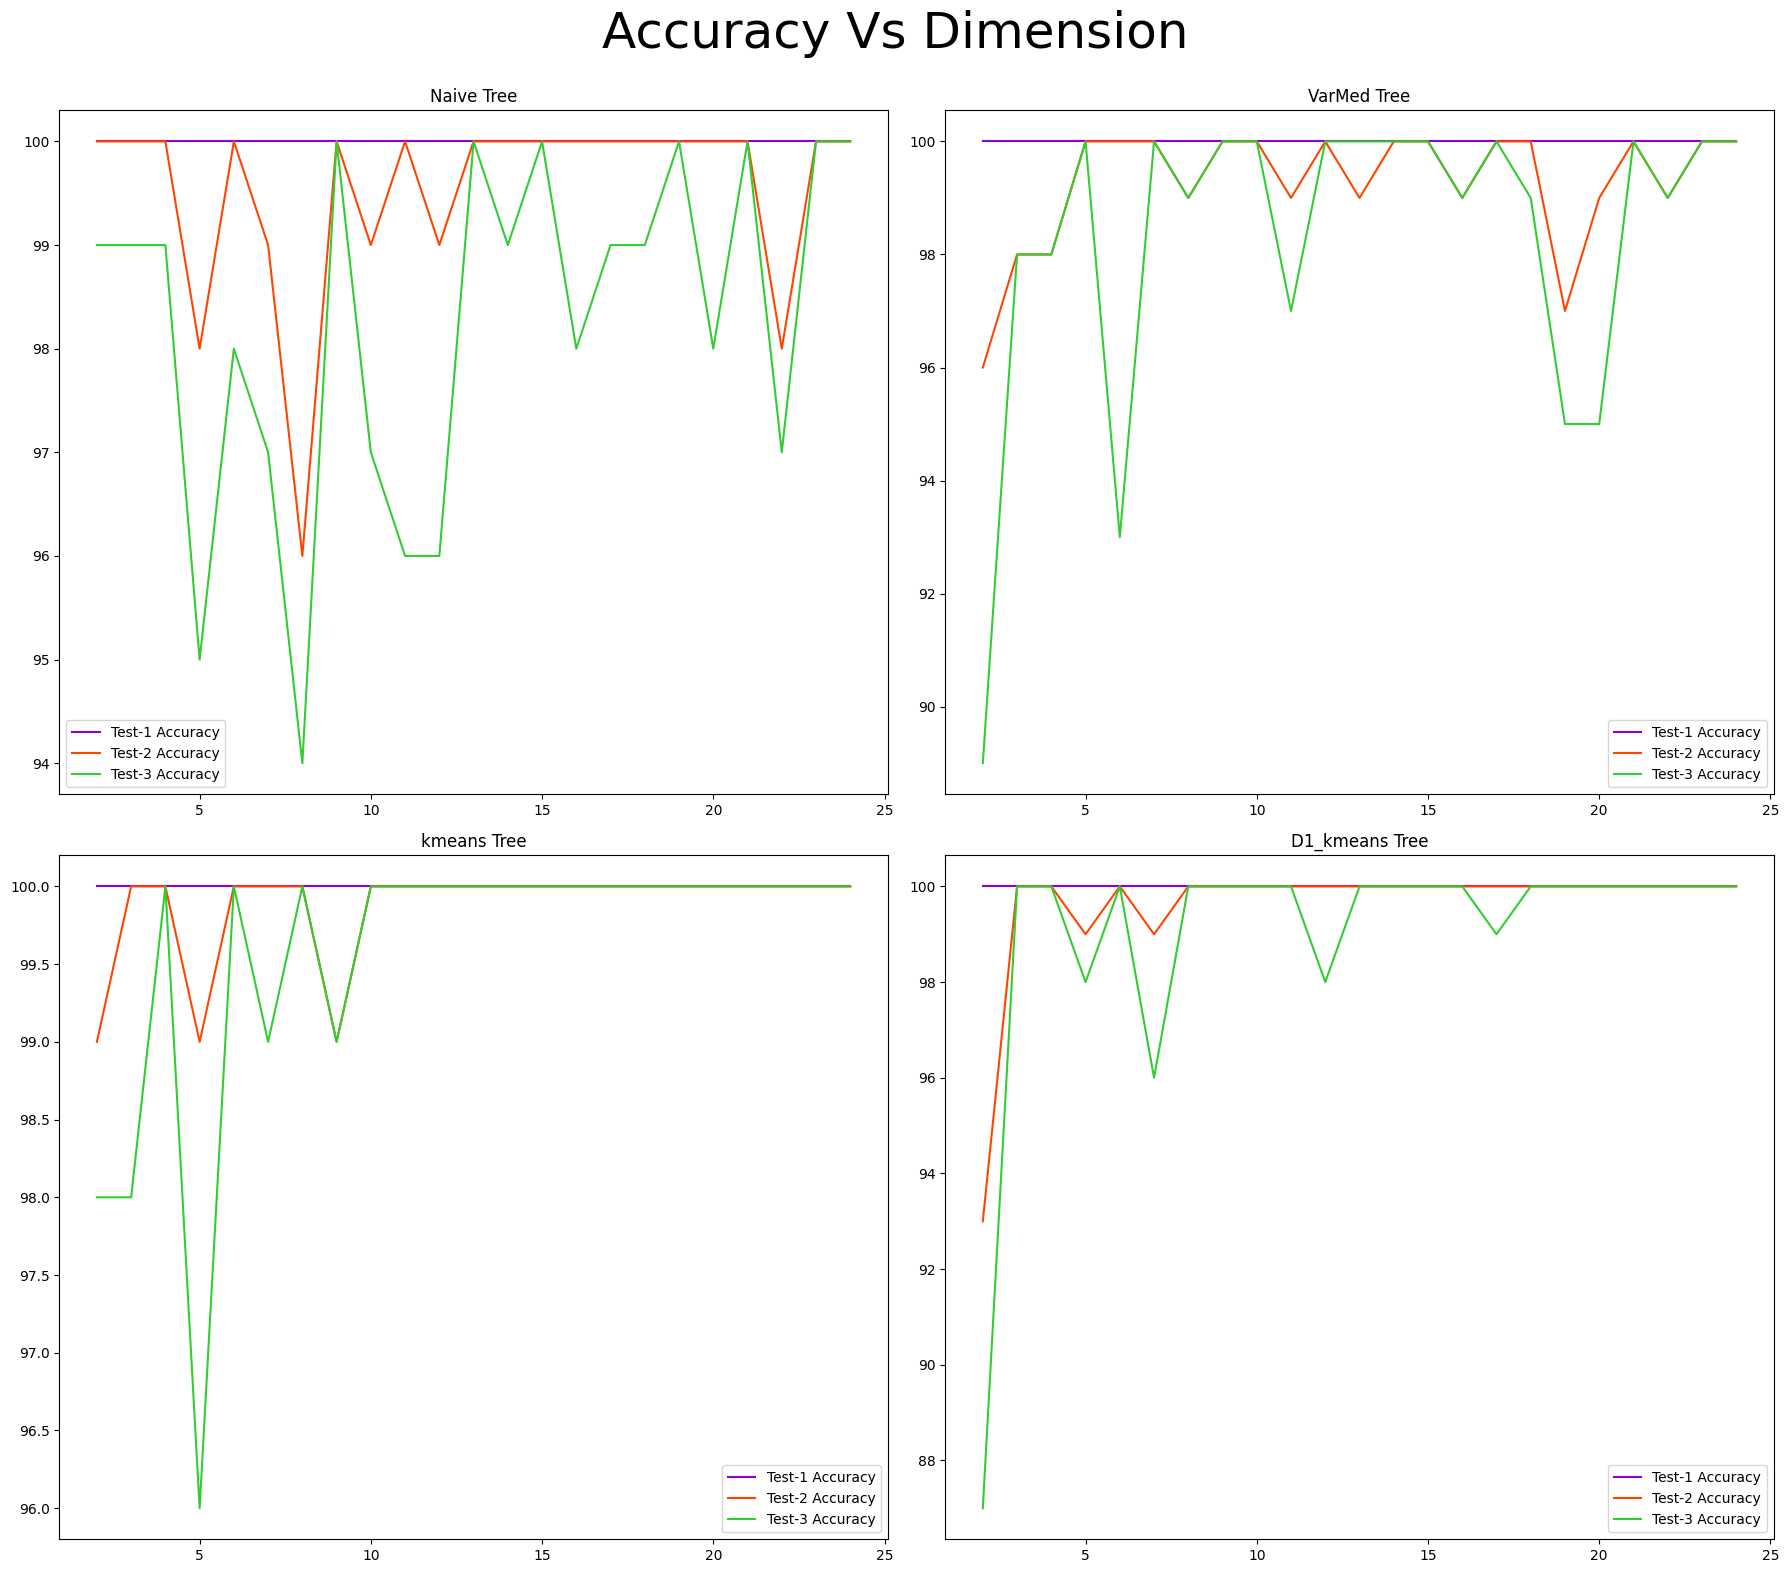

In [5]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Build time Vs Dimension

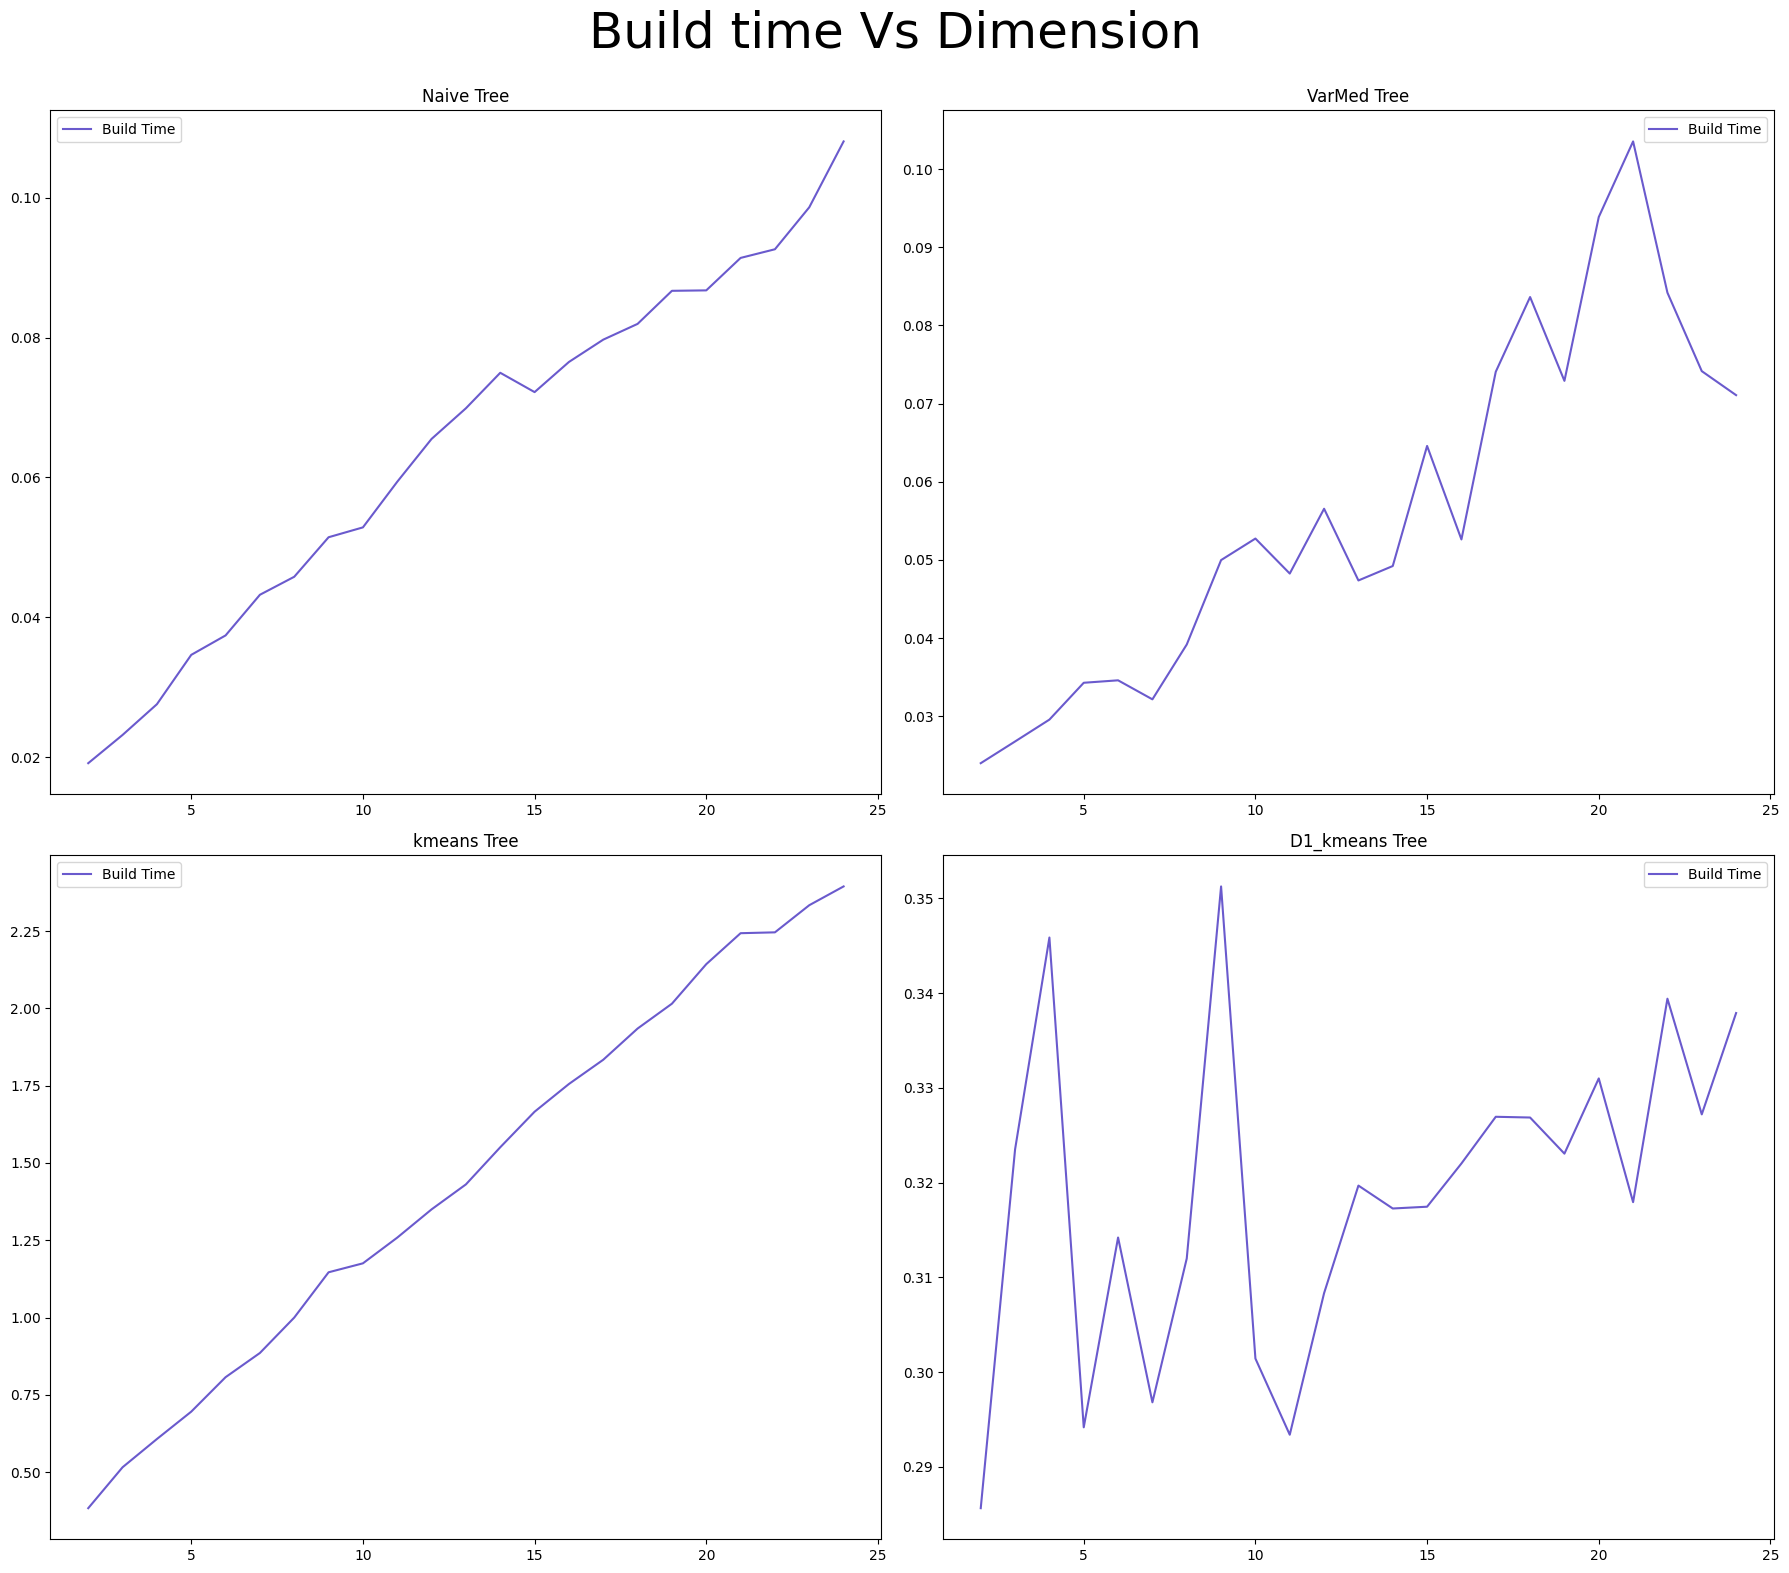

In [6]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 2)
varmed_data.plot(axs[0, 1], x, 2)
kmeans_data.plot(axs[1, 0], x, 2)
d1_kmeans_data.plot(axs[1, 1], x, 2)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Build time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Test time Vs Dimension

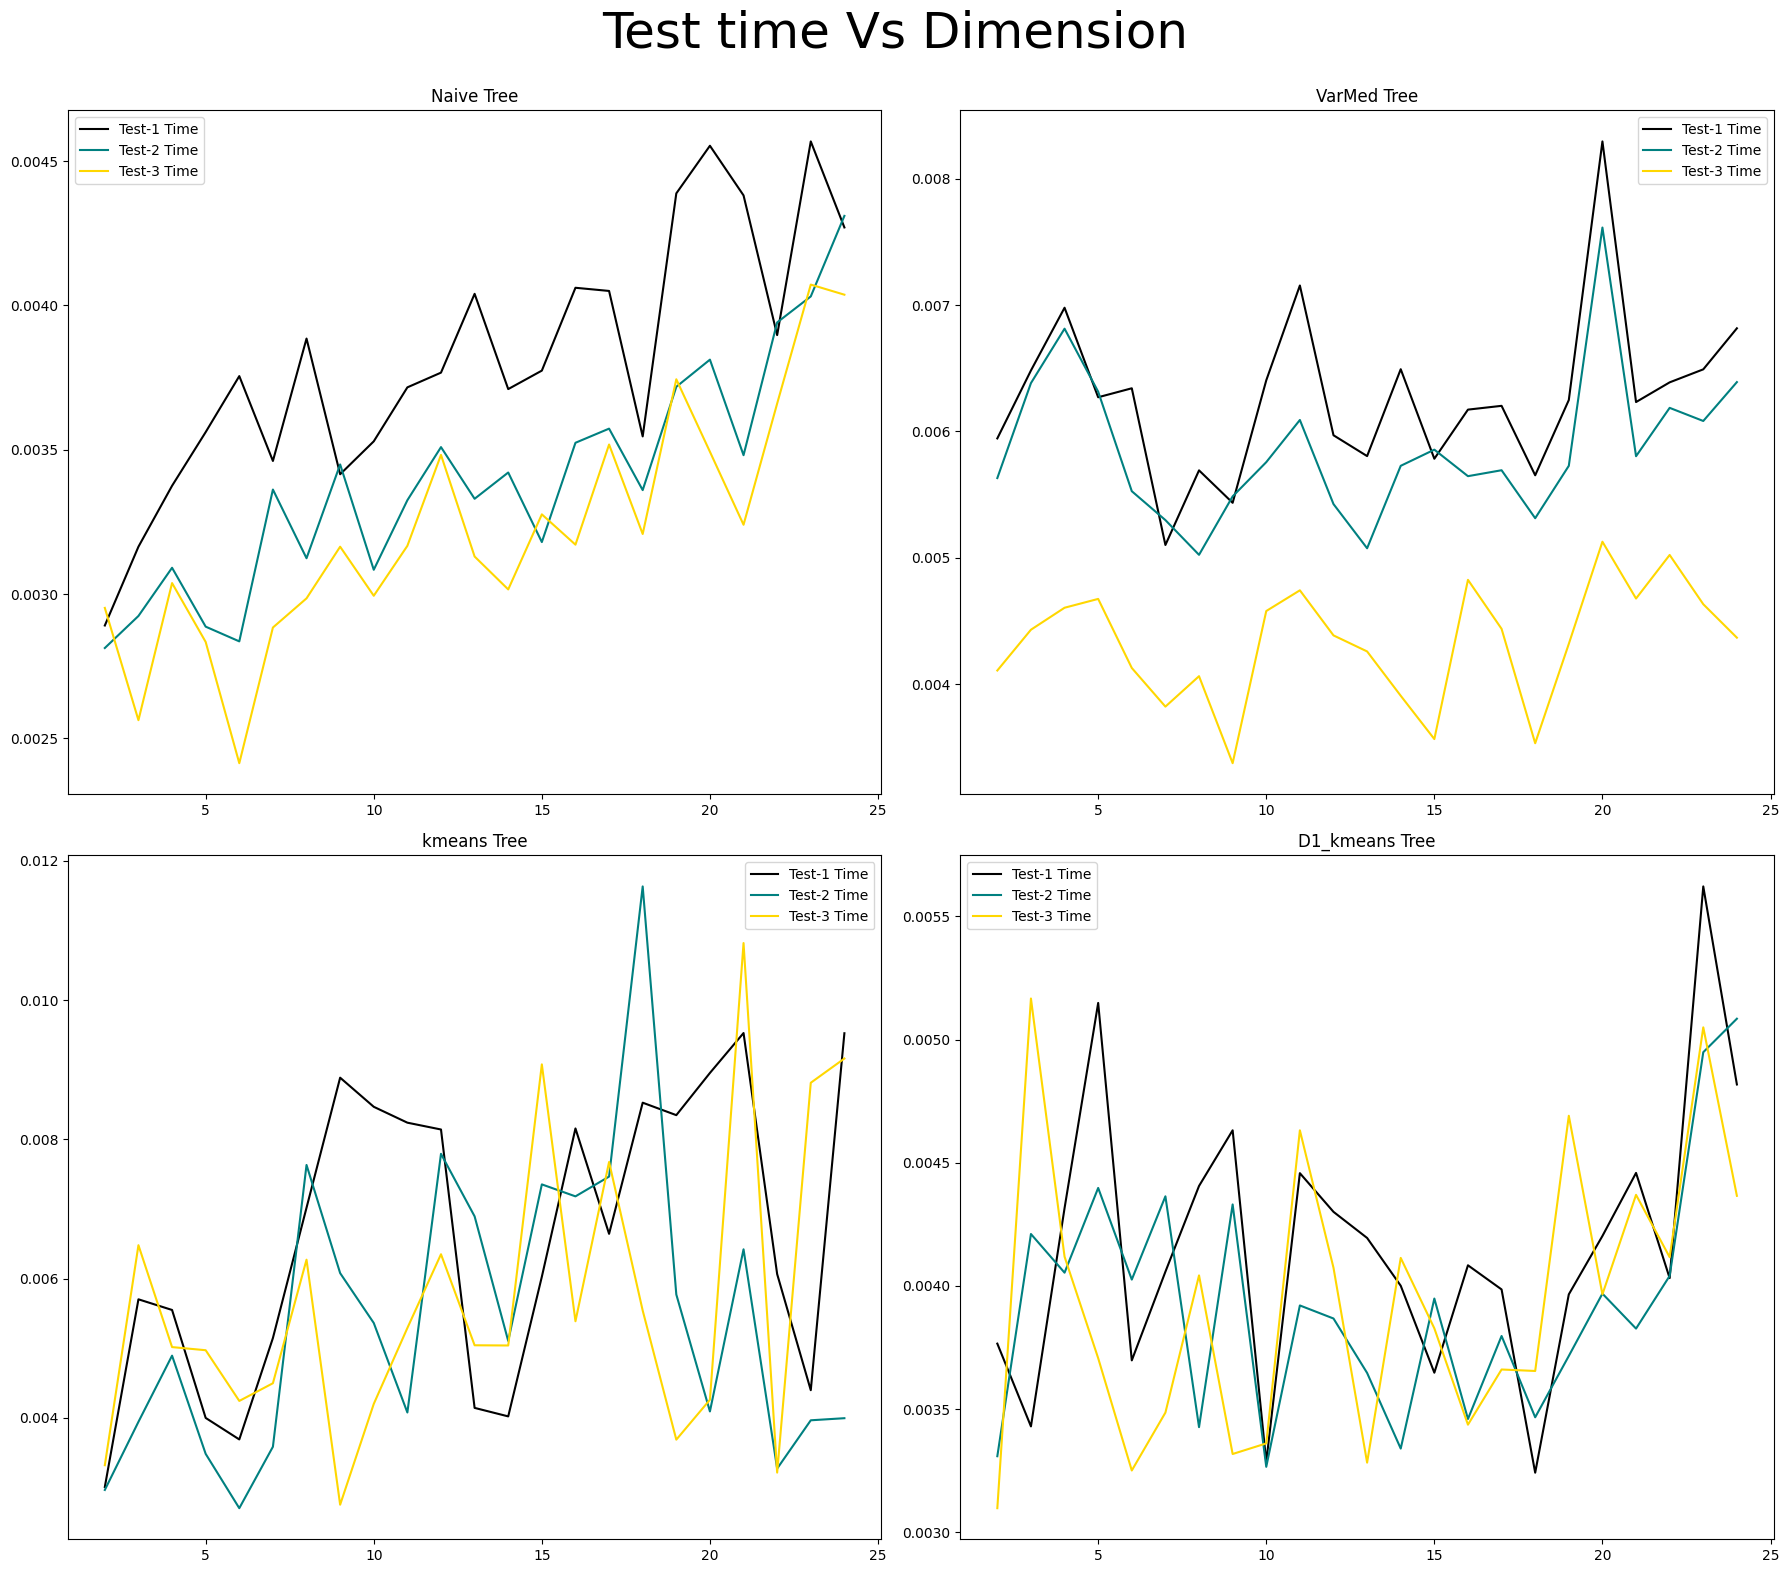

In [7]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 3)
varmed_data.plot(axs[0, 1], x, 3)
kmeans_data.plot(axs[1, 0], x, 3)
d1_kmeans_data.plot(axs[1, 1], x, 3)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Test time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## No. of splits Vs Dimension

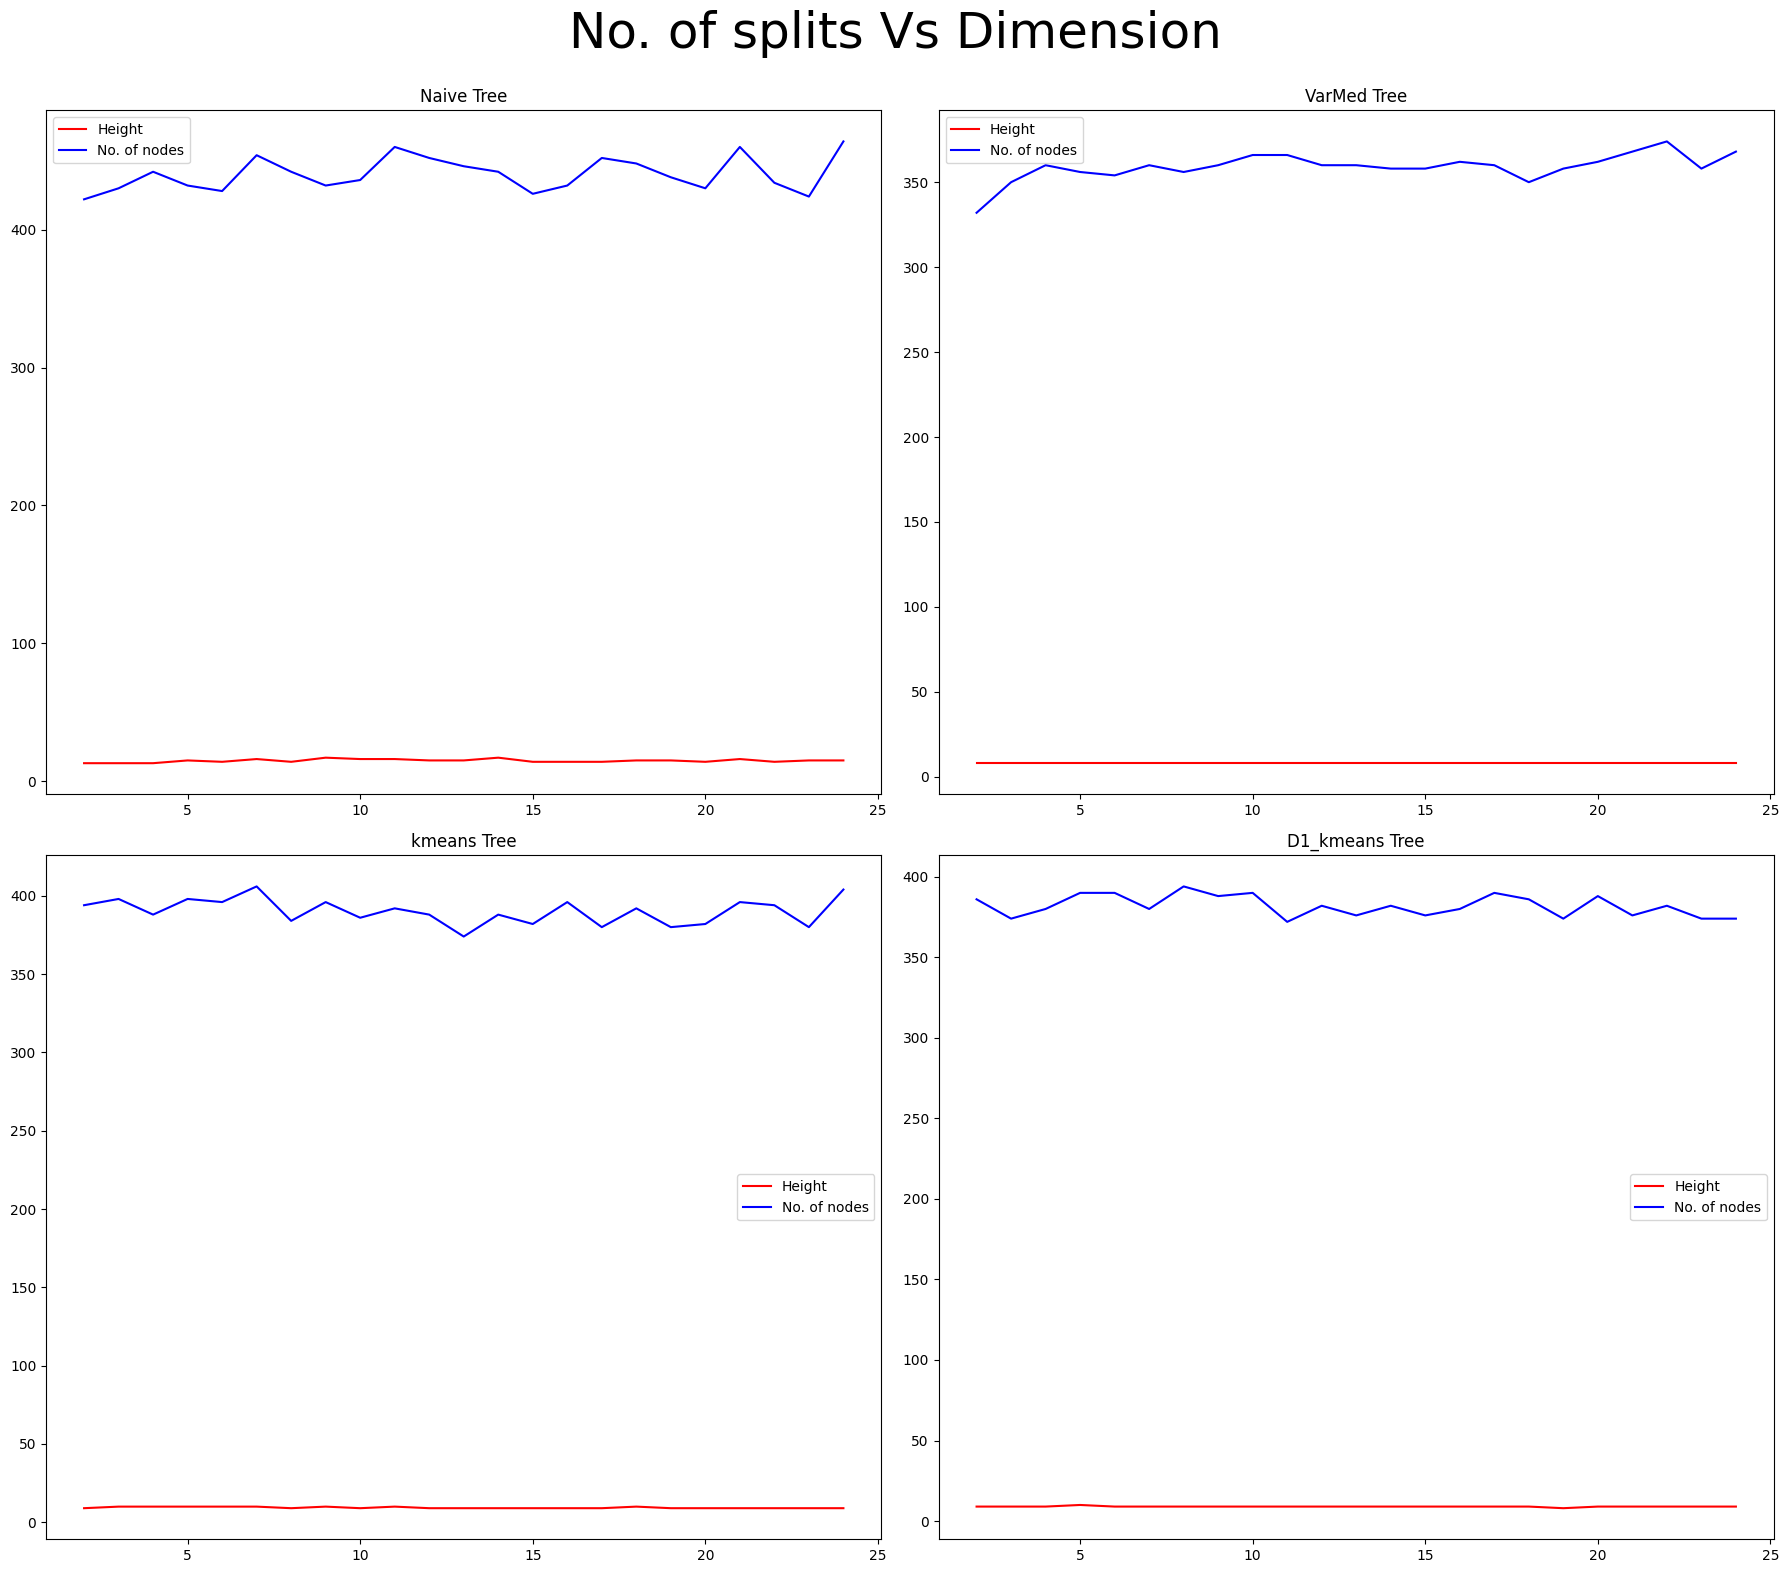

In [8]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 4)
varmed_data.plot(axs[0, 1], x, 4)
kmeans_data.plot(axs[1, 0], x, 4)
d1_kmeans_data.plot(axs[1, 1], x, 4)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('No. of splits Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Leaf Size Statistics Vs Dimension

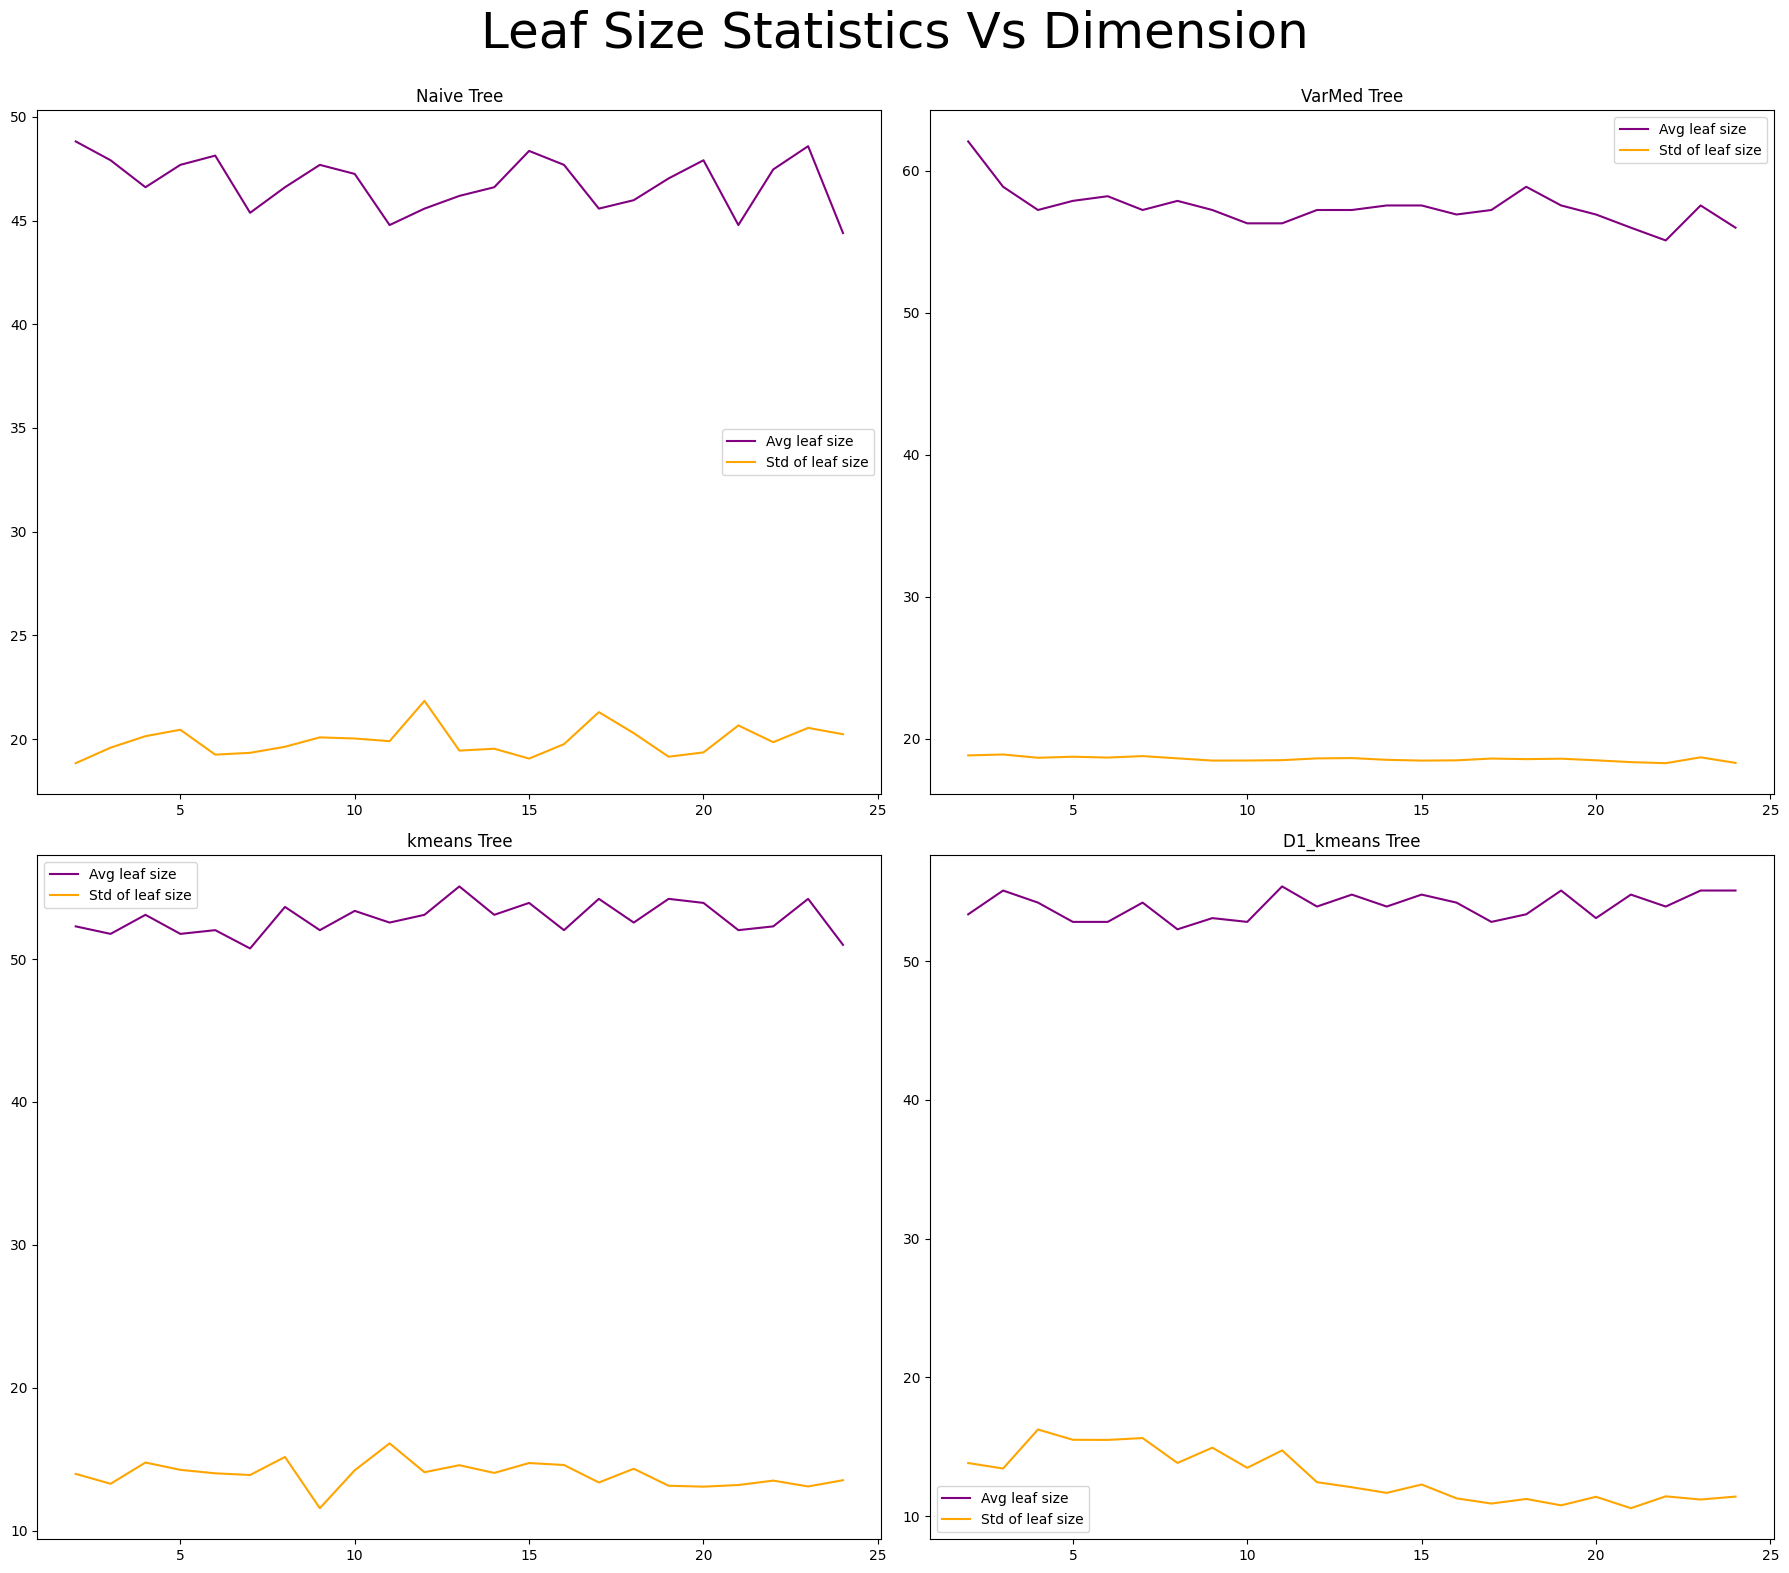

In [9]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 5)
varmed_data.plot(axs[0, 1], x, 5)
kmeans_data.plot(axs[1, 0], x, 5)
d1_kmeans_data.plot(axs[1, 1], x, 5)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Leaf Size Statistics Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Split quality Vs Dimension

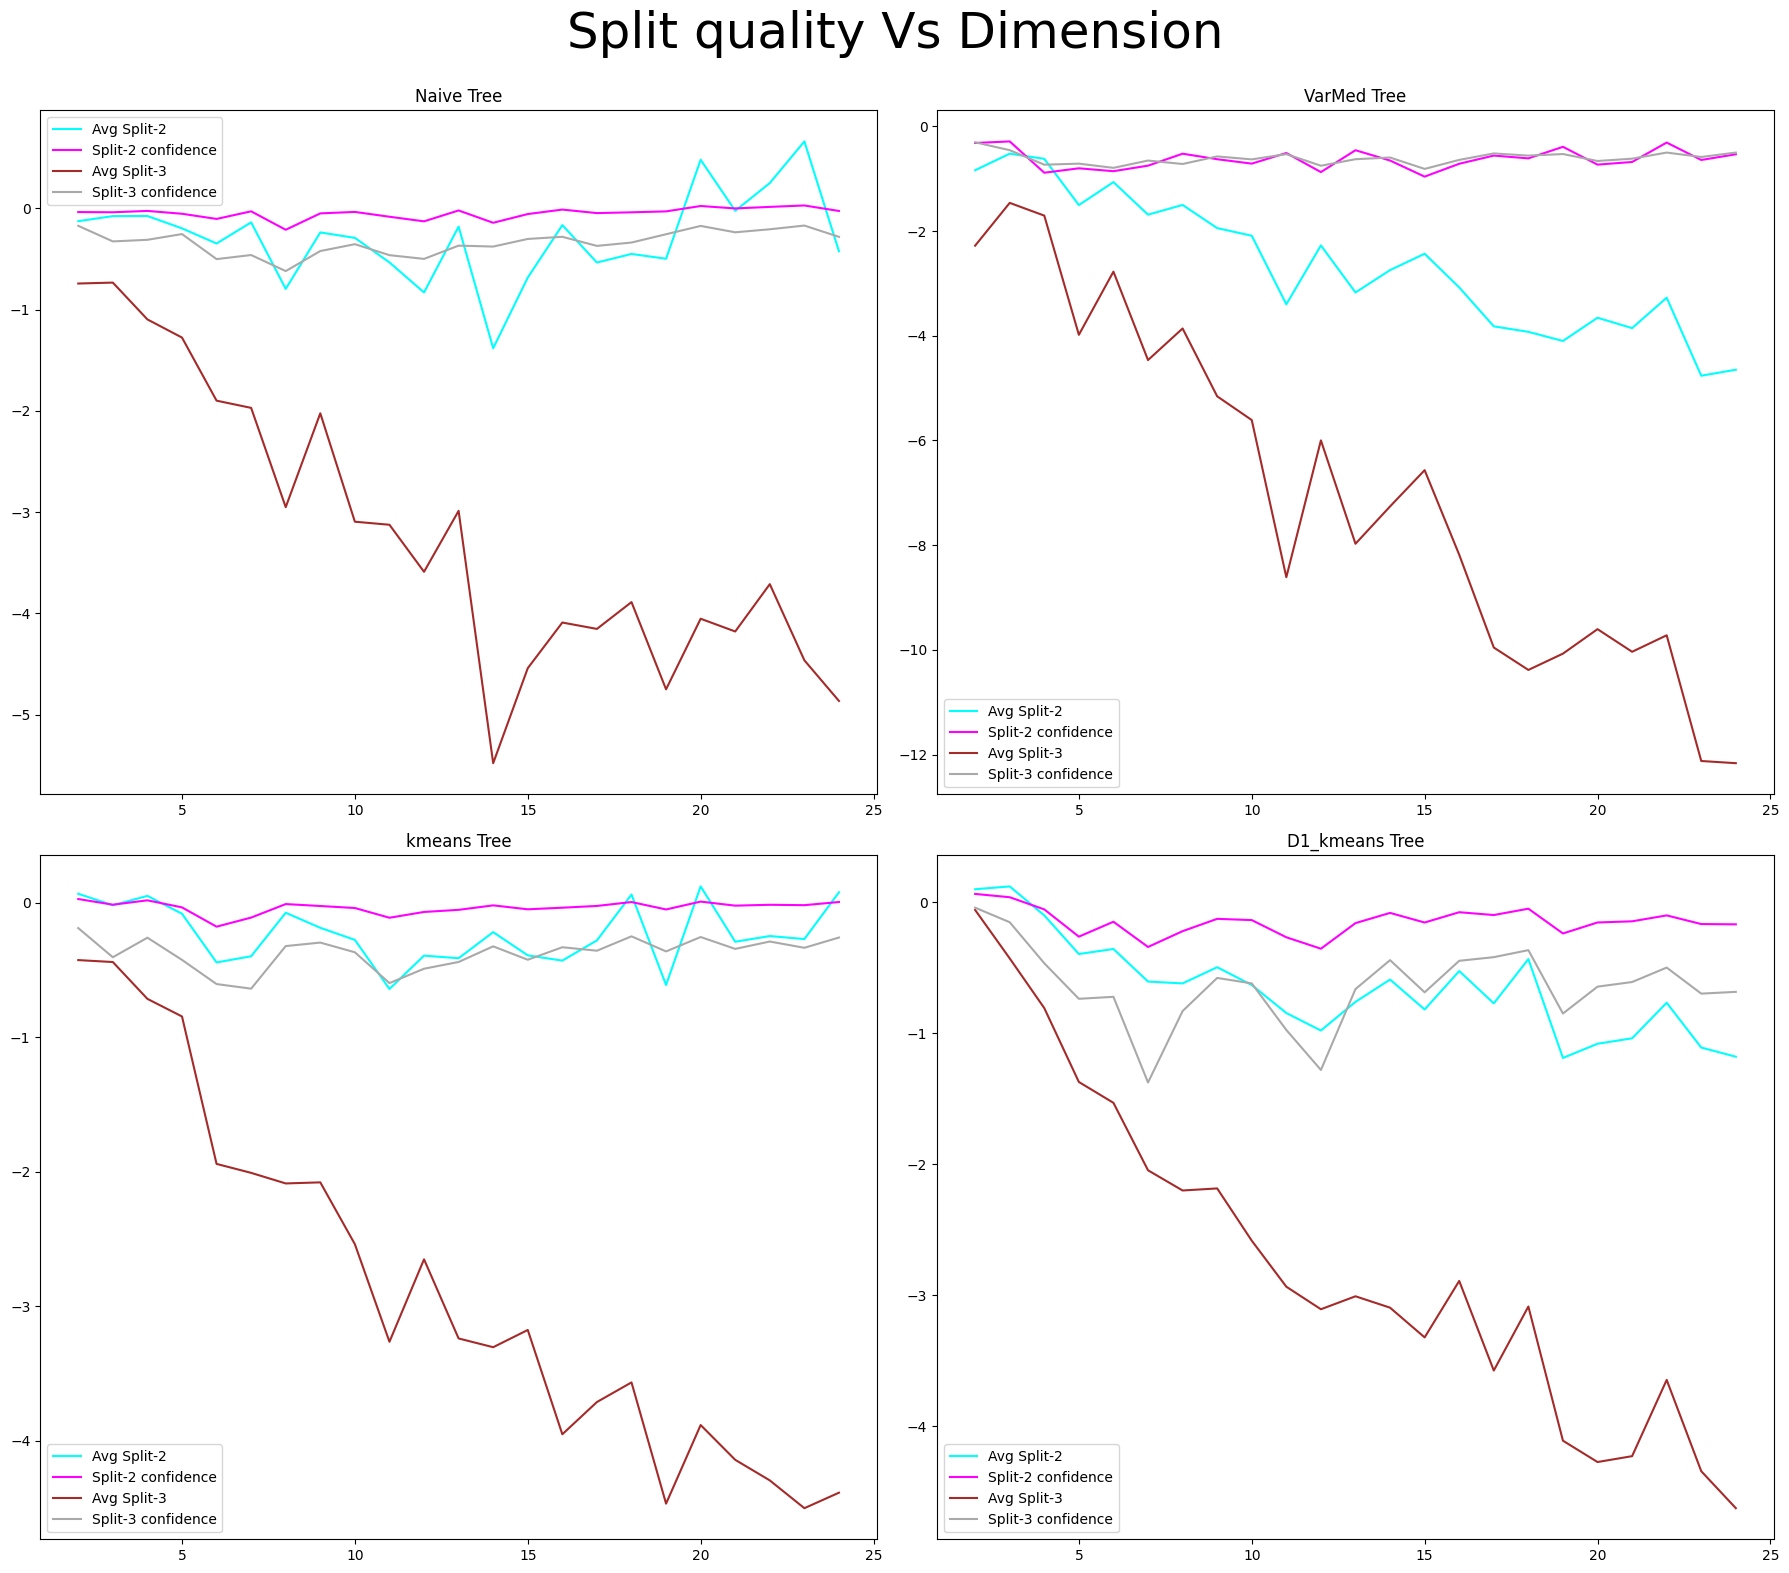

In [10]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 6)
varmed_data.plot(axs[0, 1], x, 6)
kmeans_data.plot(axs[1, 0], x, 6)
d1_kmeans_data.plot(axs[1, 1], x, 6)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Split quality Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Variation: Number of Clusters 

In [11]:
dimension = 10
files = ['Naive_GHT.c', 'VarMed_GHT.c', 'kmeans_GHT.c', 'D1_kmeans_GHT.c']
N = 10000

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = range(2,25,1)

for filename, data_obj in zip(files, Data):
    new_dimension = "#define dimension " + str(dimension)

    with open(filename, 'r') as file:
        content = file.read()
        
    new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
    with open(filename, 'w') as file:
        file.write(new_content)
        
    for cluster in variation:
    
        aniso = [1.0, 0.5, 2, 4.0]
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 200,
            test2 = 200,
            test3 = 200,
            seed = 100
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)

x =variation

## Accuracy Vs Dimension

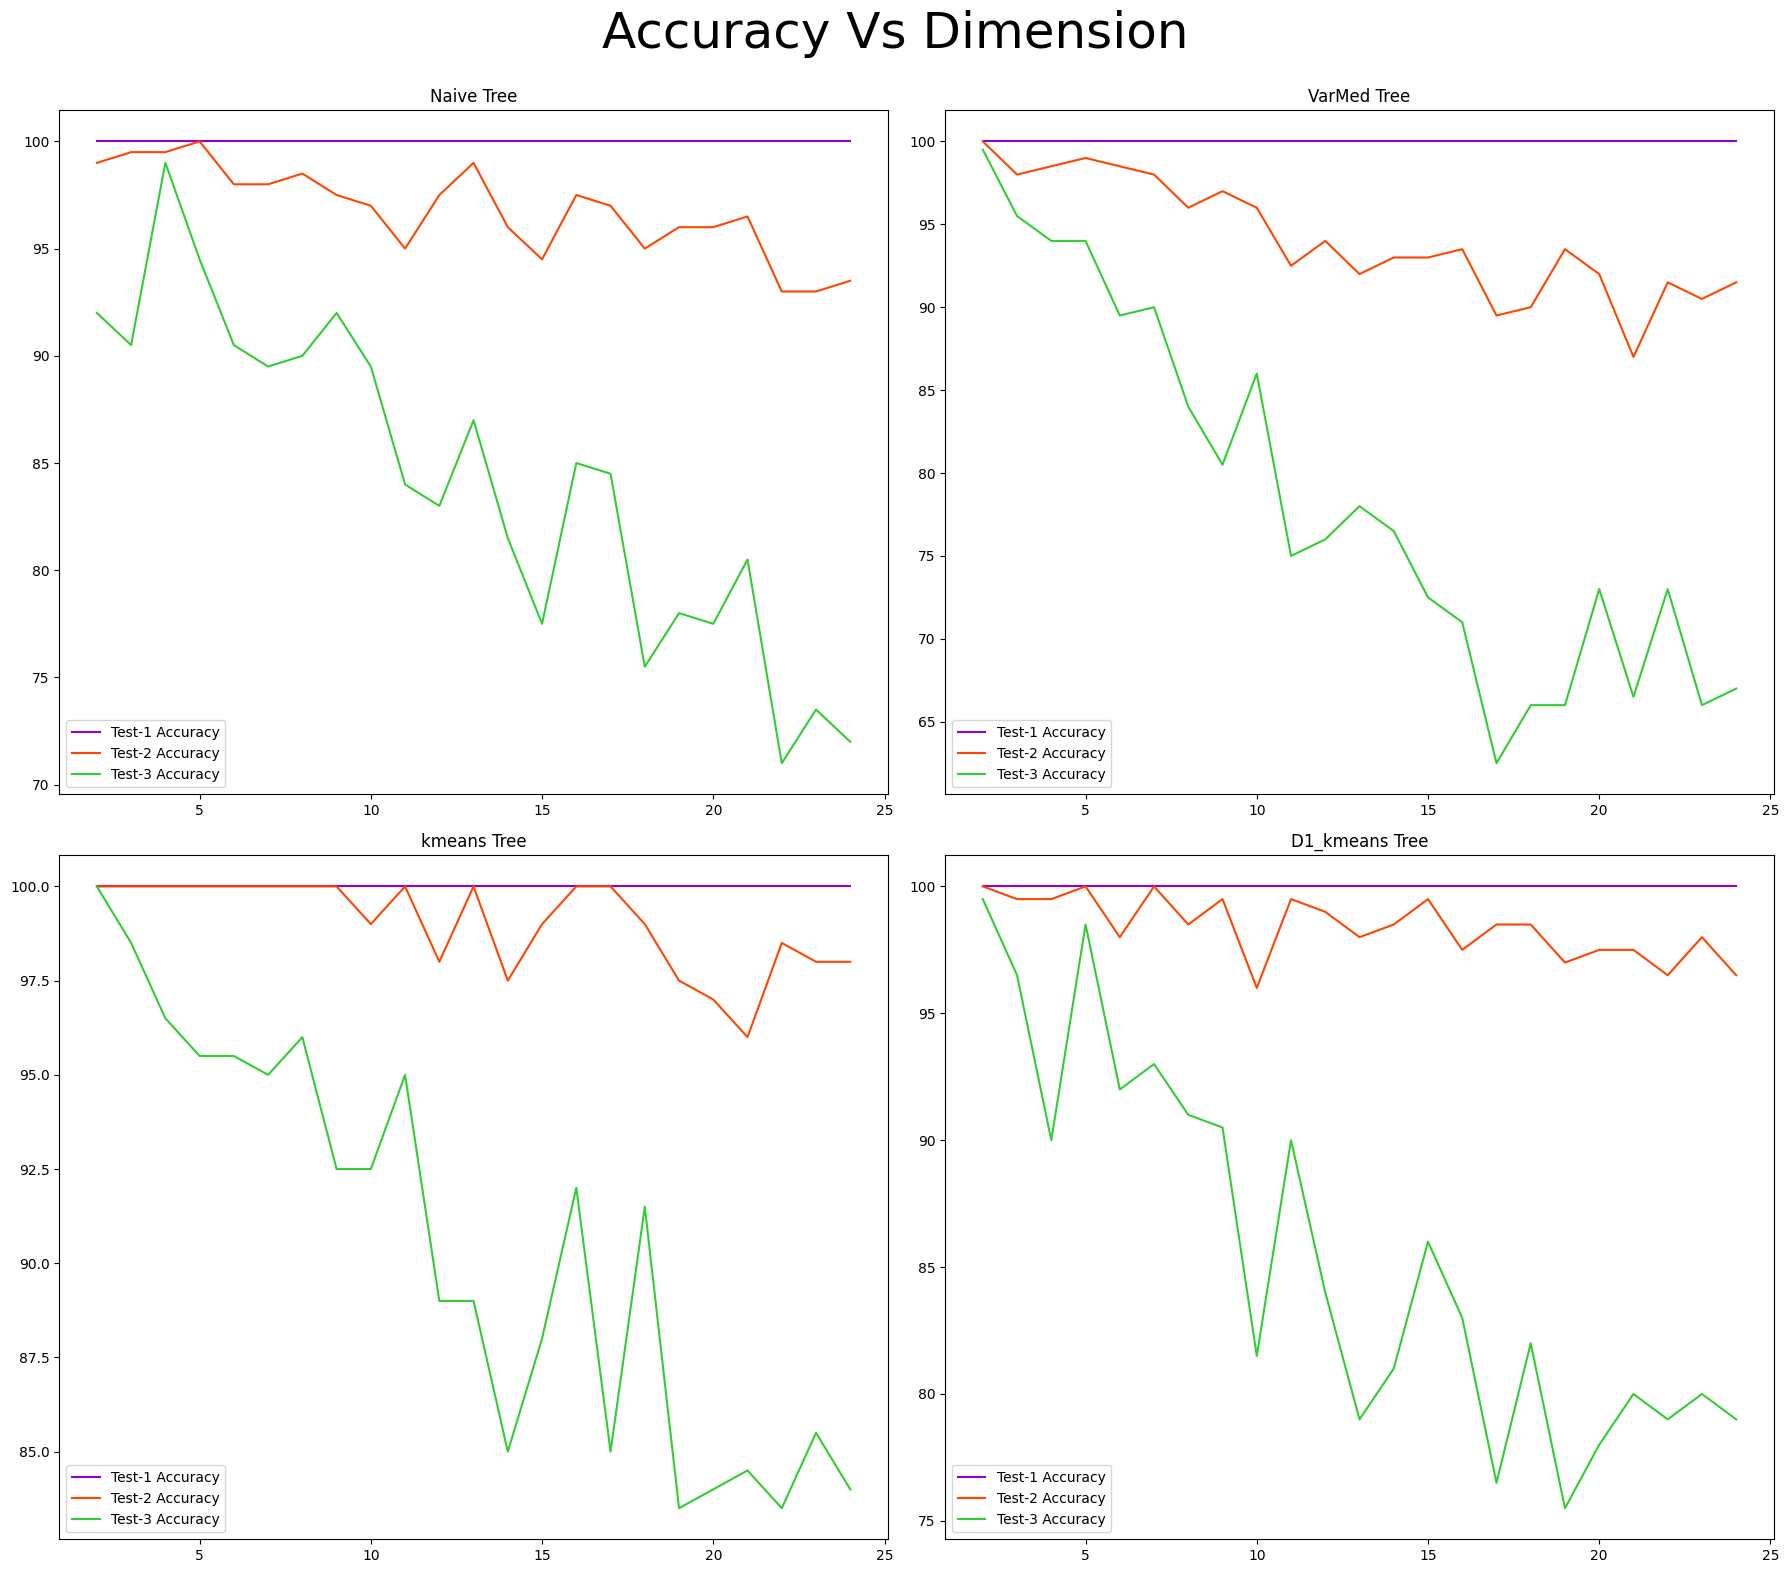

In [12]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Build time Vs Dimension

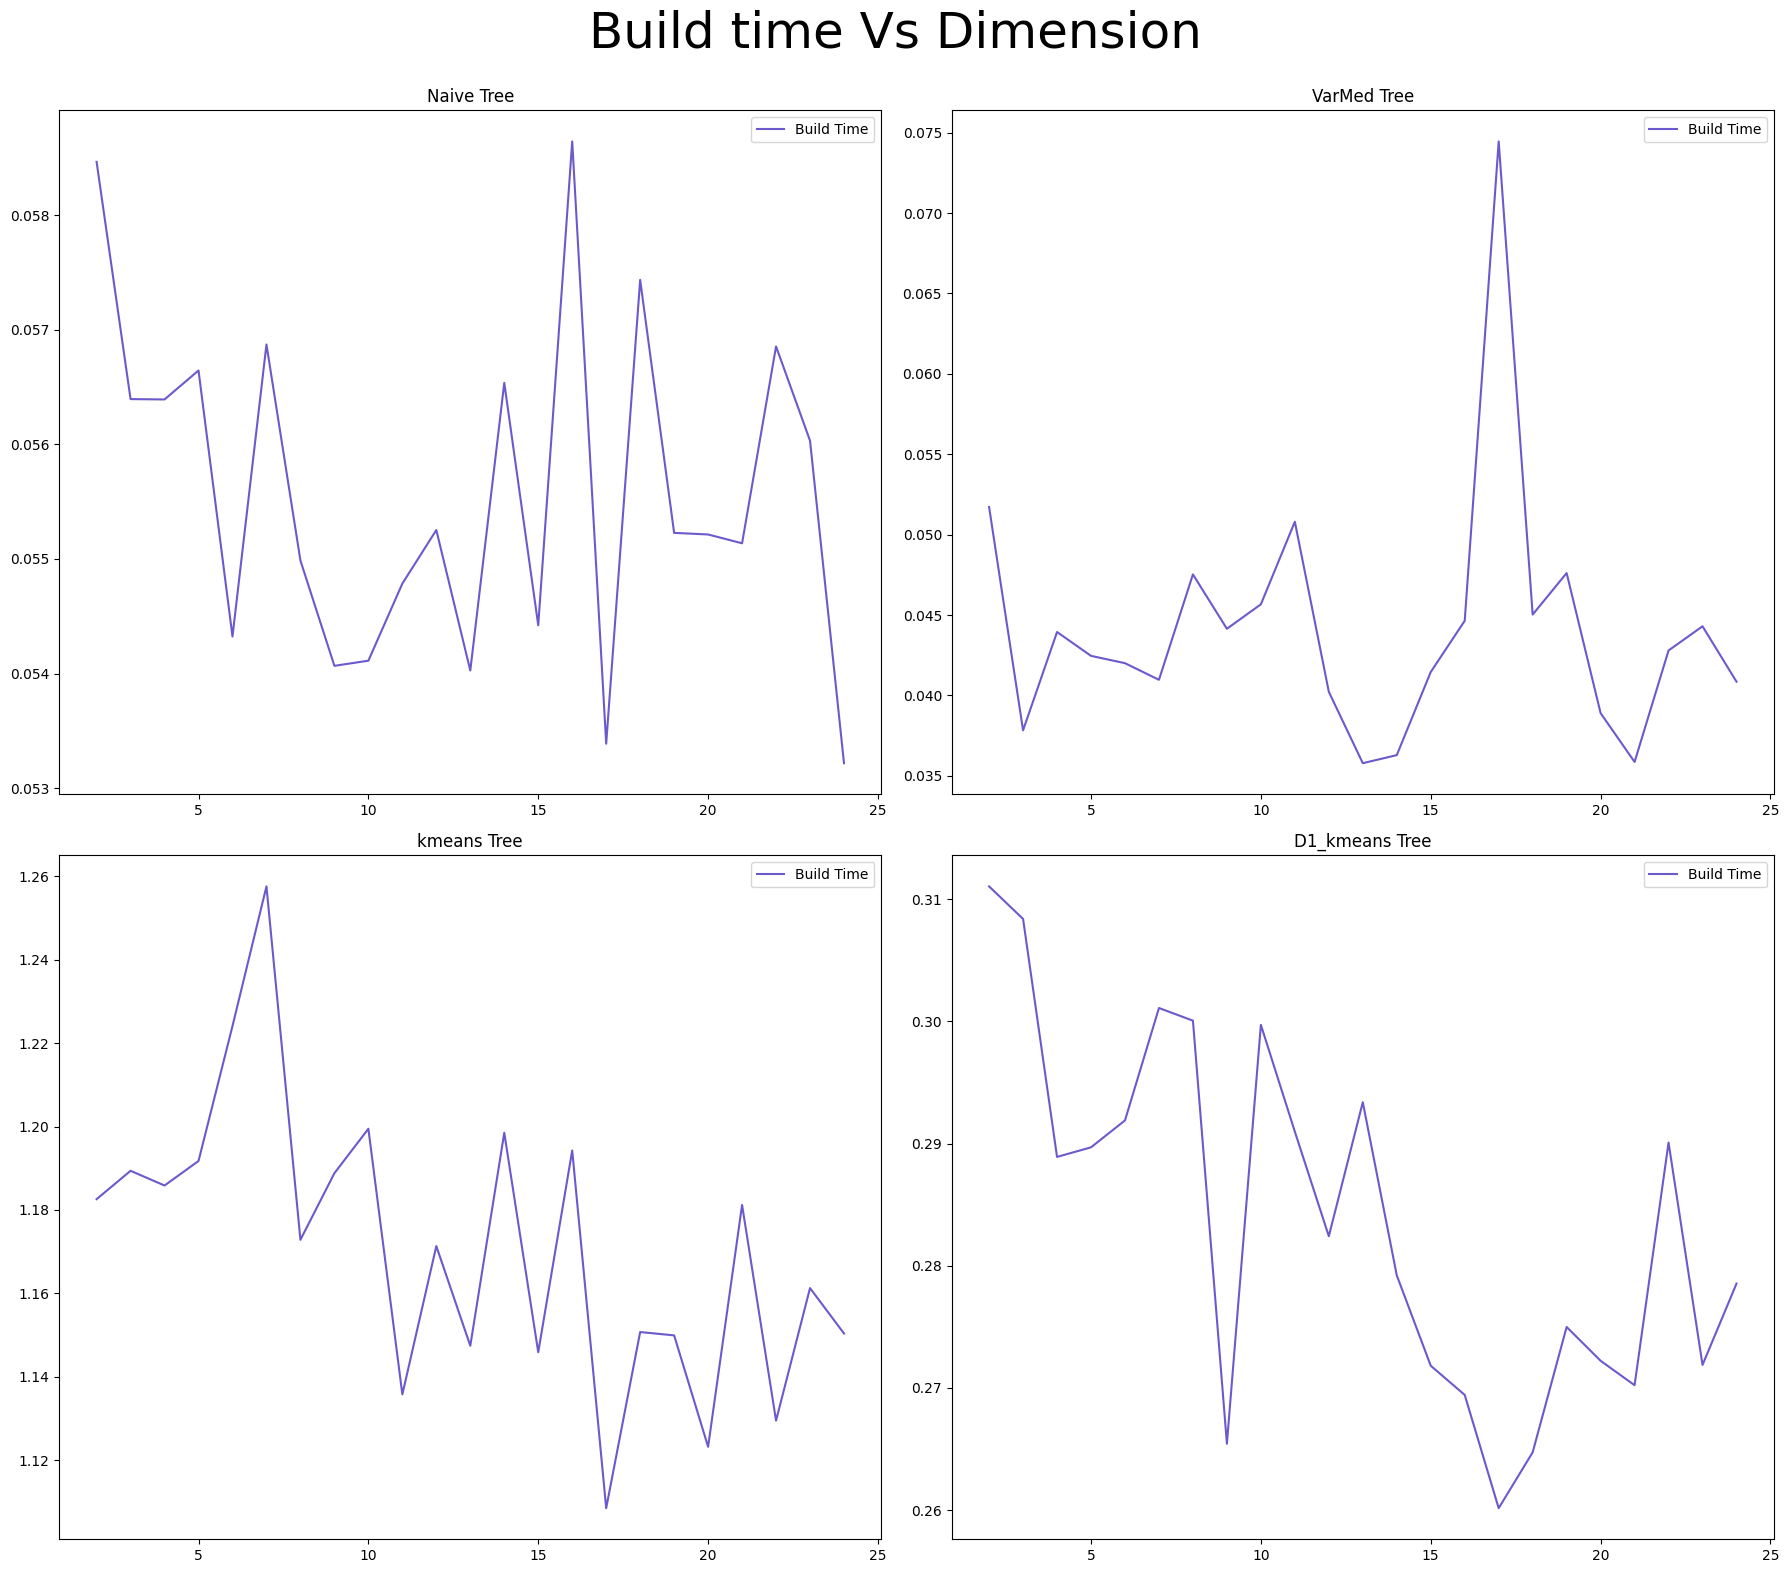

In [13]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 2)
varmed_data.plot(axs[0, 1], x, 2)
kmeans_data.plot(axs[1, 0], x, 2)
d1_kmeans_data.plot(axs[1, 1], x, 2)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Build time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Test time Vs Dimension

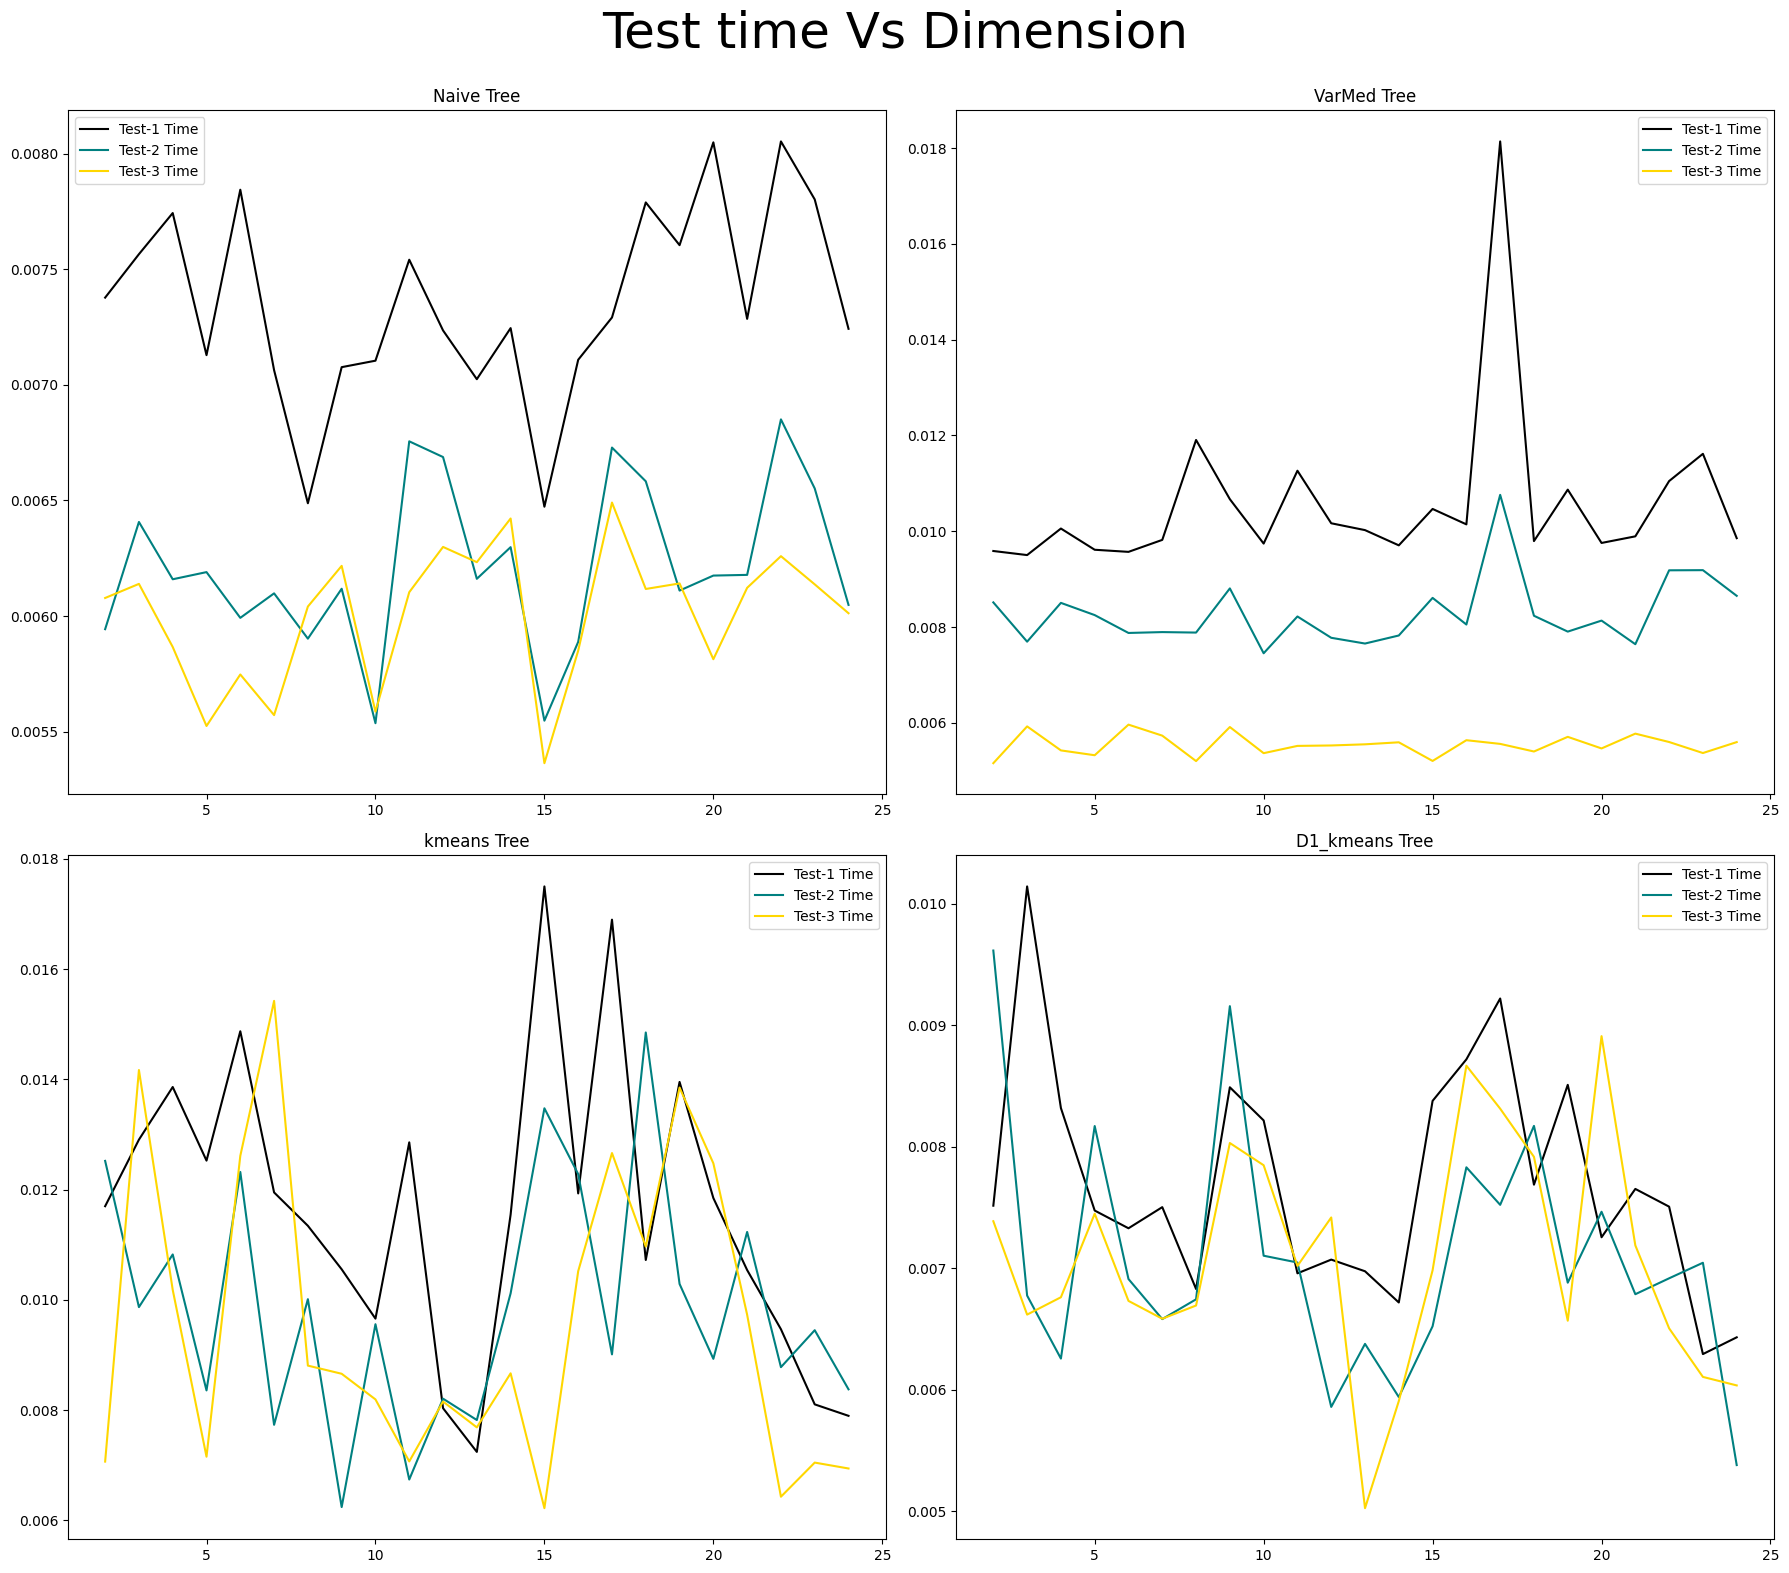

In [14]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 3)
varmed_data.plot(axs[0, 1], x, 3)
kmeans_data.plot(axs[1, 0], x, 3)
d1_kmeans_data.plot(axs[1, 1], x, 3)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Test time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## No. of splits Vs Dimension

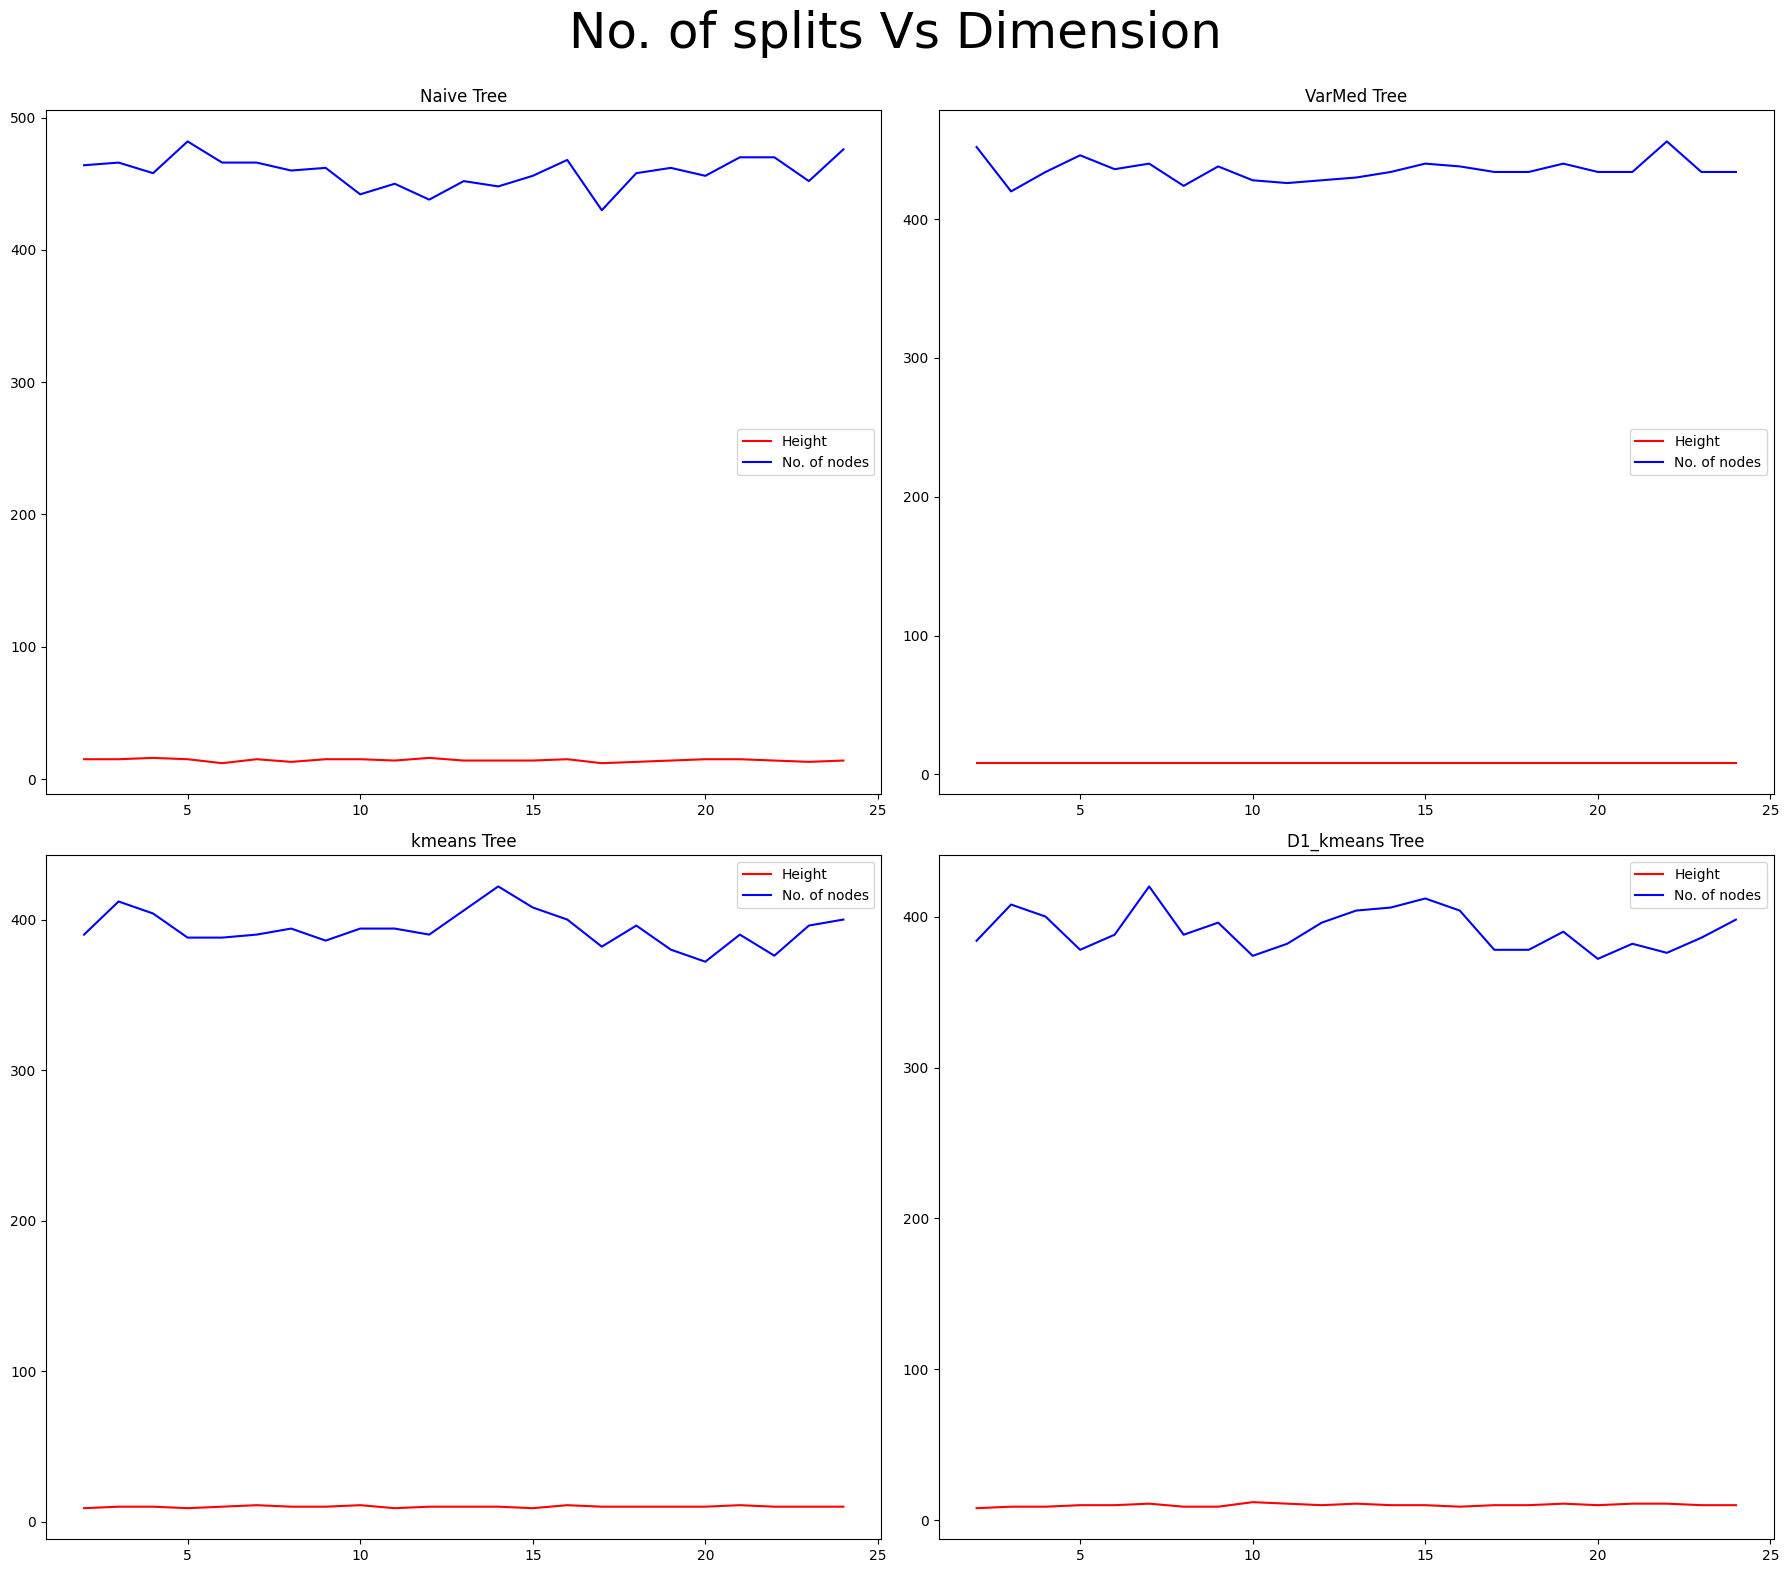

In [15]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 4)
varmed_data.plot(axs[0, 1], x, 4)
kmeans_data.plot(axs[1, 0], x, 4)
d1_kmeans_data.plot(axs[1, 1], x, 4)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('No. of splits Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Leaf Size Statistics Vs Dimension

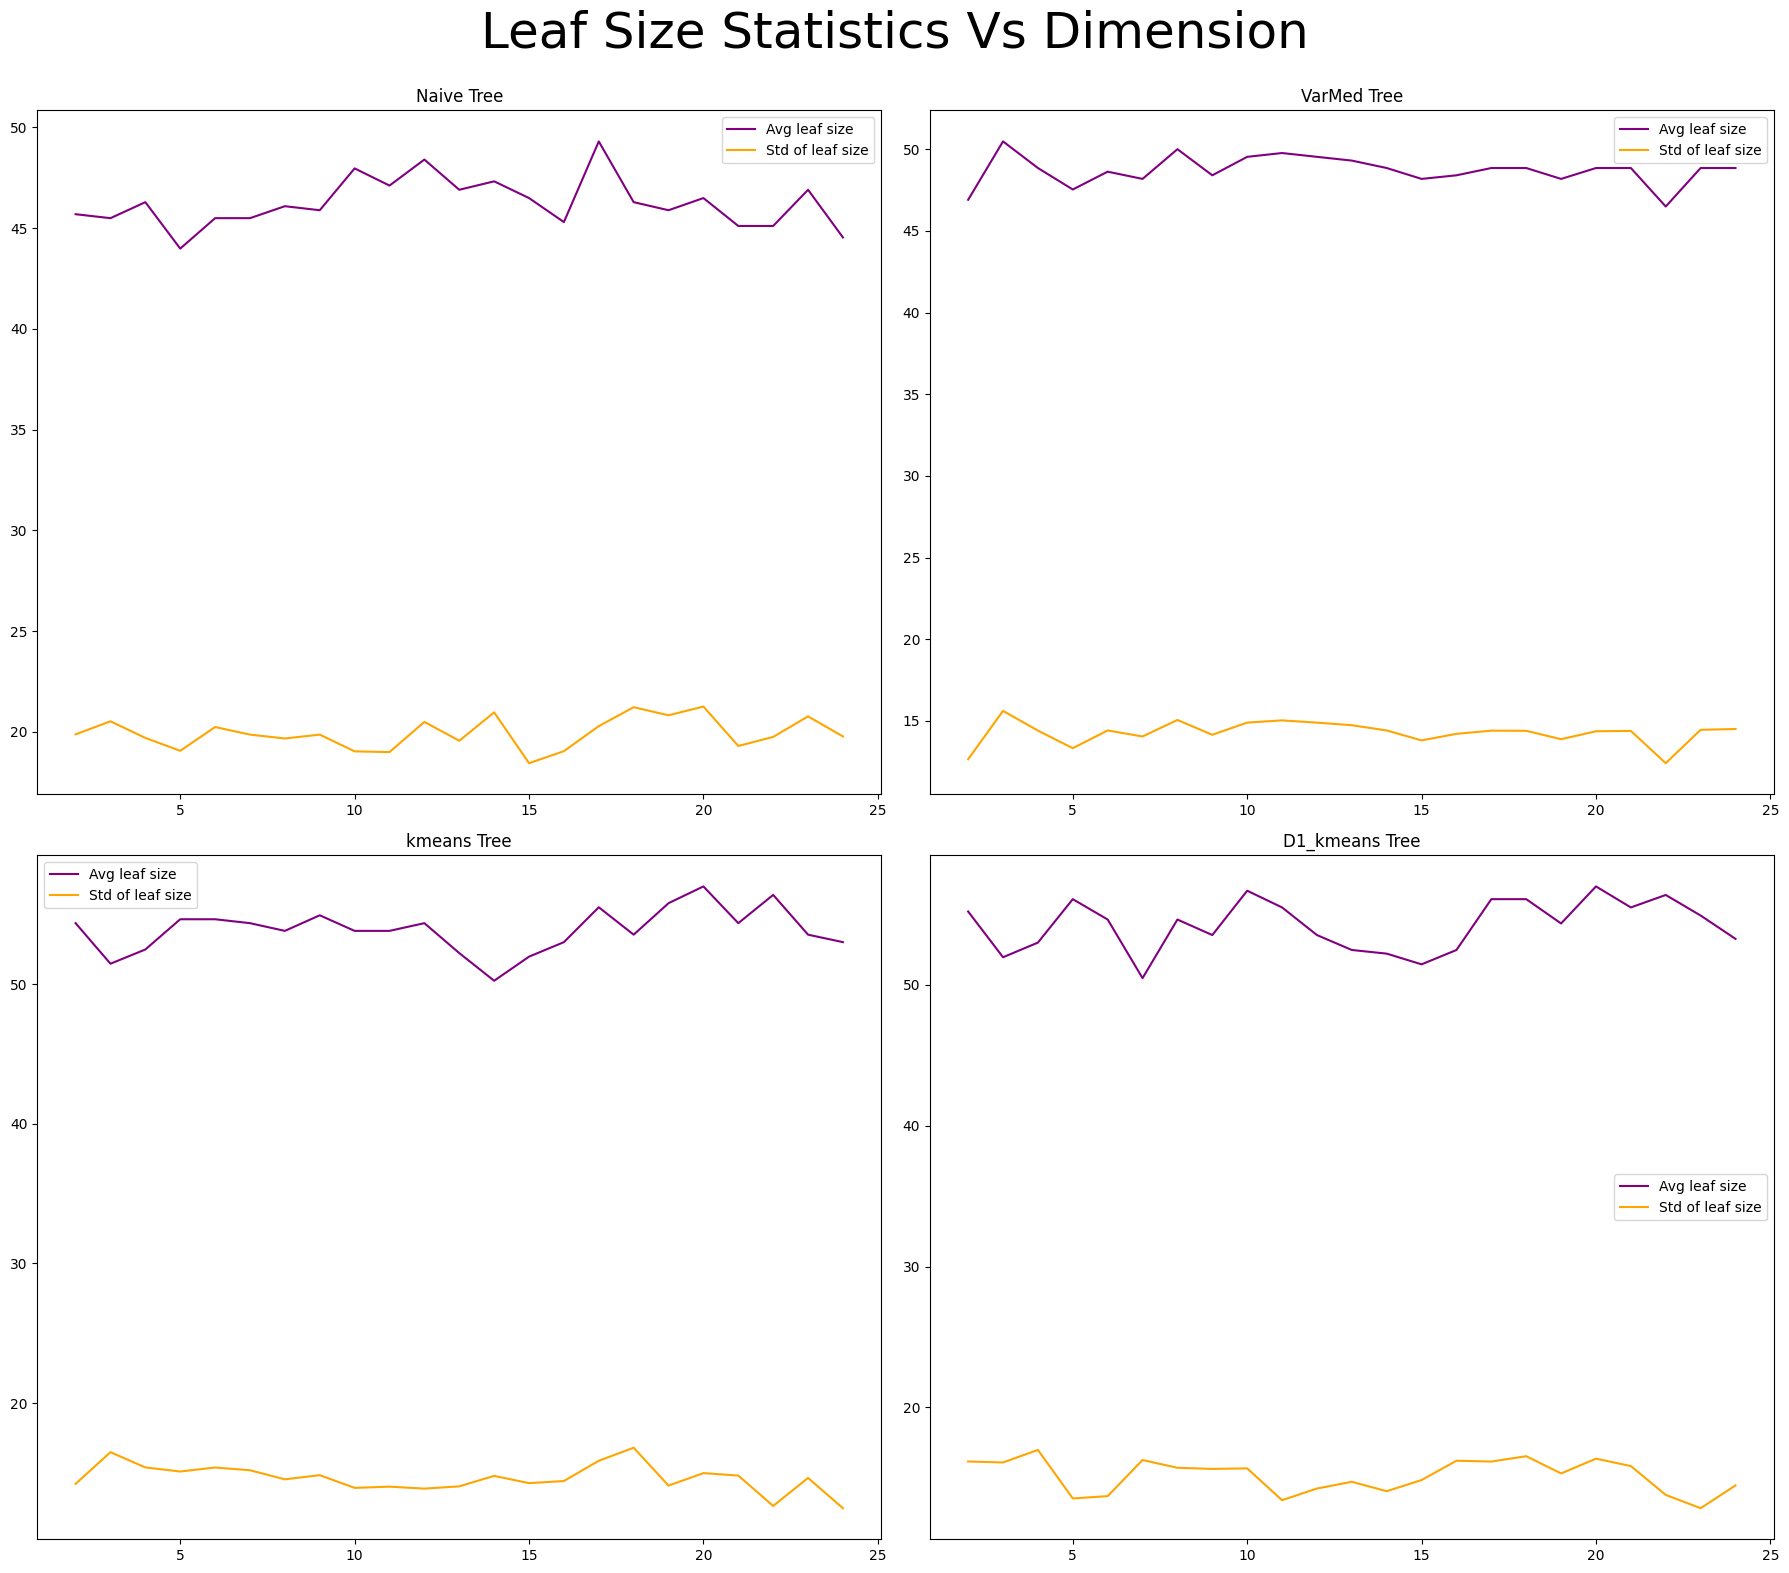

In [16]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 5)
varmed_data.plot(axs[0, 1], x, 5)
kmeans_data.plot(axs[1, 0], x, 5)
d1_kmeans_data.plot(axs[1, 1], x, 5)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Leaf Size Statistics Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Split quality Vs Dimension

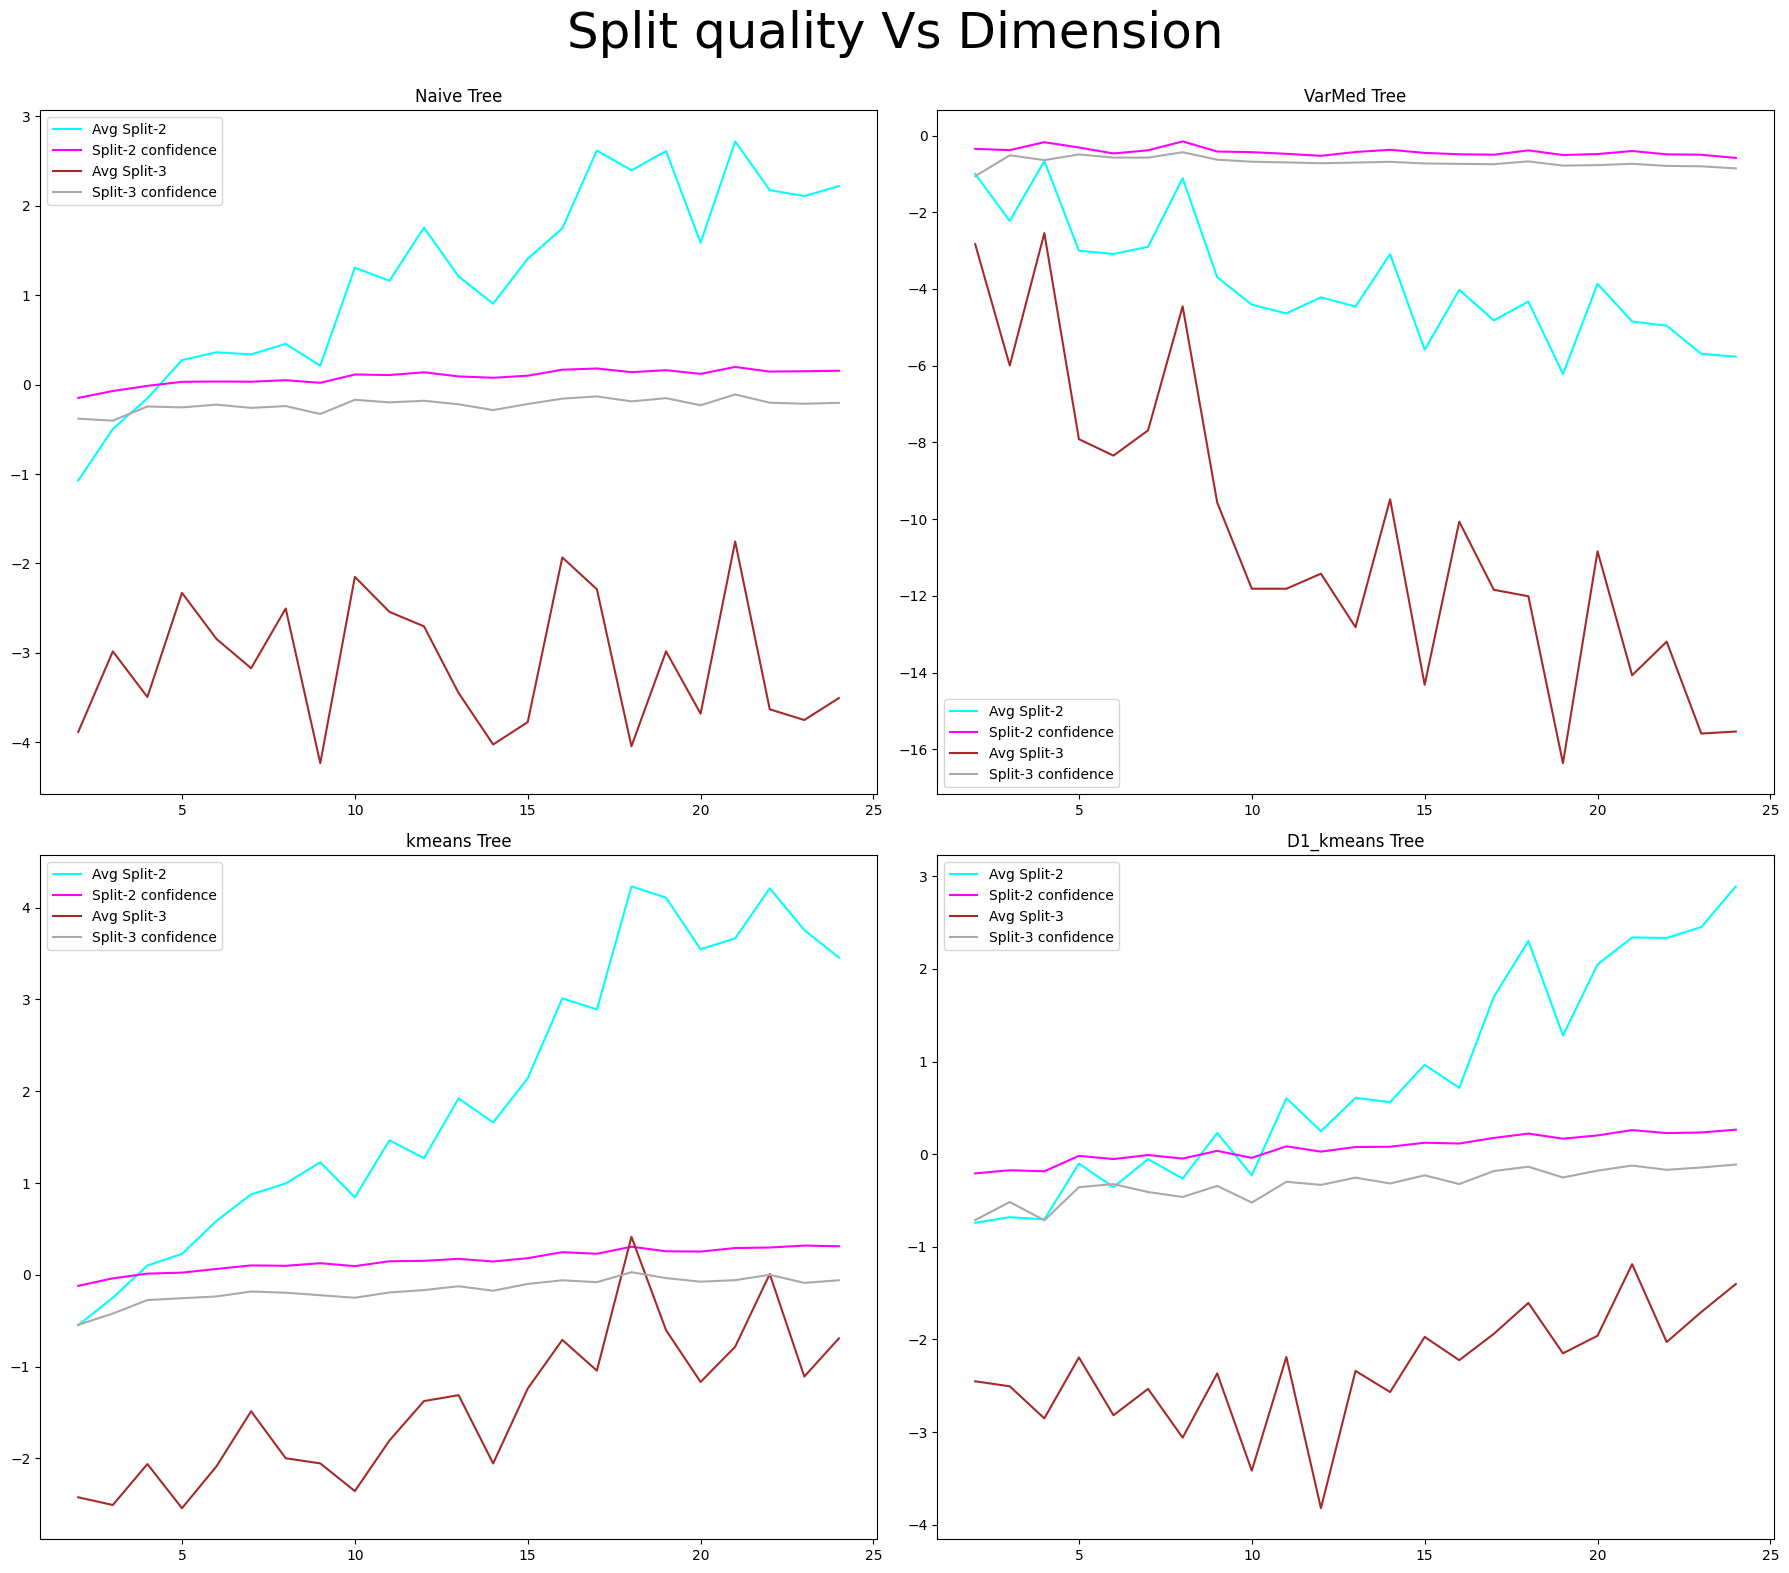

In [17]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 6)
varmed_data.plot(axs[0, 1], x, 6)
kmeans_data.plot(axs[1, 0], x, 6)
d1_kmeans_data.plot(axs[1, 1], x, 6)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Split quality Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Variation: Cluster Standard Deviation

In [18]:
dimension = 10
files = ['Naive_GHT.c', 'VarMed_GHT.c', 'kmeans_GHT.c', 'D1_kmeans_GHT.c']
N = 10000
cluster = 5

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = range(1,31,1)

for filename, data_obj in zip(files, Data):
    new_dimension = "#define dimension " + str(dimension)

    with open(filename, 'r') as file:
        content = file.read()
        
    new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
    with open(filename, 'w') as file:
        file.write(new_content)
        
    for n in variation:
        aniso = [1.0, 0.5, 2, 4.0]
        aniso[0] = float(n/10)
        aniso[1] = aniso[0]/2
        aniso[2] = aniso[0]*1.25
        aniso[3] = aniso[0]*2
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 200,
            test2 = 200,
            test3 = 200,
            seed = 100,
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)
x =[float(var/10) for var in variation]

## Accuracy Vs Dimension

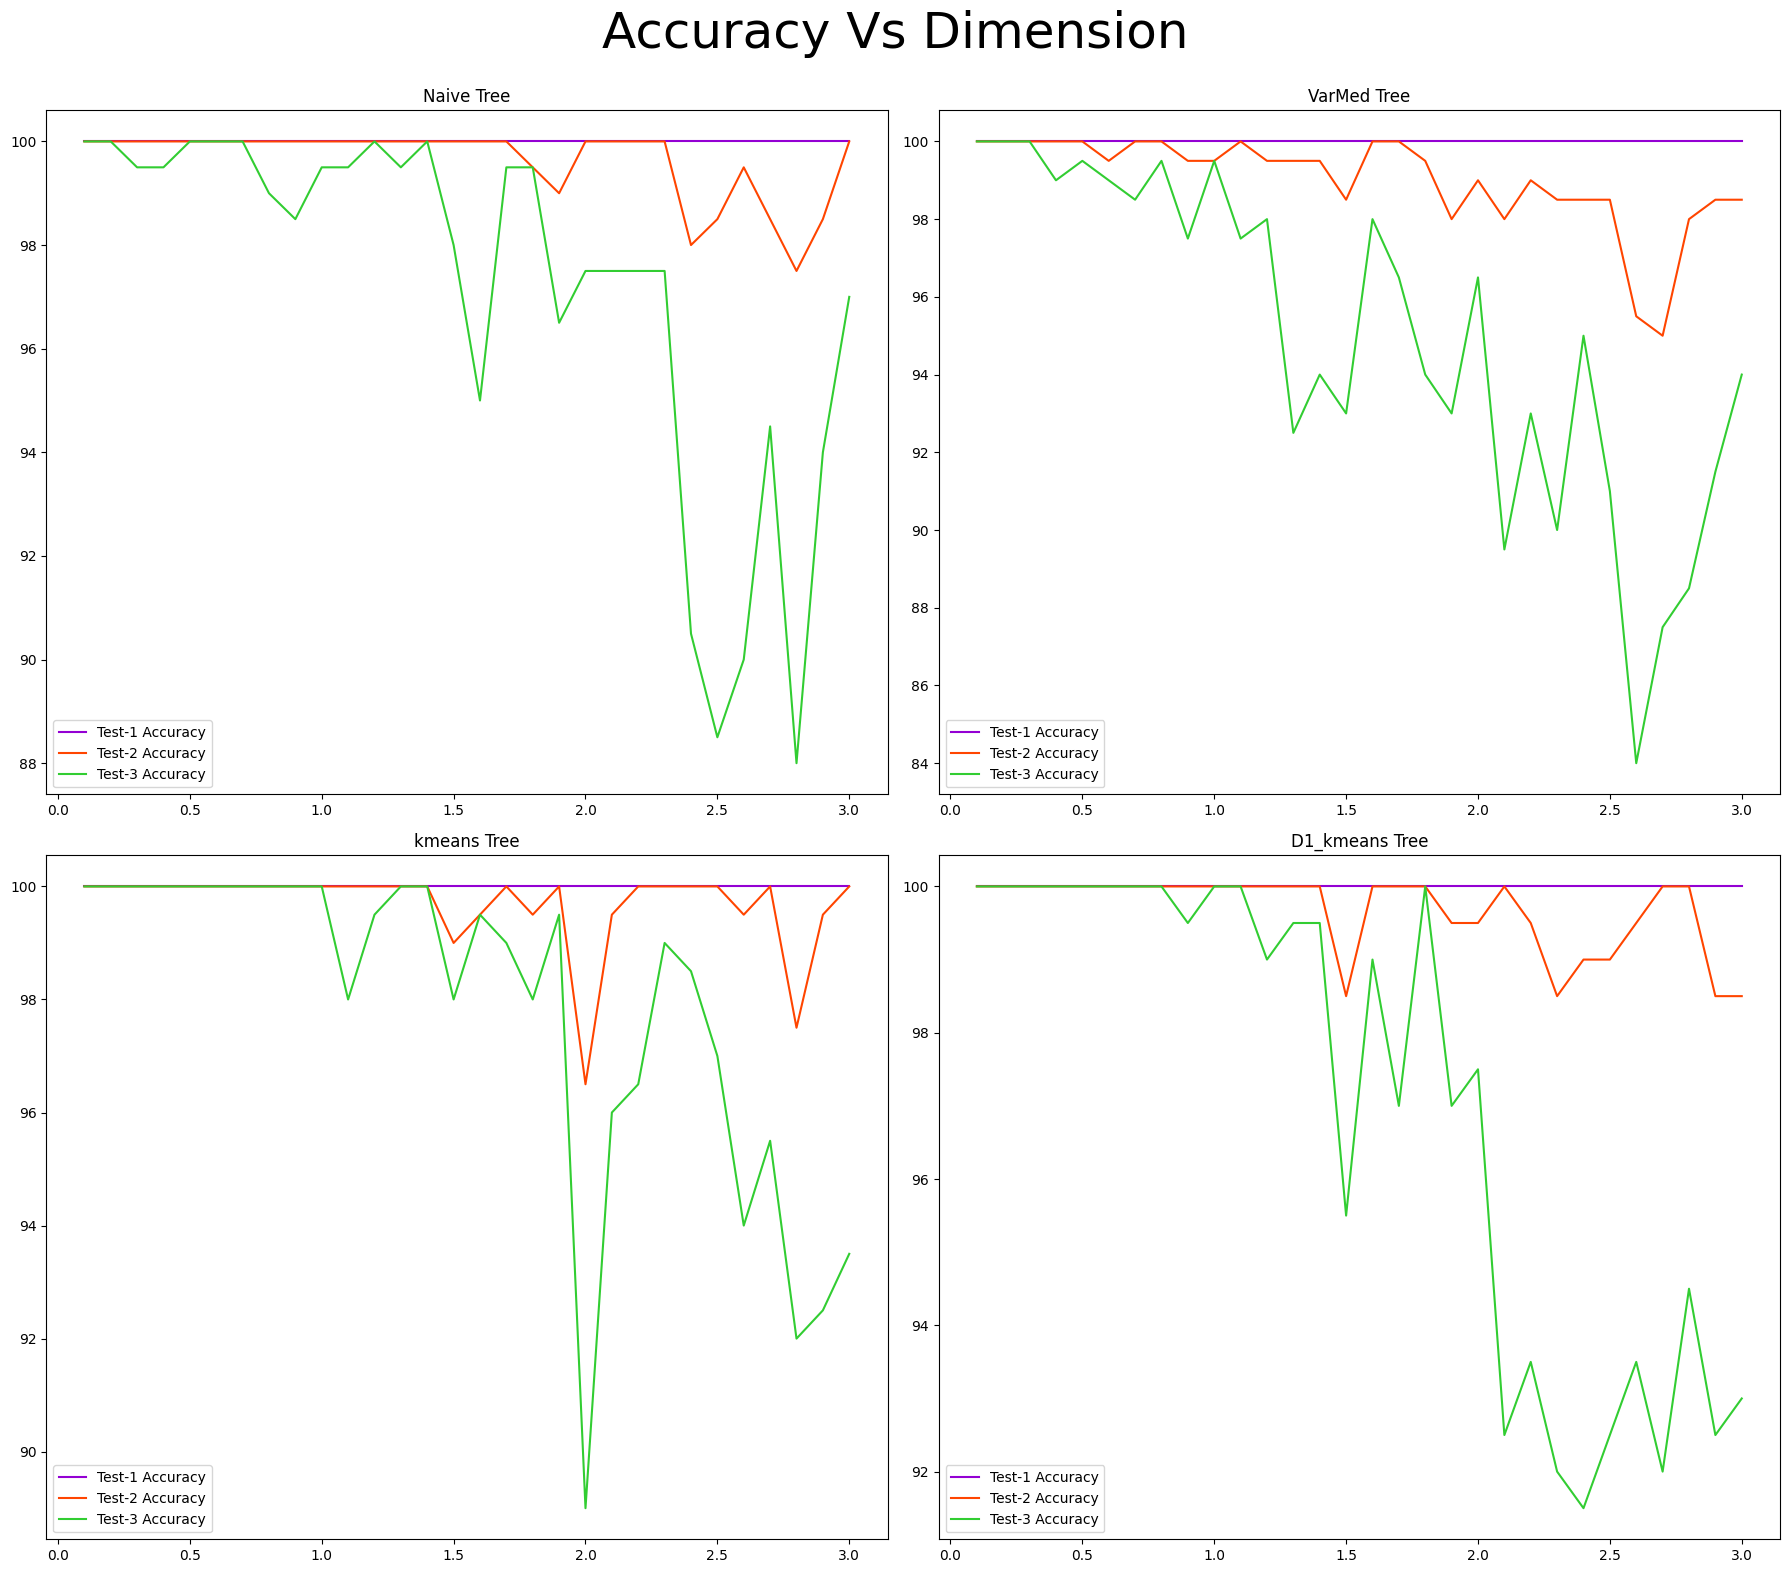

In [19]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Leaf Size Statistics Vs Dimension

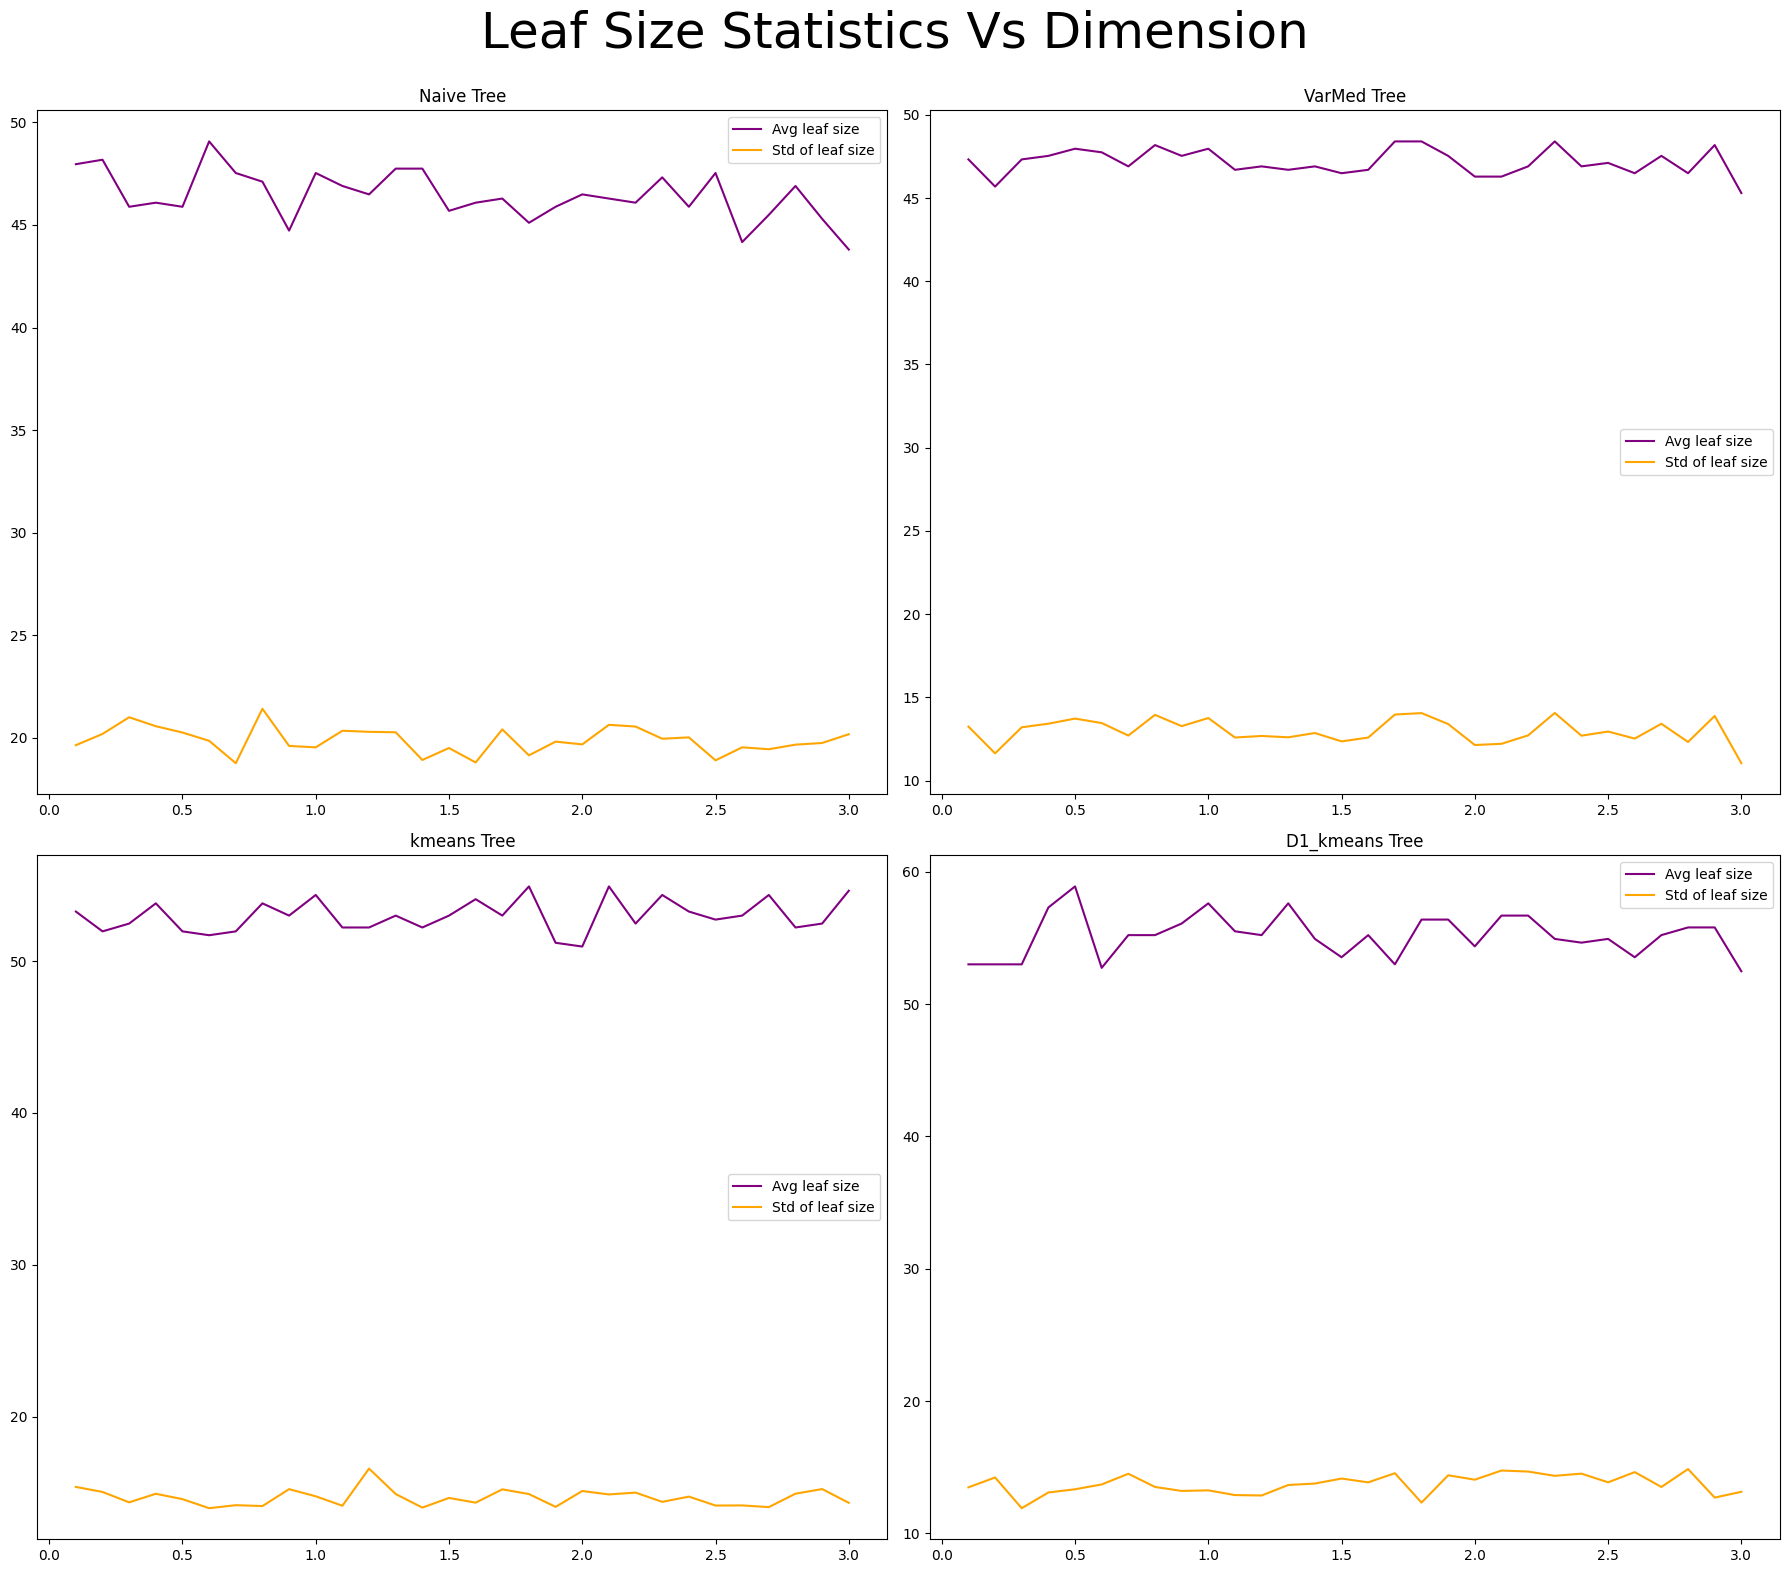

In [20]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 5)
varmed_data.plot(axs[0, 1], x, 5)
kmeans_data.plot(axs[1, 0], x, 5)
d1_kmeans_data.plot(axs[1, 1], x, 5)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Leaf Size Statistics Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Split quality Vs Dimension

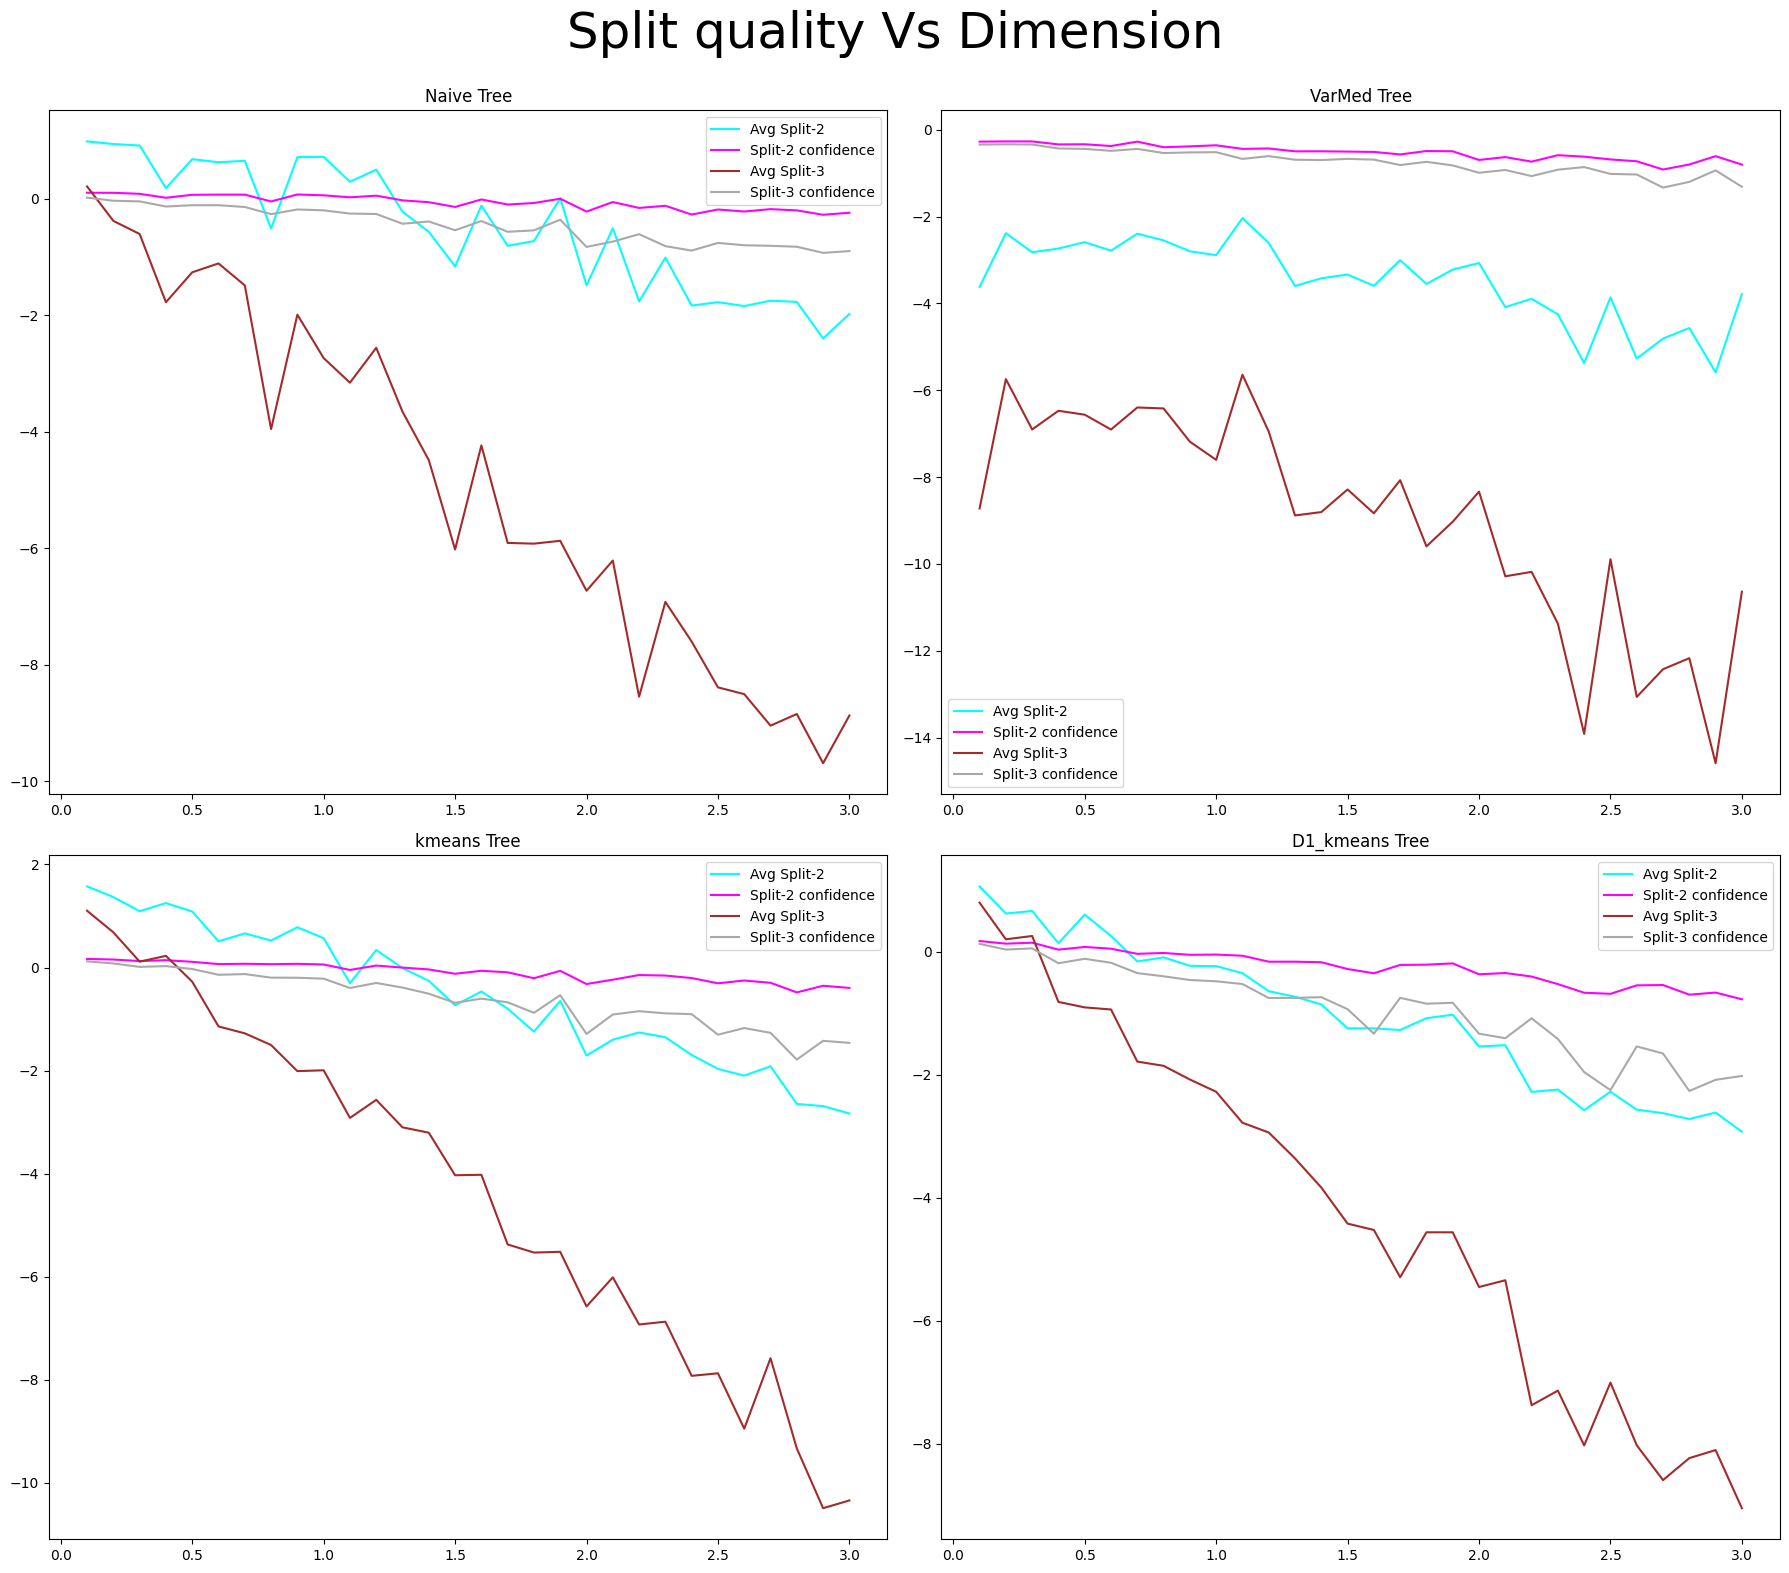

In [21]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 6)
varmed_data.plot(axs[0, 1], x, 6)
kmeans_data.plot(axs[1, 0], x, 6)
d1_kmeans_data.plot(axs[1, 1], x, 6)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Split quality Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Variation: Cluster Imbalance (% distribution among clusters)

In [22]:
def generate_imbalance_distribution(k, decay_rate=0.5):
    weights = [decay_rate ** i for i in range(k)]
    total = sum(weights)
    percentages = [(w / total) * 100 for w in weights]
    return percentages

dimension = 10
files = ['Naive_GHT.c', 'VarMed_GHT.c', 'kmeans_GHT.c', 'D1_kmeans_GHT.c']
N = 10000
cluster = 5

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = [float(x/10) for x in range(1,11,1)]

for filename, data_obj in zip(files, Data):
    new_dimension = "#define dimension " + str(dimension)

    with open(filename, 'r') as file:
        content = file.read()
        
    new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
    with open(filename, 'w') as file:
        file.write(new_content)
        
    for n in variation:
        aniso = [1.0, 0.5, 2, 4.0]
        
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 200,
            test2 = 200,
            test3 = 200,
            seed = 100,
            percentages = generate_imbalance_distribution(cluster, n)
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)
x =[float(var/10) for var in variation]

## Accuracy Vs Dimension

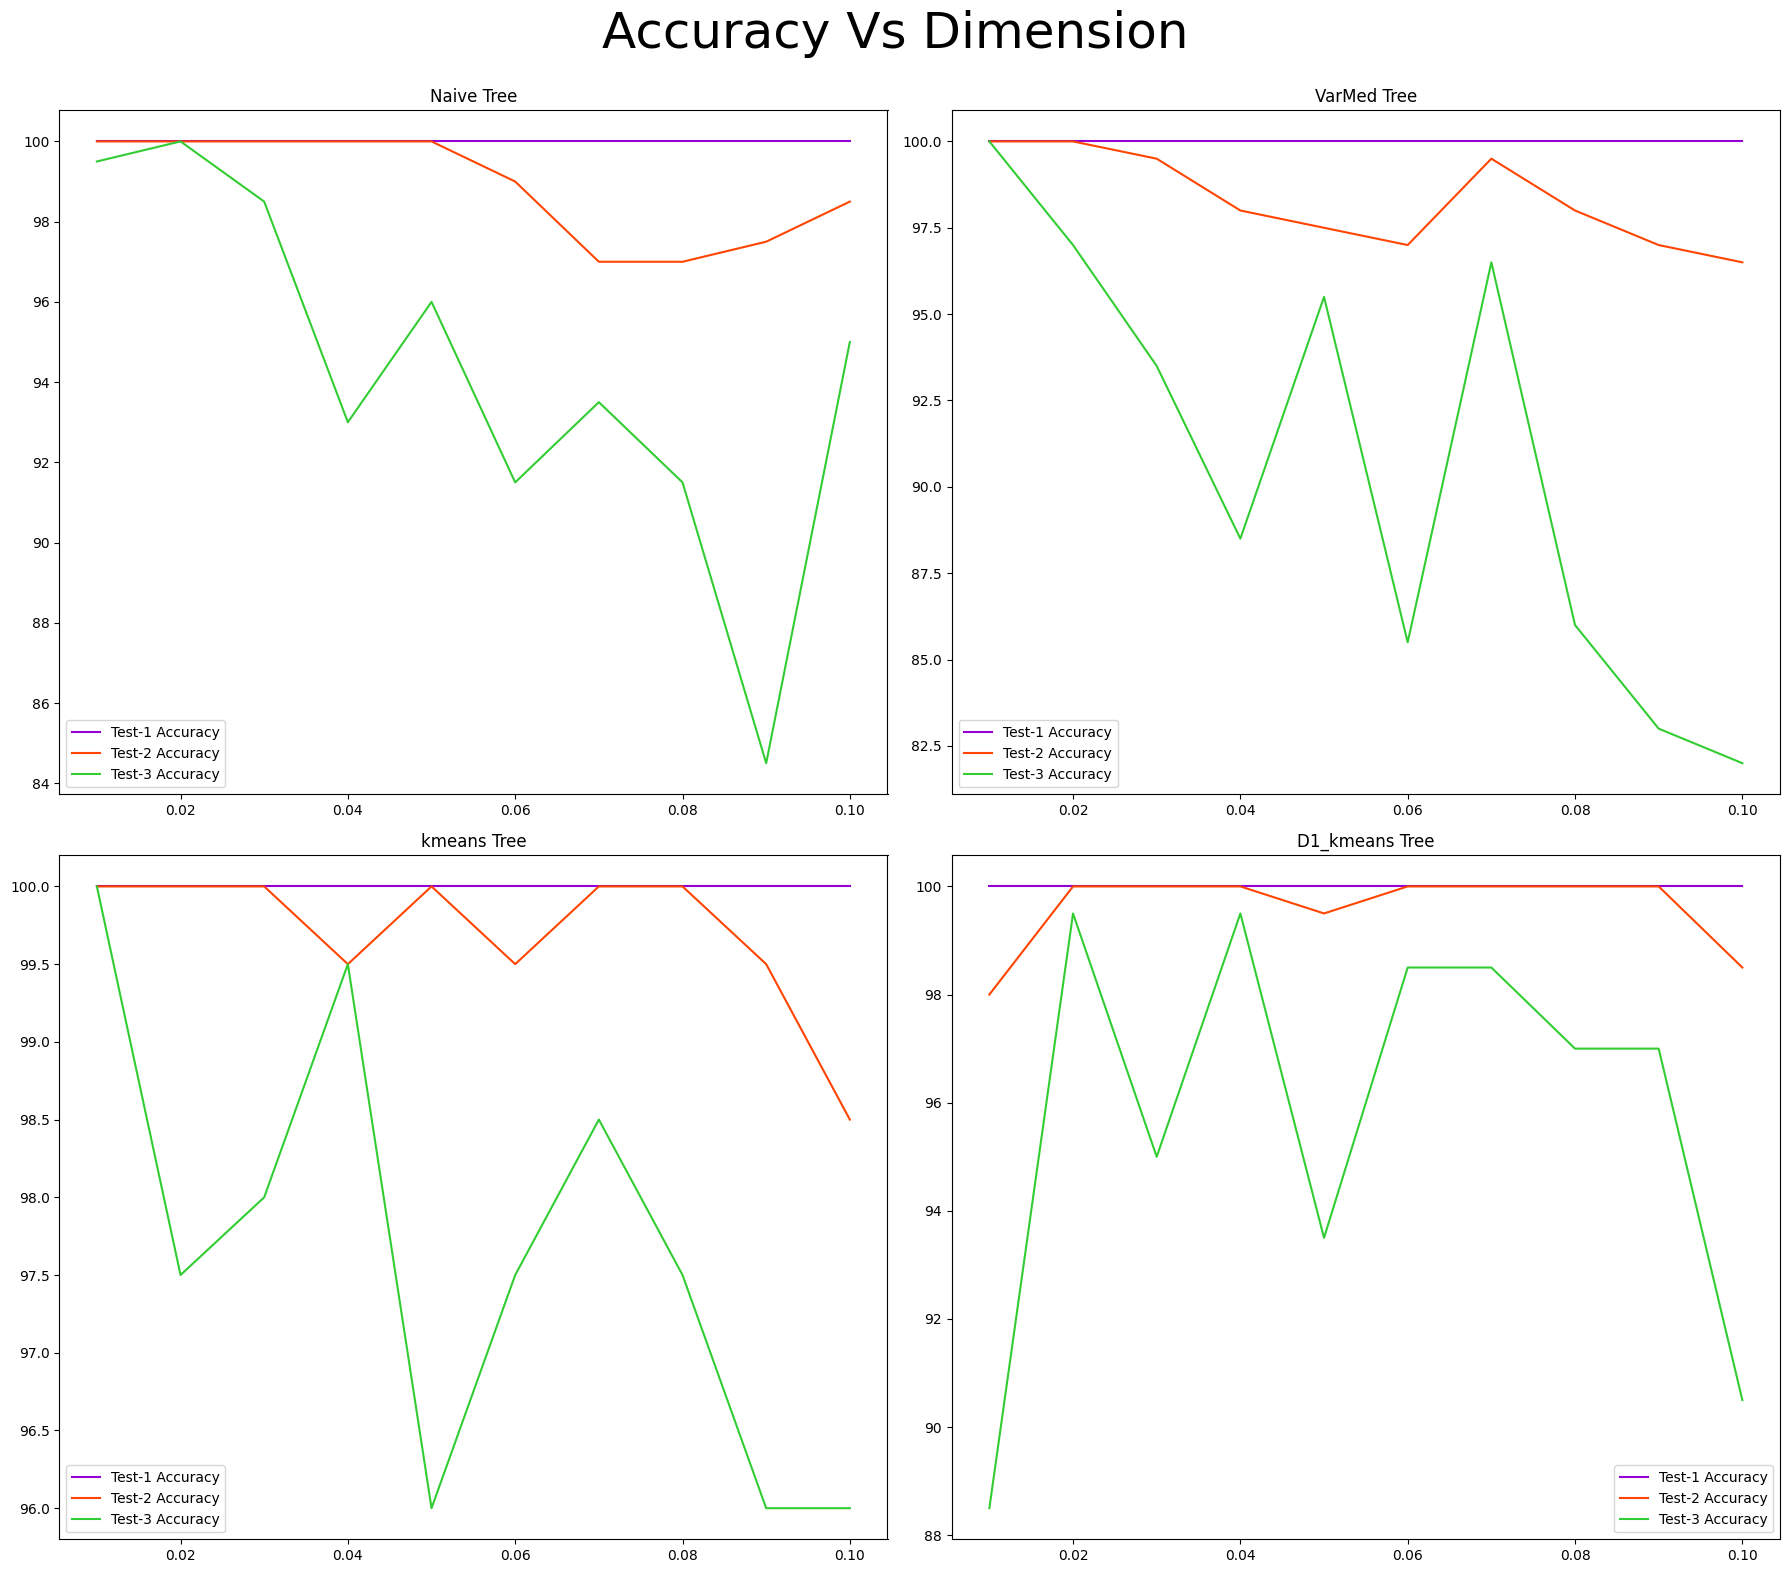

In [23]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Leaf Size Statistics Vs Dimension

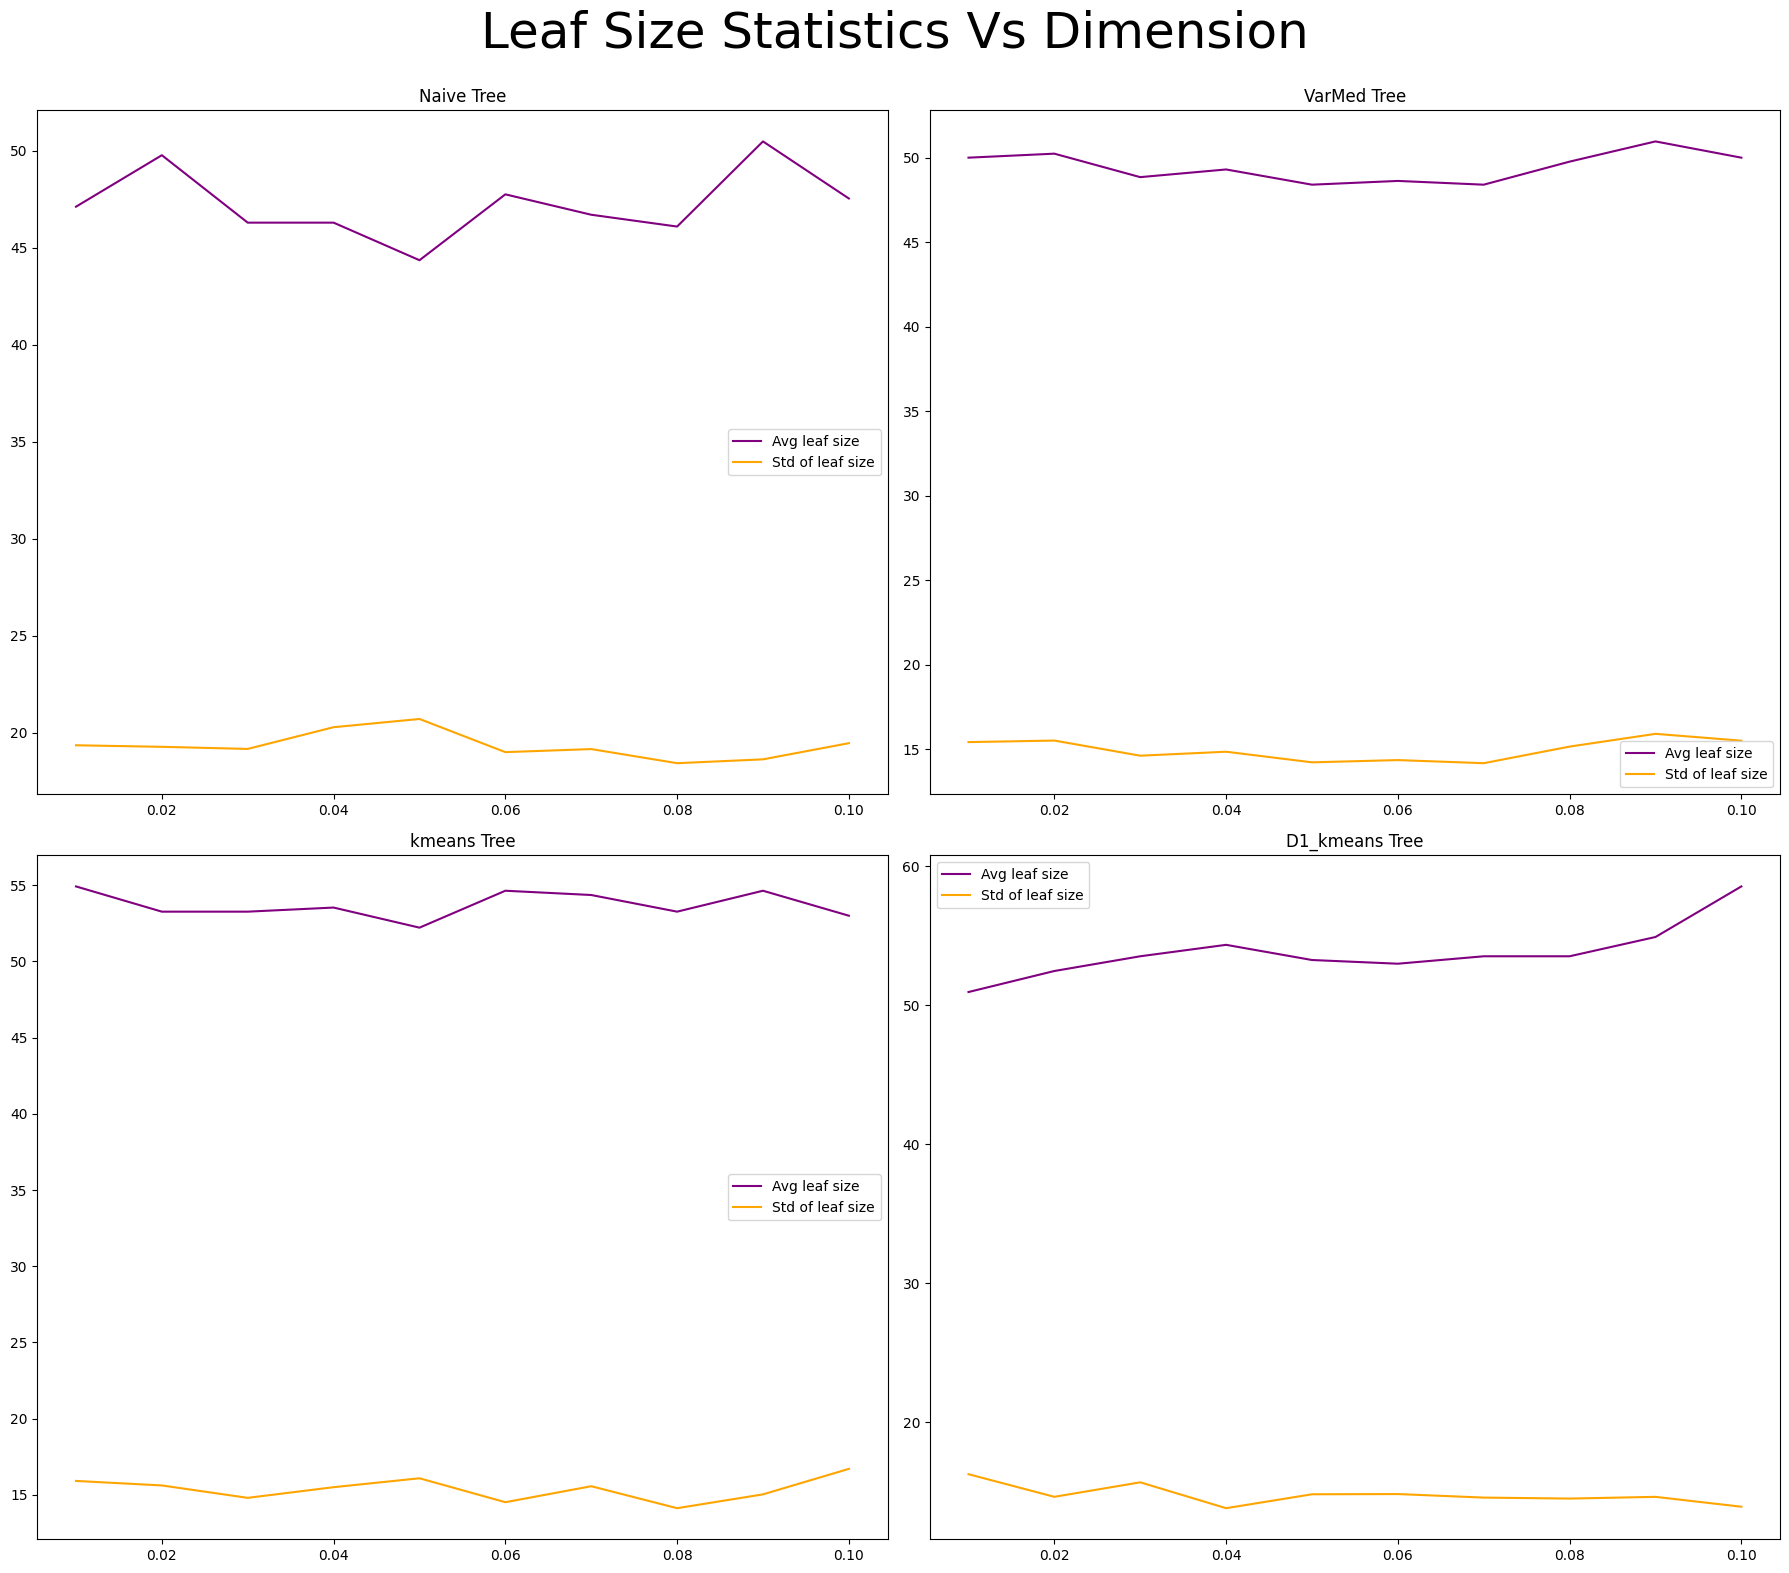

In [24]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 5)
varmed_data.plot(axs[0, 1], x, 5)
kmeans_data.plot(axs[1, 0], x, 5)
d1_kmeans_data.plot(axs[1, 1], x, 5)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Leaf Size Statistics Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Split quality Vs Dimension

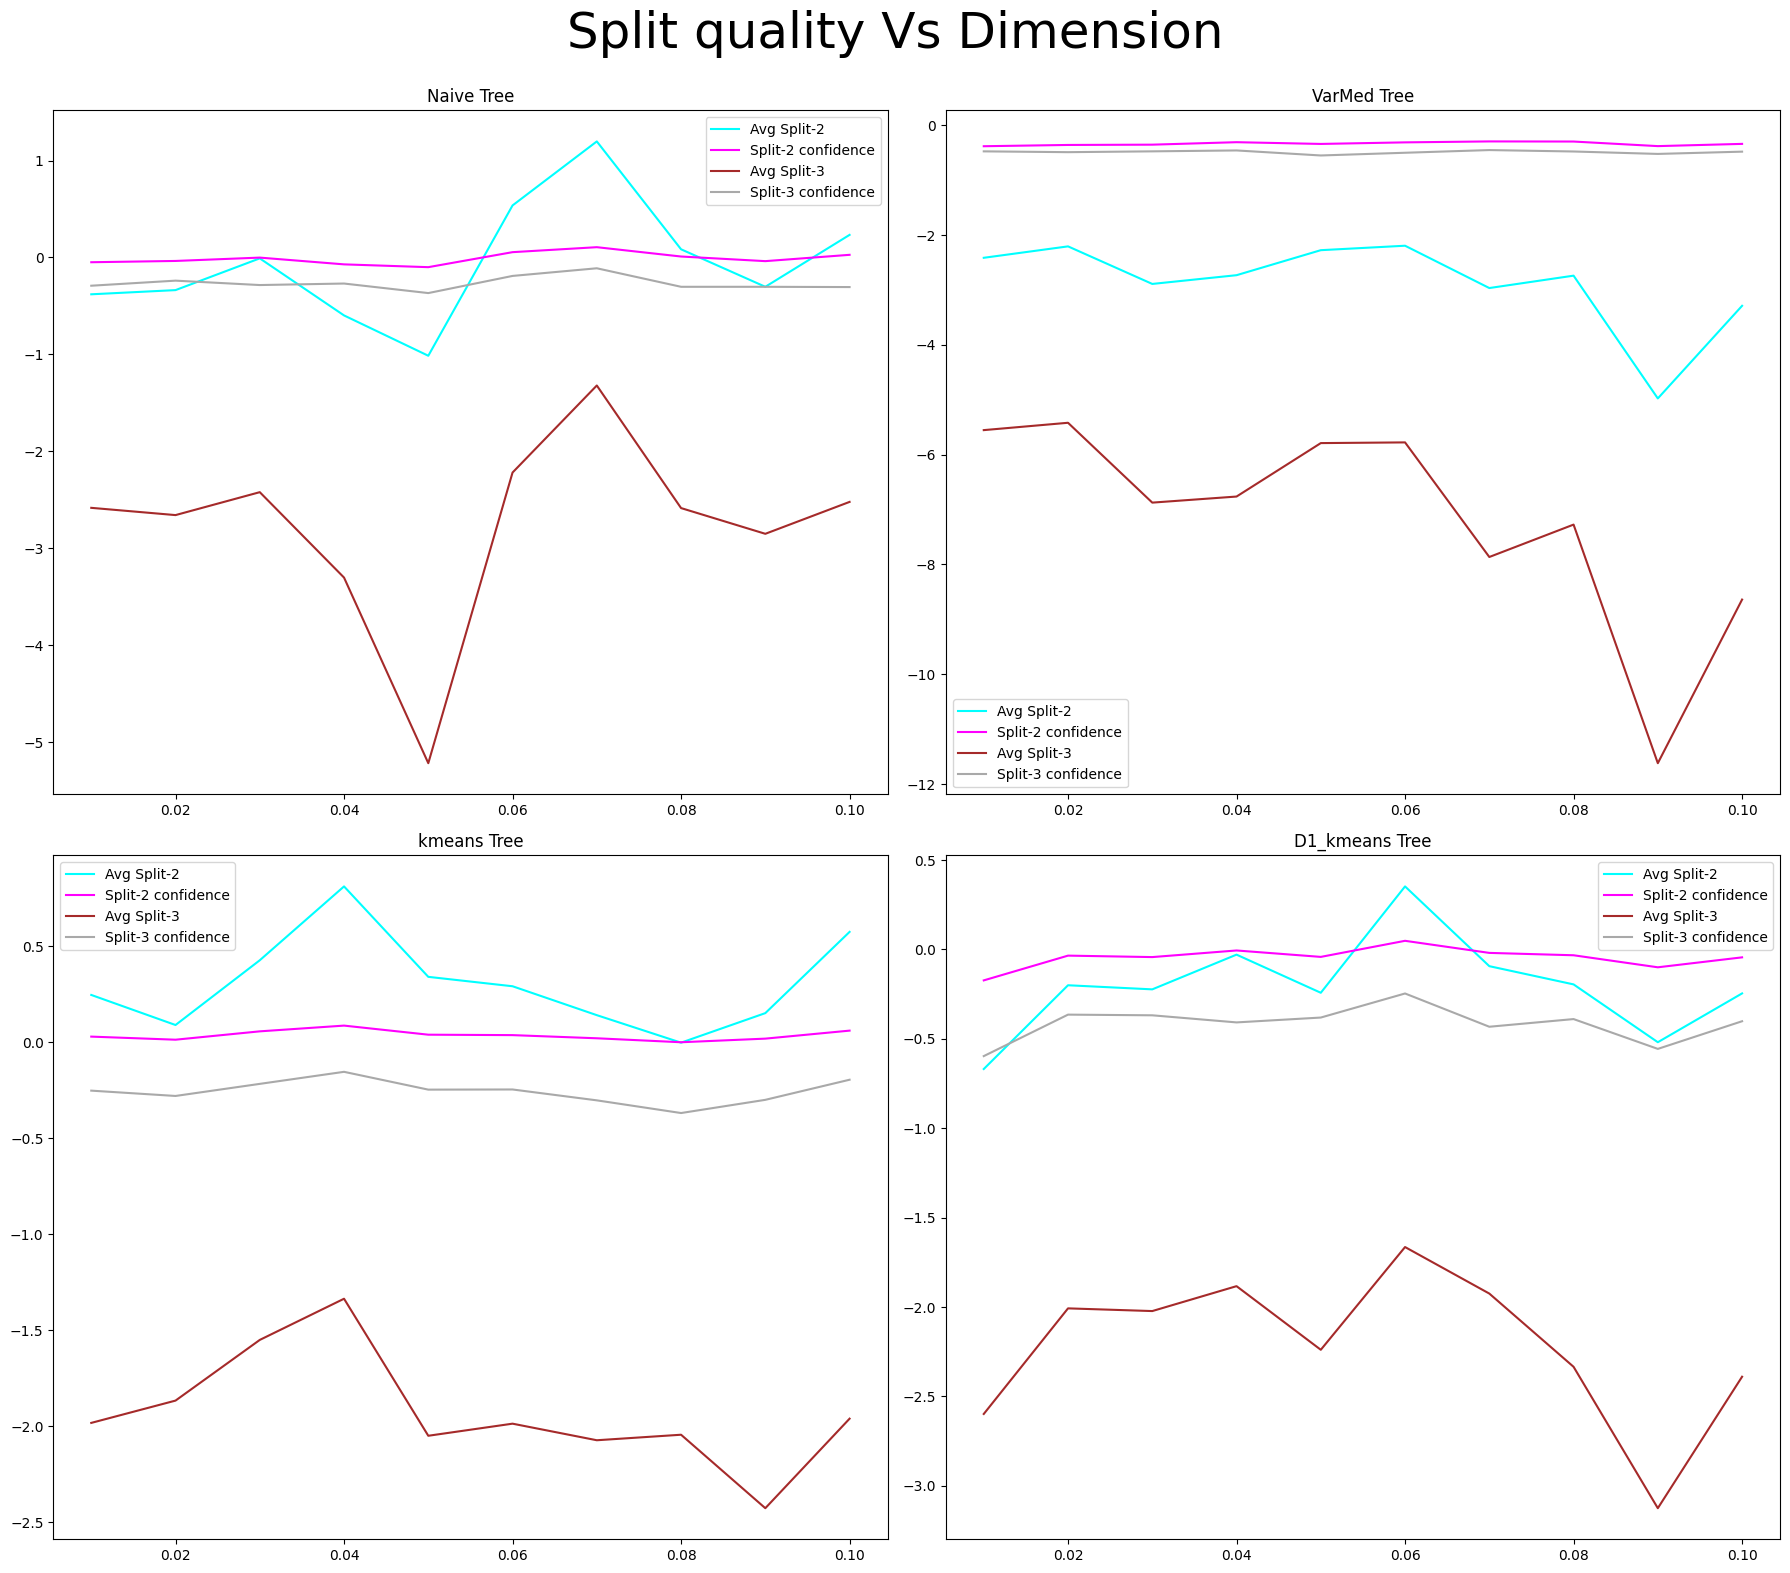

In [25]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 6)
varmed_data.plot(axs[0, 1], x, 6)
kmeans_data.plot(axs[1, 0], x, 6)
d1_kmeans_data.plot(axs[1, 1], x, 6)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Split quality Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Variation: Number of Points (n_points)

In [26]:
dimension = 10
files = ['Naive_GHT.c', 'VarMed_GHT.c', 'kmeans_GHT.c', 'D1_kmeans_GHT.c']
N = 10000
cluster = 5

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = range(0,25,1)

for filename, data_obj in zip(files, Data):
    new_dimension = "#define dimension " + str(dimension)

    with open(filename, 'r') as file:
        content = file.read()
        
    new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
    with open(filename, 'w') as file:
        file.write(new_content)
        
    for n in variation:
        N = 10000 + n * 1000
        aniso = [1.0, 0.5, 2, 4.0]
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 200,
            test2 = 200,
            test3 = 200,
            seed = 100,
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)
x =variation

## Accuracy Vs Dimension

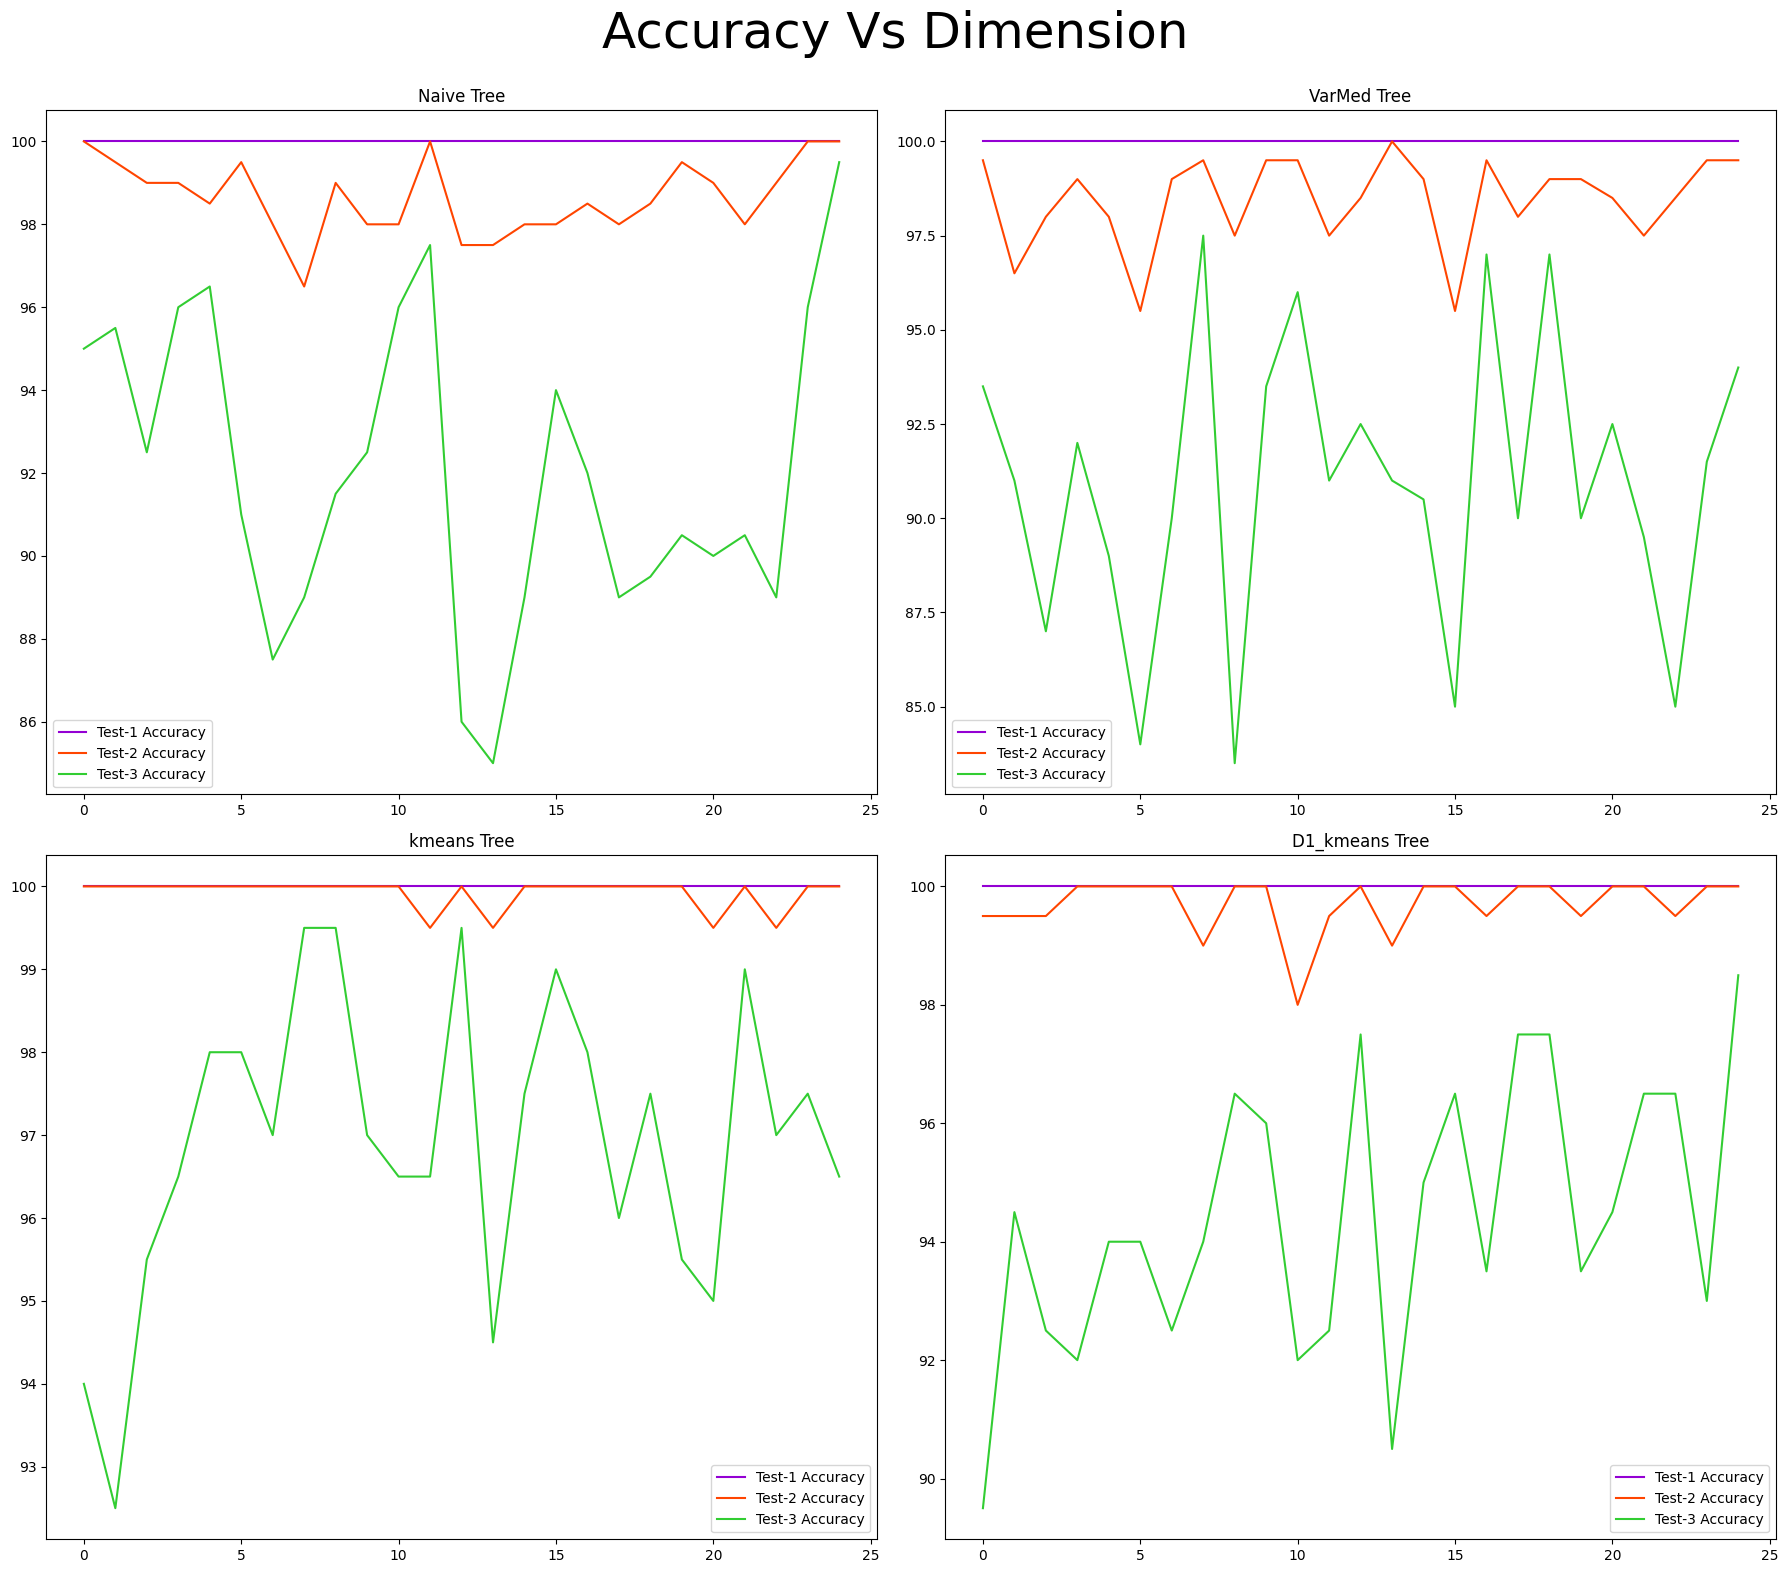

In [27]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Build time Vs Dimension

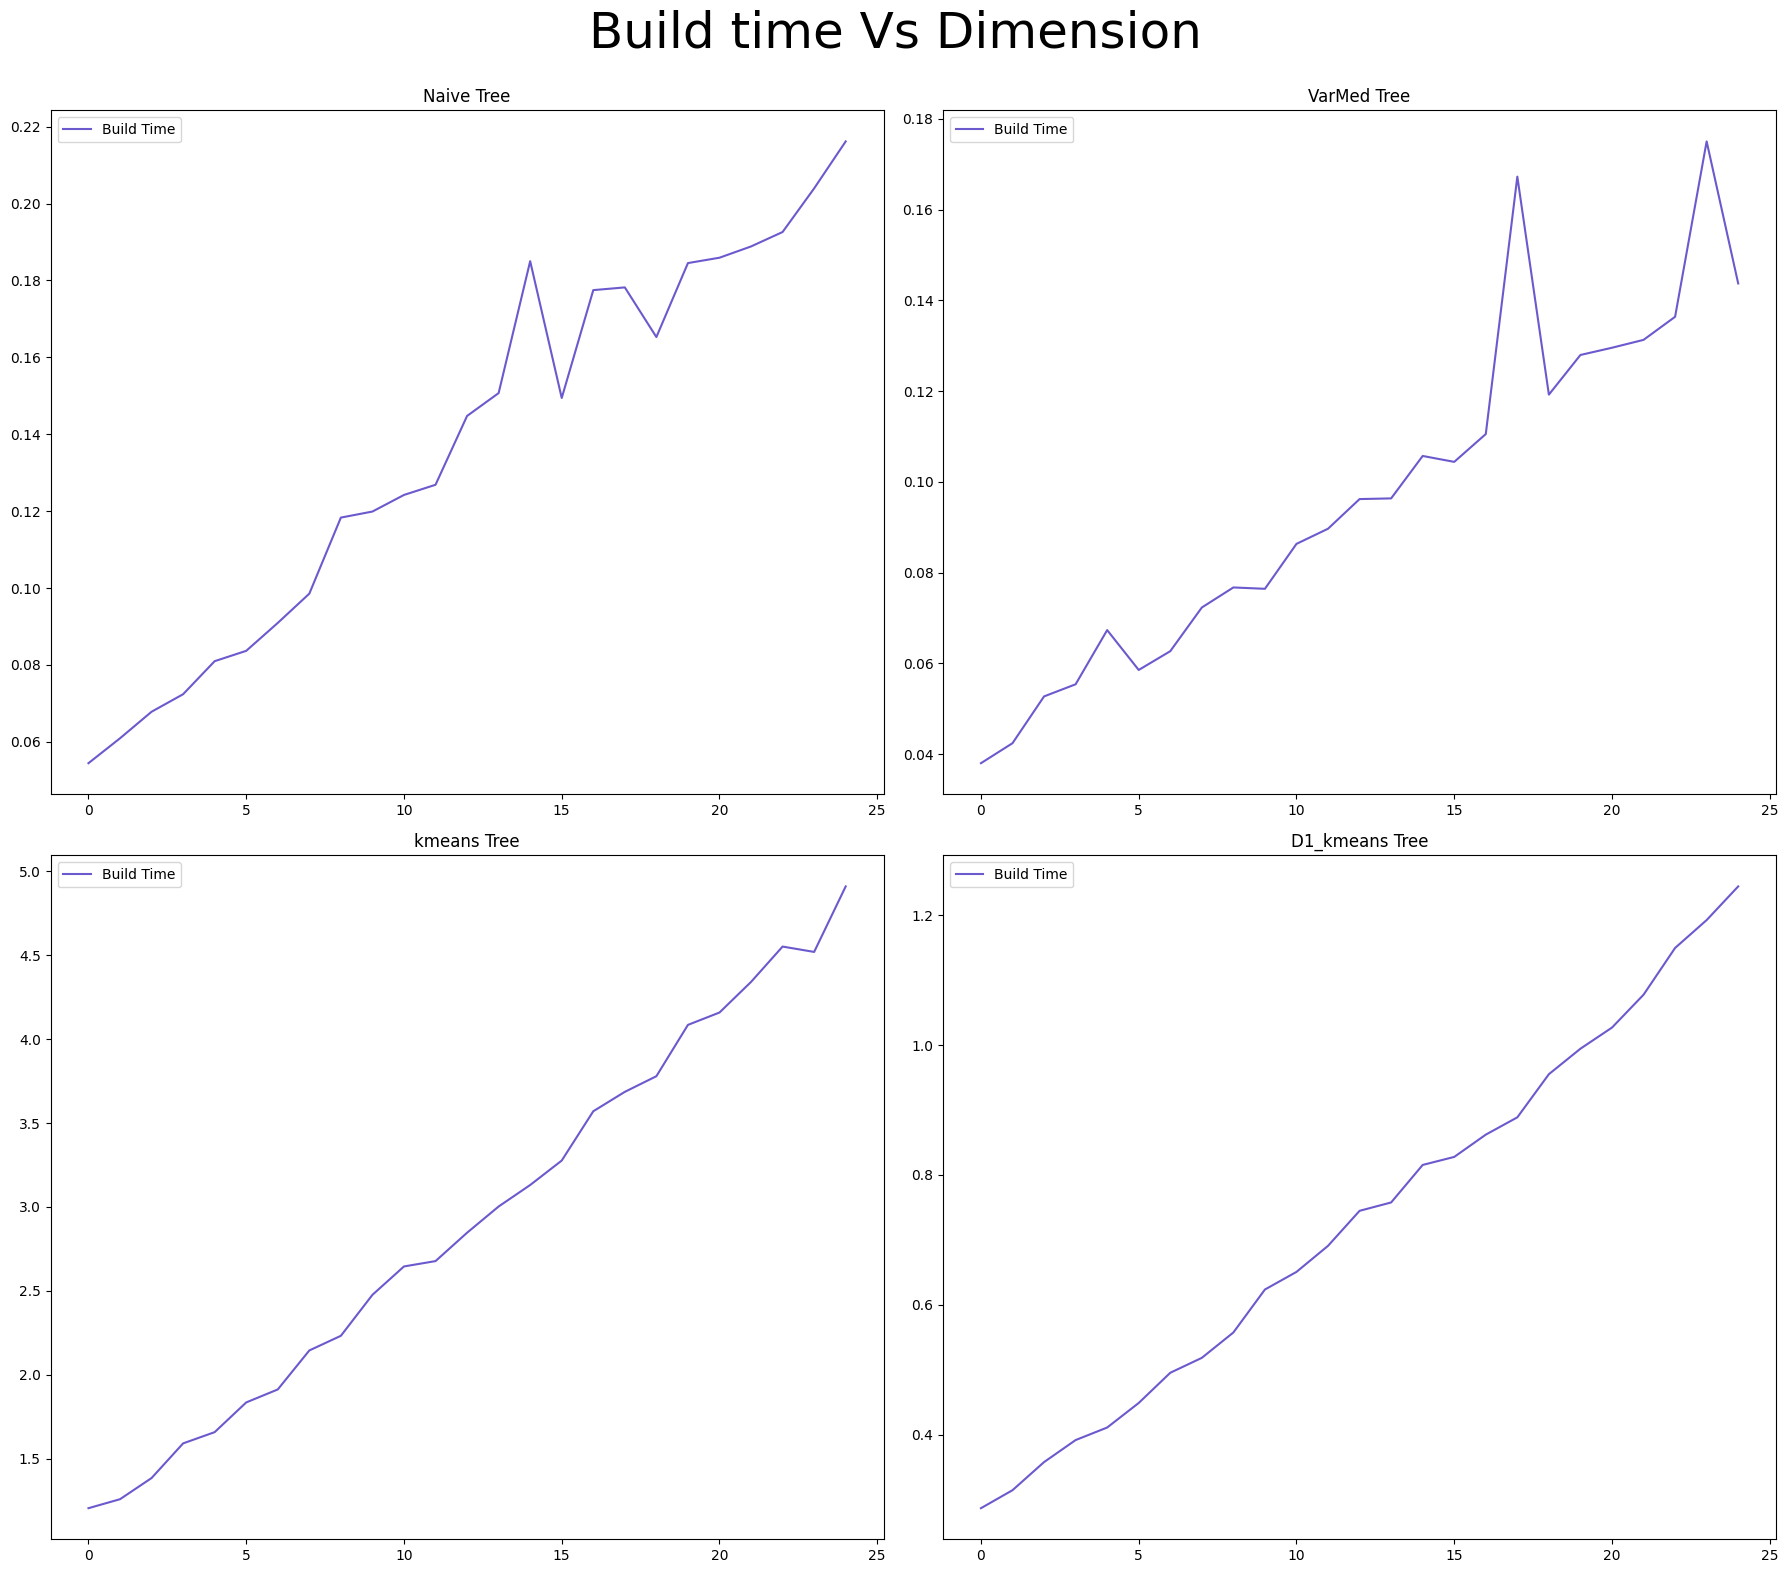

In [28]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 2)
varmed_data.plot(axs[0, 1], x, 2)
kmeans_data.plot(axs[1, 0], x, 2)
d1_kmeans_data.plot(axs[1, 1], x, 2)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Build time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Test time Vs Dimension

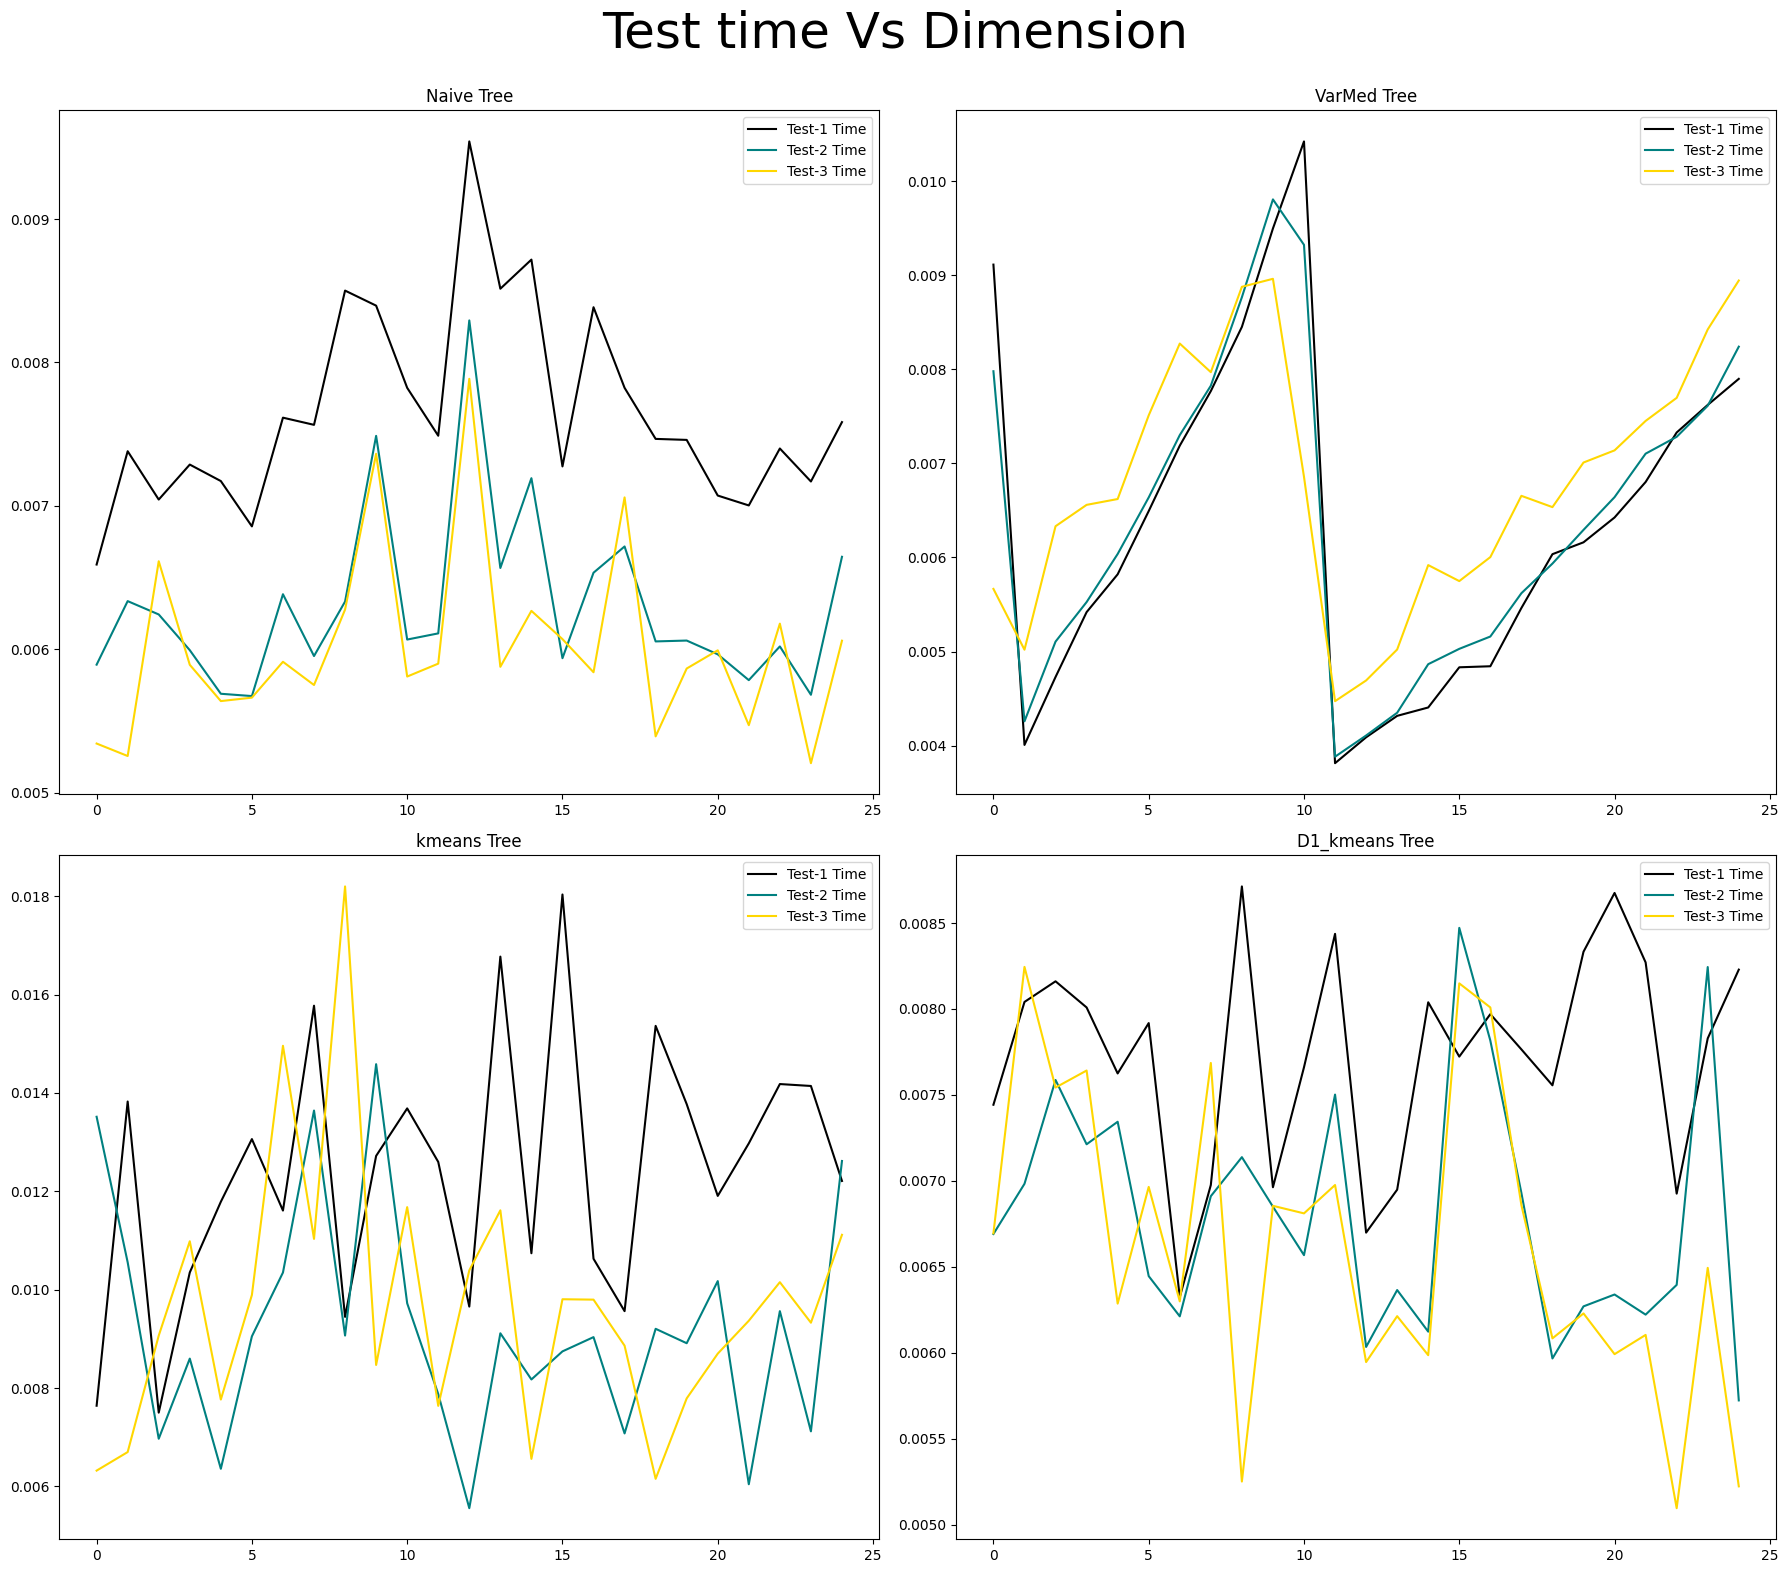

In [29]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 3)
varmed_data.plot(axs[0, 1], x, 3)
kmeans_data.plot(axs[1, 0], x, 3)
d1_kmeans_data.plot(axs[1, 1], x, 3)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Test time Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## No. of splits Vs Dimension

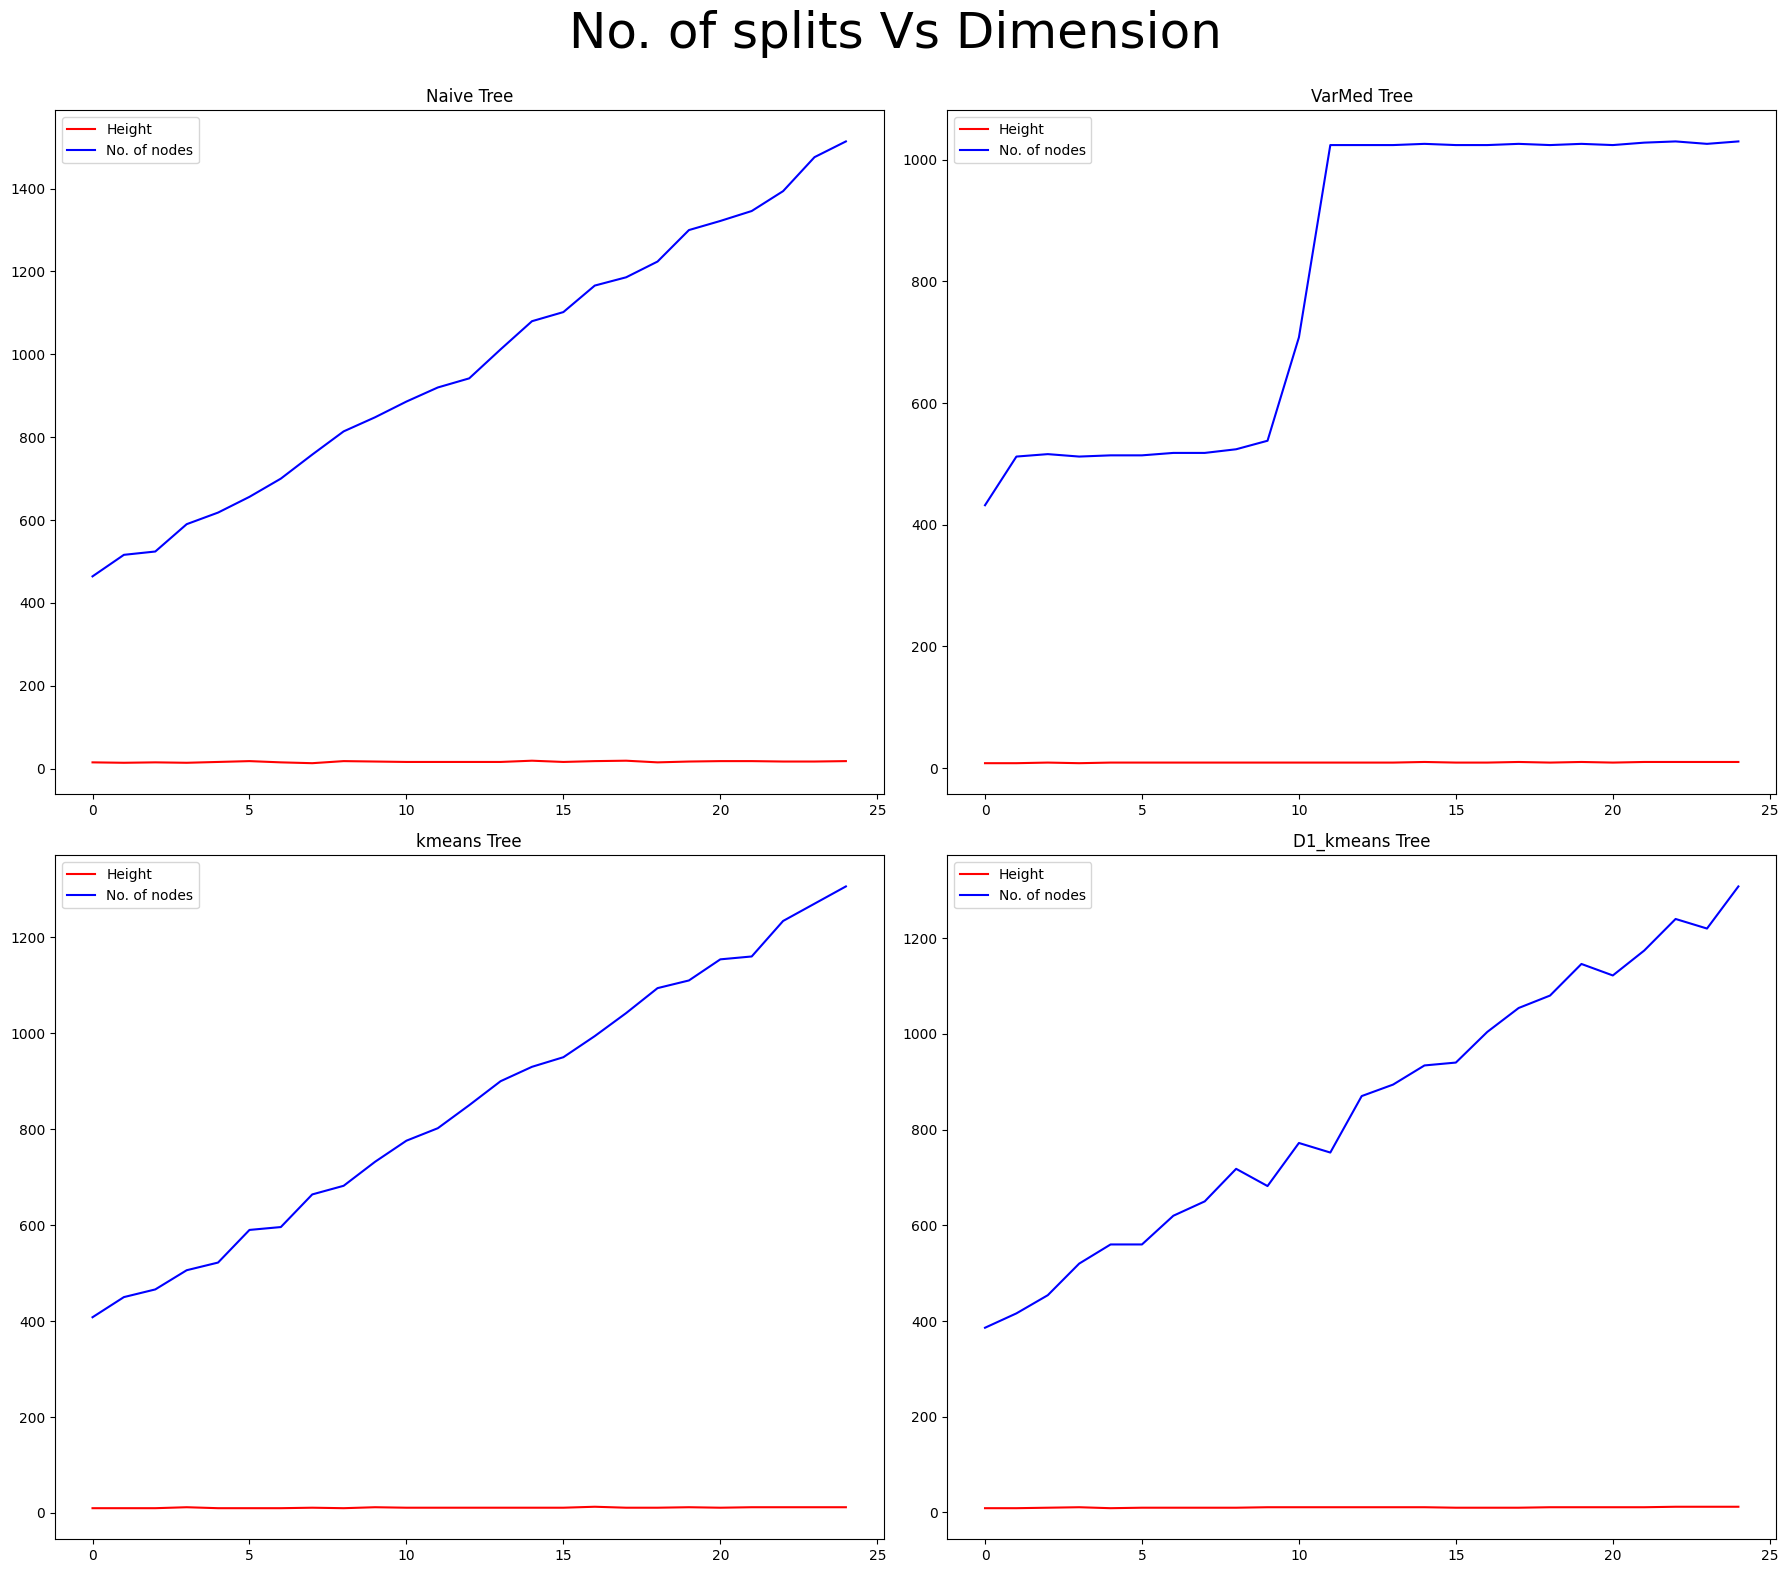

In [30]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 4)
varmed_data.plot(axs[0, 1], x, 4)
kmeans_data.plot(axs[1, 0], x, 4)
d1_kmeans_data.plot(axs[1, 1], x, 4)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('No. of splits Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Leaf Size Statistics Vs Dimension

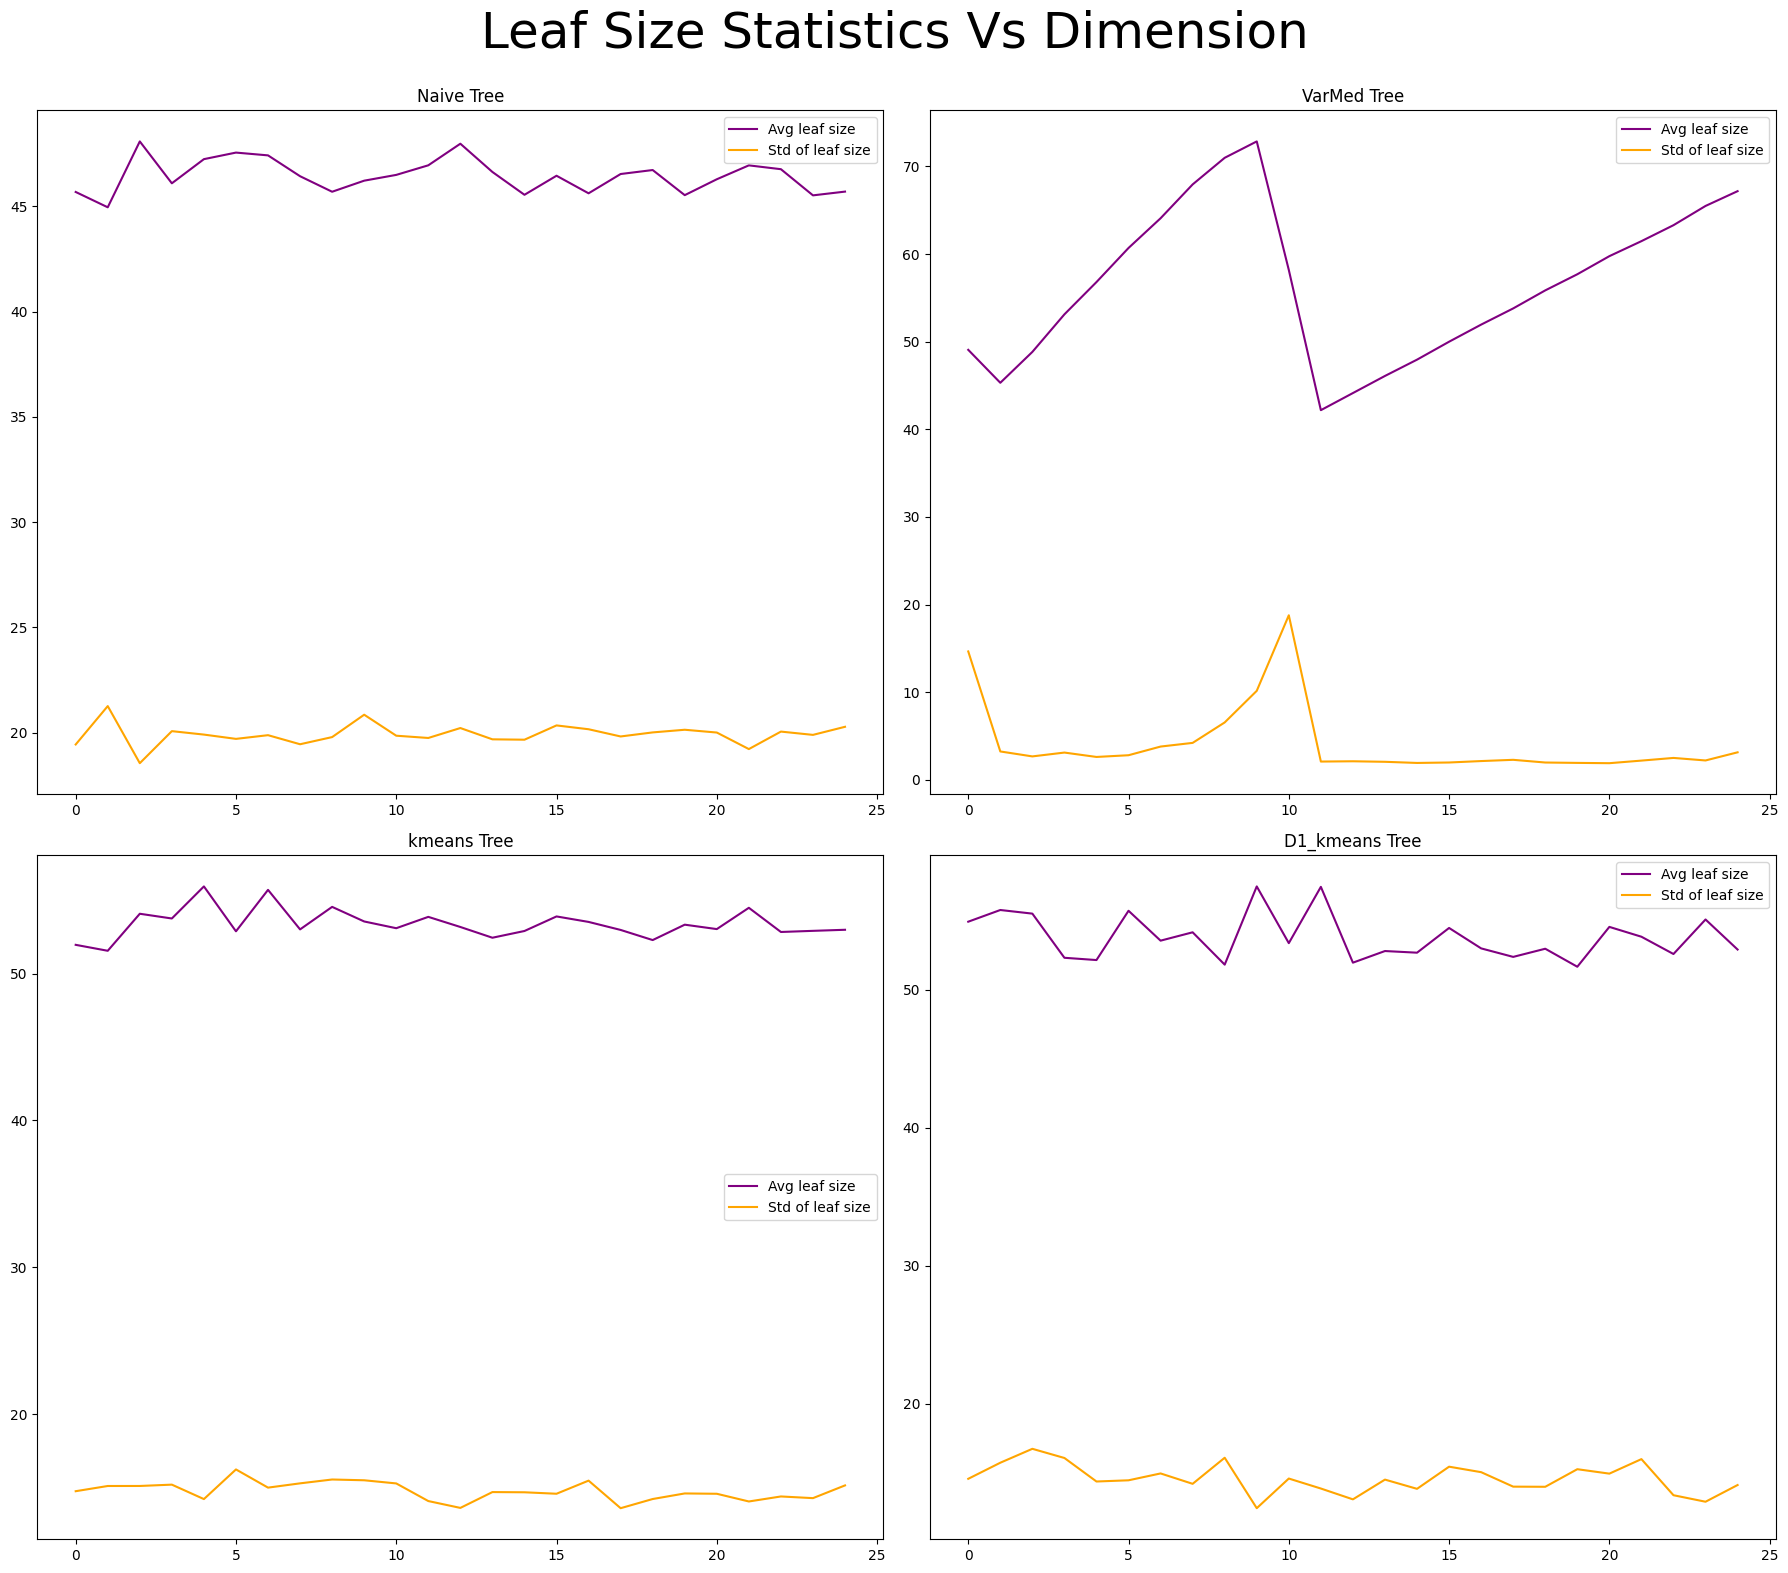

In [31]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 5)
varmed_data.plot(axs[0, 1], x, 5)
kmeans_data.plot(axs[1, 0], x, 5)
d1_kmeans_data.plot(axs[1, 1], x, 5)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Leaf Size Statistics Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Variation: Distance Between Cluster Centers

In [32]:
dimension = 10
files = ['Naive_GHT.c', 'VarMed_GHT.c', 'kmeans_GHT.c', 'D1_kmeans_GHT.c']
N = 10000
cluster = 5

naive_data = data()
varmed_data = data()
kmeans_data = data()
d1_kmeans_data =data()

Data = [naive_data, varmed_data, kmeans_data, d1_kmeans_data]
variation = range(2,50,1)

for filename, data_obj in zip(files, Data):
    new_dimension = "#define dimension " + str(dimension)

    with open(filename, 'r') as file:
        content = file.read()
        
    new_content = re.sub(r'#define dimension\s\d*', new_dimension, content, count=1)
    
    with open(filename, 'w') as file:
        file.write(new_content)
        
    for sep in variation:
    
        aniso = [1.0, 0.5, 2, 4.0]
    
        gen.Anisotropic_gaussian_cluster(
            dimension = dimension,
            n_clusters = cluster,
            std = aniso,
            train = N,
            test1 = 200,
            test2 = 200,
            test3 = 200,
            seed = 100,
            sep = sep
        )
        
        compile_Tree= sub.run(['gcc', filename, '-o', 'out','-lm'])
        run_Tree= sub.run(['./out'], capture_output=True)
        output= run_Tree.stdout.decode("utf-8")
        
        Output(output, data_obj)
        
        # time.sleep(1)
x =variation

## Accuracy Vs Dimension

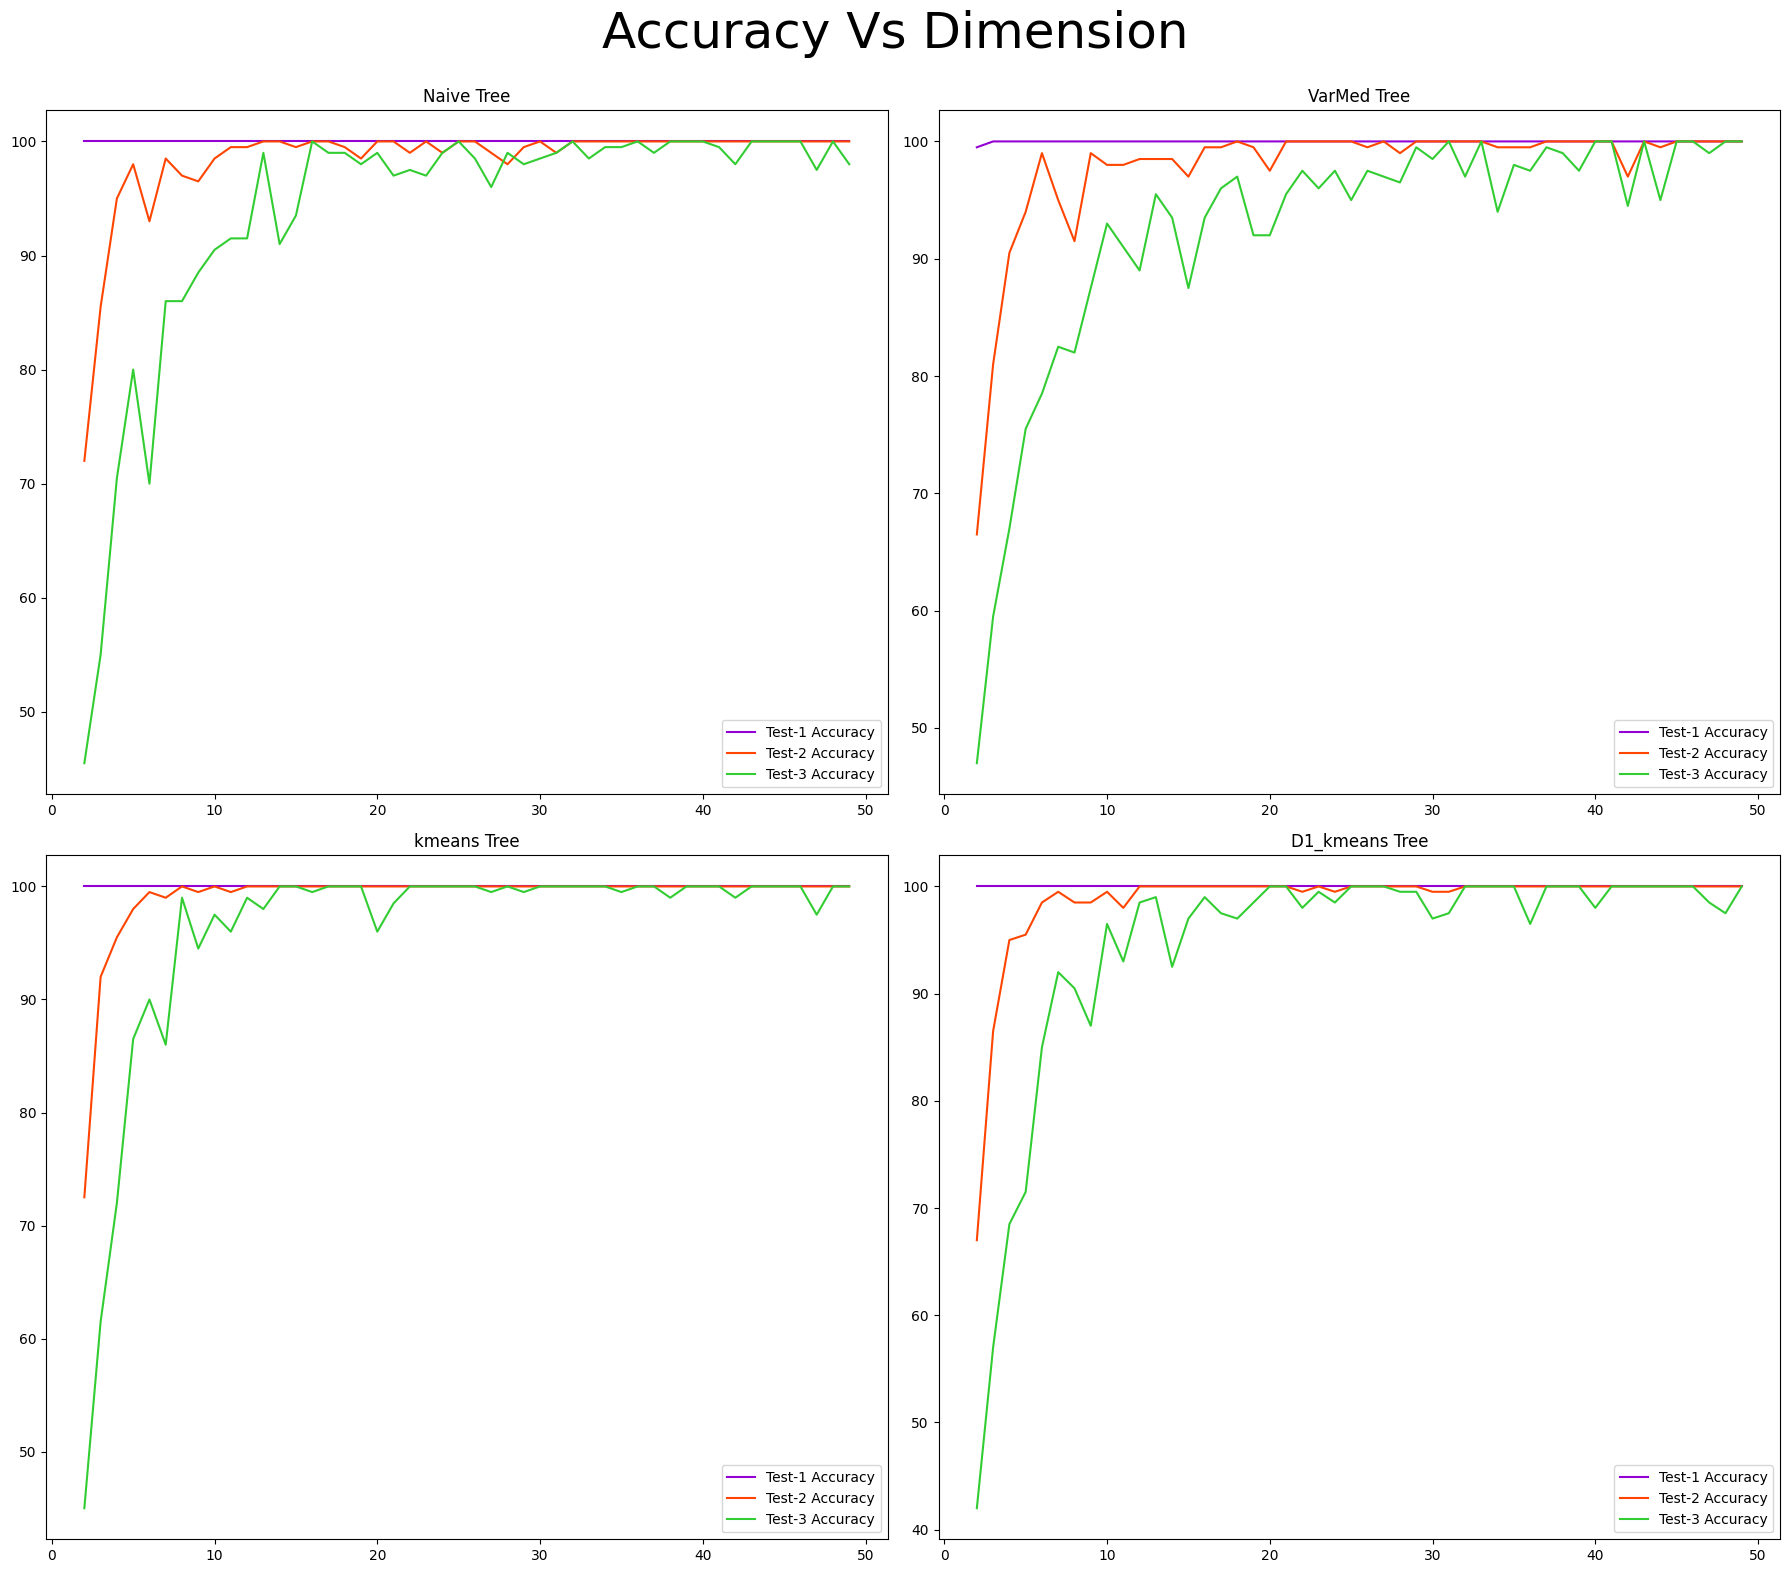

In [33]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 1)
varmed_data.plot(axs[0, 1], x, 1)
kmeans_data.plot(axs[1, 0], x, 1)
d1_kmeans_data.plot(axs[1, 1], x, 1)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Accuracy Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Split quality Vs Dimension

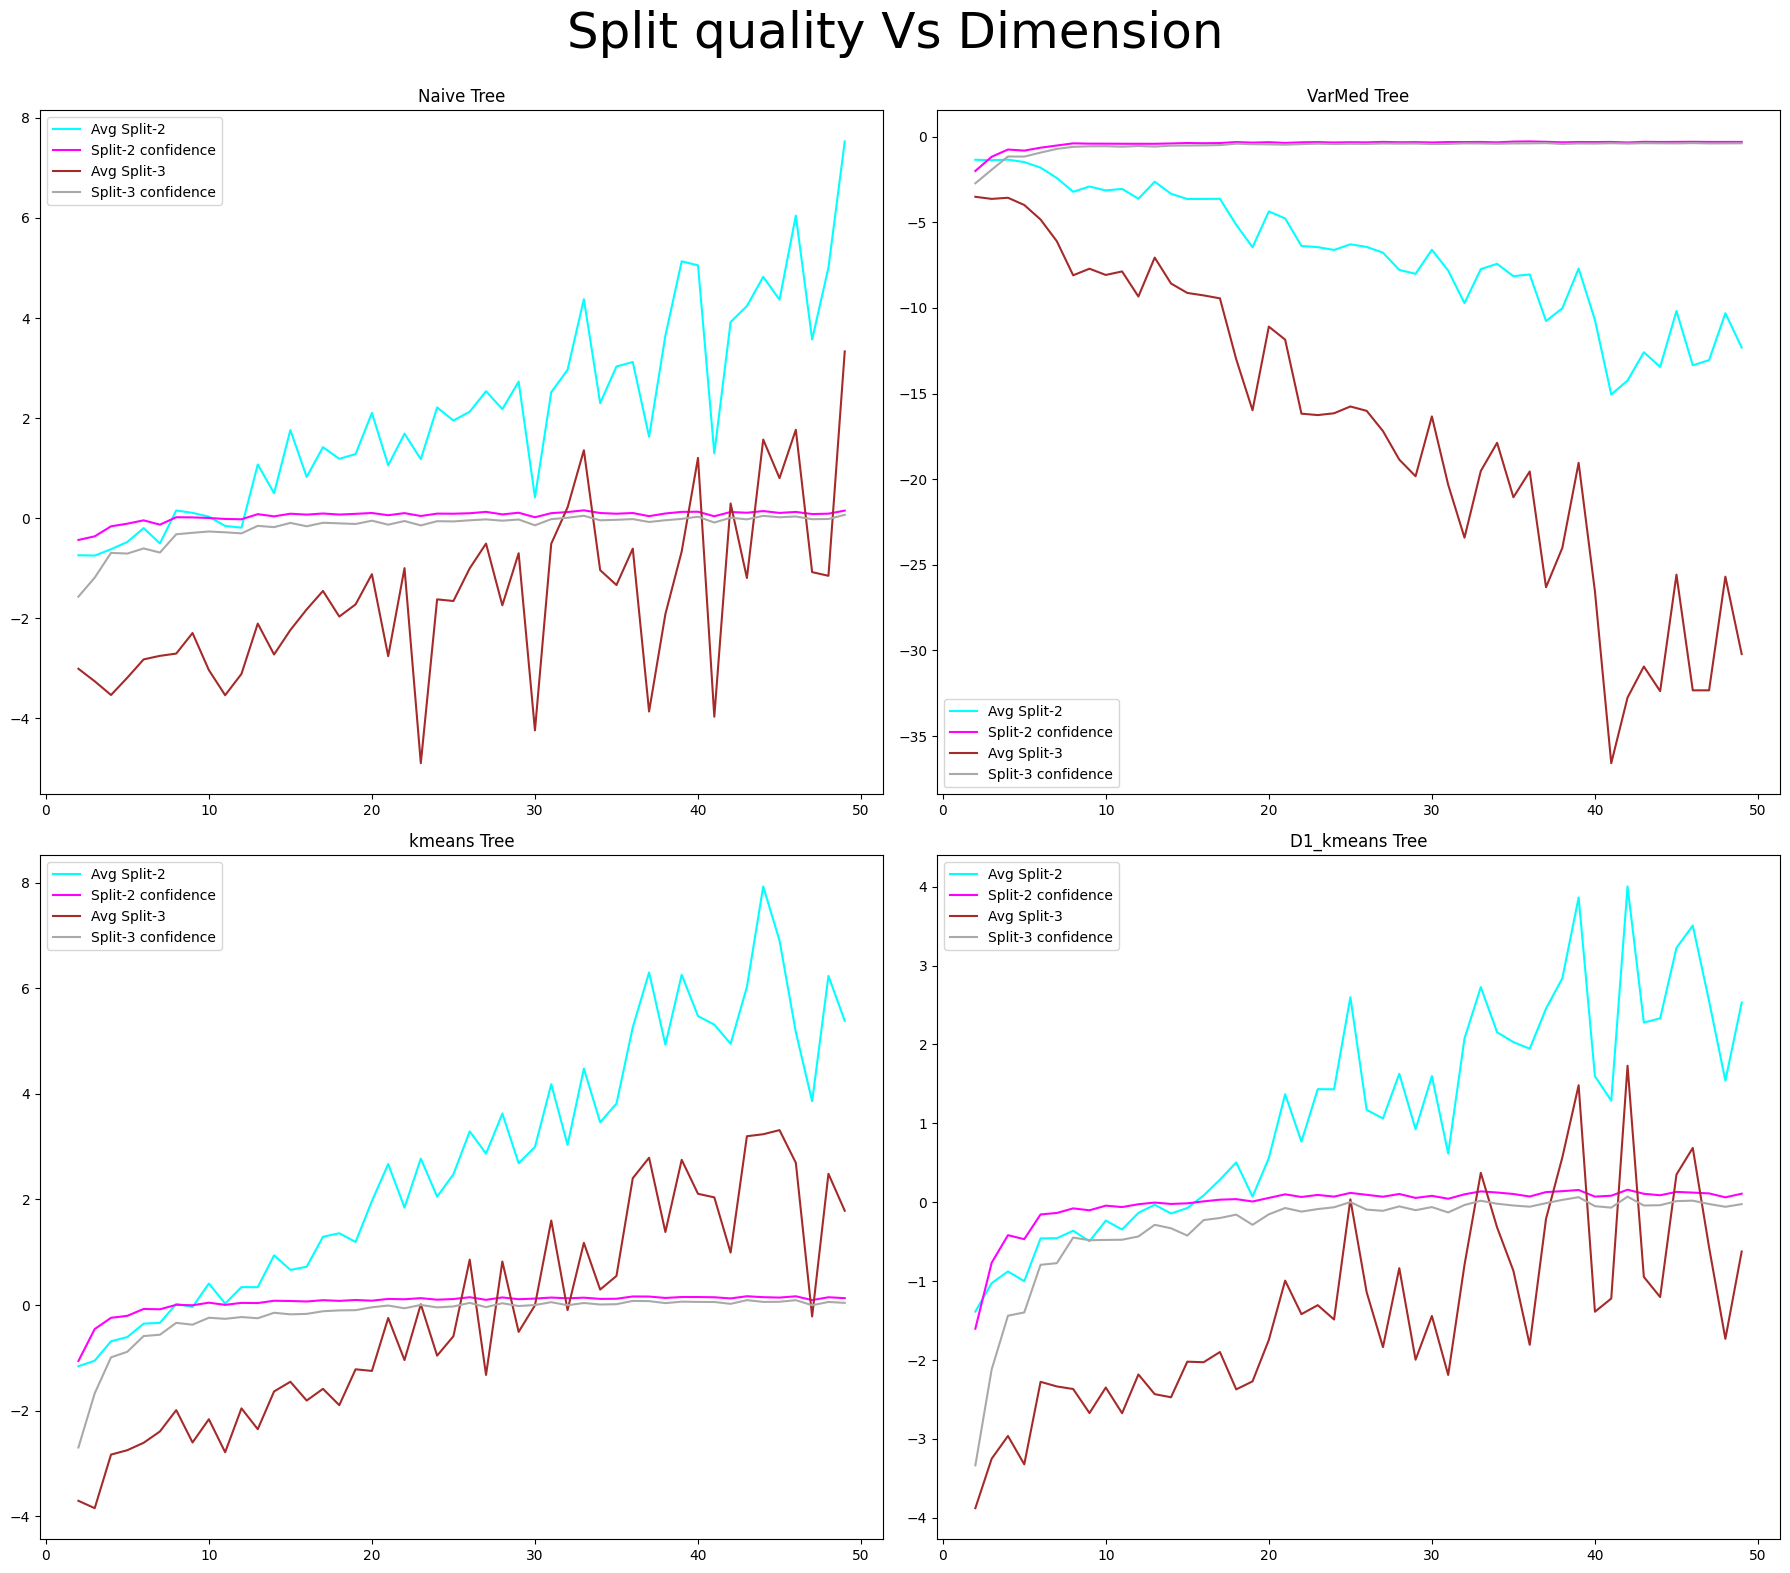

In [34]:
fig, axs = plt.subplots(2,2, figsize = (18,16))
naive_data.plot(axs[0, 0], x, 6)
varmed_data.plot(axs[0, 1], x, 6)
kmeans_data.plot(axs[1, 0], x, 6)
d1_kmeans_data.plot(axs[1, 1], x, 6)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[0,0].set_title("Naive Tree")
axs[0,1].set_title("VarMed Tree")
axs[1,0].set_title("kmeans Tree")
axs[1,1].set_title("D1_kmeans Tree")
fig.suptitle('Split quality Vs Dimension', fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()